# cis-sQTL analysis
After nominal pass:
- Determine optimal #HCP from nominal associations
- Visualize expression regressed by covariates, check batch effect
- Maybe: Relative log-expression RLE plots

After permutation pass:
- check beta approximated permutation pval
- QTL TSS distance density plot
- Intron annotation: GTEx and Leafviz
- Compare sig feature across ancestries, upsetR
- Compare e/iso/sGene


- Conditional pass
- Susie finemapping
- Compare with CommonMind adult? RW?

In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(data.table))
suppressMessages(library(dplyr))
suppressMessages(library(tidyr))
suppressMessages(library(VennDiagram))
suppressMessages(library(UpSetR))
# suppressMessages(library(ggridges))
suppressMessages(library(patchwork))

In [2]:
setwd("~/project-gandalm/isoform_twas/sqtl_new/")

### 1: Optimal number of HCP

In [5]:
df

HCP Count group
1   5  86146 1e5  
2  10  89726 1e5  
3  15  91373 1e5  
4  20  91911 1e5  
5  25  92221 1e5  
6  30  92567 1e5  
7  35  92868 1e5  
8  40  92743 1e5  
9  45  92713 1e5  
10 50  92489 1e5  
11  5  88062 1e6  
12 10  93033 1e6  
13 15  94799 1e6  
14 20  95718 1e6  
15 25  96374 1e6  
16 30  96419 1e6  
17 35  96587 1e6  
18 40  96631 1e6  
19 45  96412 1e6  
20 50  96235 1e6

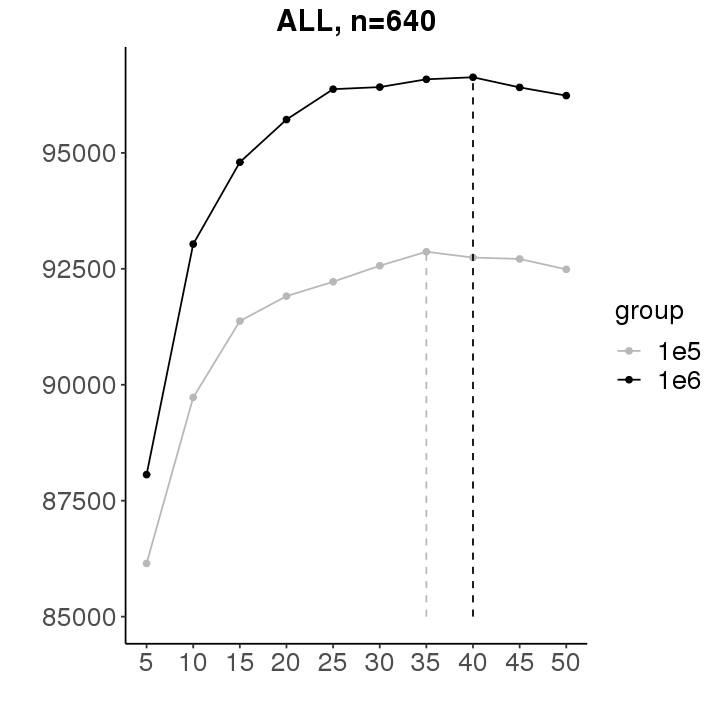

In [16]:
options(repr.plot.width = 6, repr.plot.height = 6)
df1e5 <- data.frame("HCP" = seq(5, 50, 5),
                    "Count" = NA)
df1e6 <- data.frame("HCP" = seq(5, 50, 5),
                    "Count" = NA)
for (i in seq(5, 50, 5)) {
    df1e5[i/5, "Count"] <- read.table(paste0("results/mixed_nominal_", i, 
                                           "hcp_1e5/significant_feature_count.txt"))[,1]
}
for (i in seq(5, 50, 5)) {
    df1e6[i/5, "Count"] <- read.table(paste0("results/mixed_nominal_", i, 
                                           "hcp_1e6/significant_feature_count.txt"))[,1]
}
df <- rbind(df1e5, df1e6)
df$group <- c(rep("1e5", 10), rep("1e6", 10))

colors <- c("1e5" = "grey72", "1e6" = "black")

p1 <- ggplot(df) + 
    geom_point(aes(x = HCP, y = Count, color = group)) +
    geom_line(aes(x = HCP, y = Count, color = group)) +
    scale_x_continuous(breaks = seq(0,55,by = 5)) +
    scale_colour_manual(values = colors) +
    geom_line(data = data.frame(x = c(35, 35), y = c(85000, 92868)),
              aes(x = x, y = y), color = "grey72", linetype = "dashed") +
    geom_line(data = data.frame(x = c(40, 40), y = c(85000, 96631)),
              aes(x = x, y = y), color = "black", linetype = "dashed") +
    ylim(85000, 96700) +
    labs(title = "ALL, n=640",
         x = "",
         y = "") +
    theme_classic() +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18),
          plot.title = element_text(size=18, face="bold", hjust = 0.5),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 16))
p1

In [18]:
ggsave("figures/cis_compare.png", p1, width = 6, height = 6)

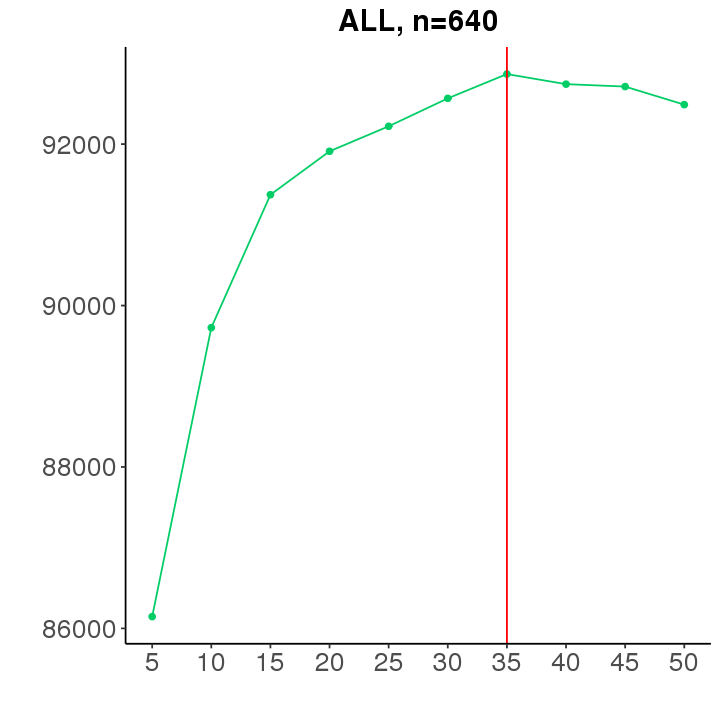

In [4]:
options(repr.plot.width = 6, repr.plot.height = 6)
df <- data.frame("HCP" = seq(5, 50, 5),
                 "Count" = NA)
for (i in seq(5, 50, 5)) {
    df[i/5, "Count"] <- read.table(paste0("results/mixed_nominal_", i, 
                                           "hcp_1e5/significant_feature_count.txt"))[,1]
}

p1 <- ggplot(df) + 
    geom_point(aes(x=HCP, y=Count), color = "springgreen3") +
    geom_line(aes(x=HCP, y=Count), color = "springgreen3") +
    scale_x_continuous(breaks = seq(0,55,by = 5)) +
    geom_vline(xintercept = 35, color = "red") +
    labs(title = "ALL, n=640",
         x = "",
         y = "") +
    theme_classic() +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18),
          plot.title = element_text(size=18, face="bold", hjust = 0.5))
p1

In [8]:
# ggsave("figures/mixed_nominal.png", p1, width = 6, height = 6)

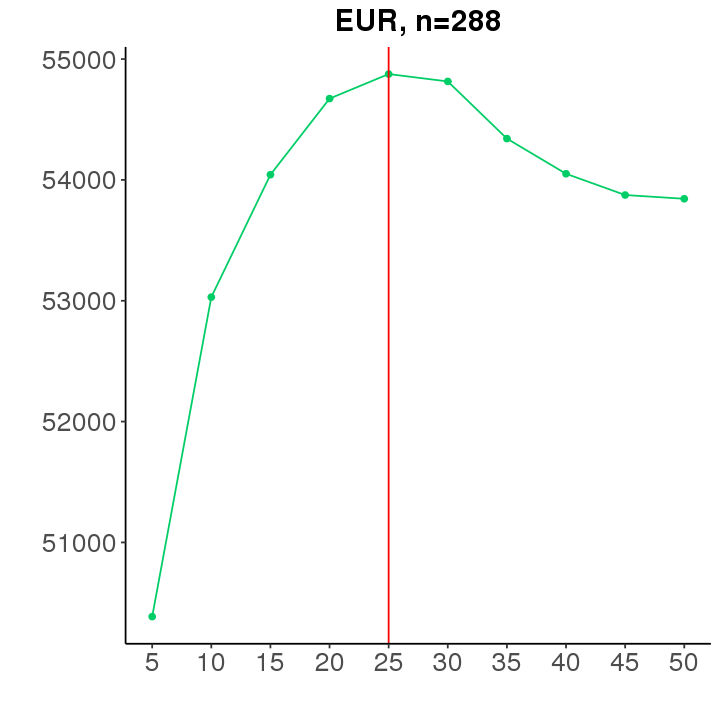

In [42]:
df <- data.frame("HCP" = seq(5, 50, 5),
                 "Count" = NA)
for (i in seq(5, 50, 5)) {
    df[i/5, "Count"] <- read.table(paste0("results/eur_nominal_", i, 
                                           "HCP/significant_feature_count.txt"))[,1]
}

p2 <- ggplot(df) + 
    geom_point(aes(x=HCP, y=Count), color = "springgreen3") +
    geom_line(aes(x=HCP, y=Count), color = "springgreen3") +
    scale_x_continuous(breaks = seq(0,55,by = 5)) +
    geom_vline(xintercept = 25, color = "red") +
    labs(title = "EUR, n=288",
         x = "",
         y = "") +
    theme_classic() +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18),
          plot.title = element_text(size=18, face="bold", hjust = 0.5))
p2

In [5]:
# ggsave("figures/eur_nominal.png", p1, width = 6, height = 6)

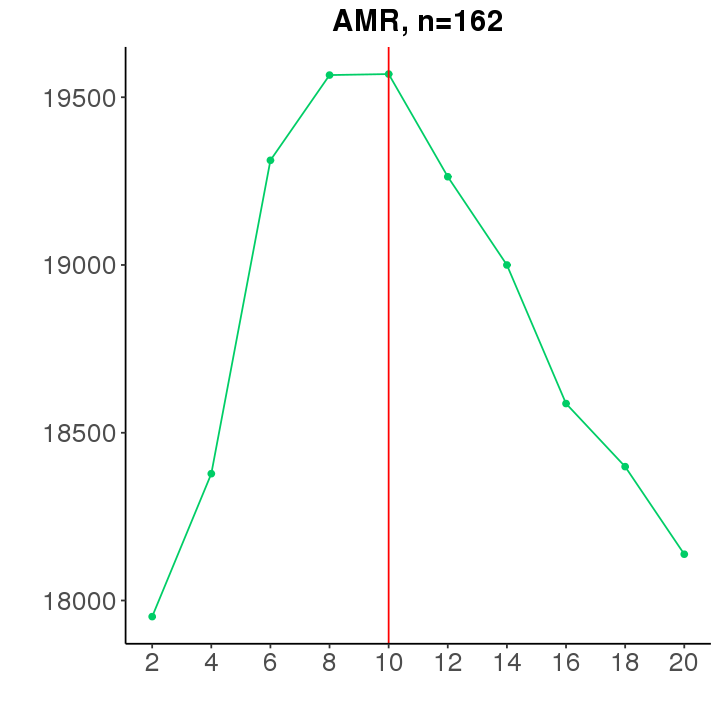

In [43]:
df <- data.frame("HCP" = seq(2, 20, 2),
                 "Count" = NA)
for (i in seq(2, 20, 2)) {
    df[i/2, "Count"] <- read.table(paste0("results/amr_nominal_", i, 
                                           "HCP/significant_feature_count.txt"))[,1]
}

p3 <- ggplot(df) + 
    geom_point(aes(x=HCP, y=Count), color = "springgreen3") +
    geom_line(aes(x=HCP, y=Count), color = "springgreen3") +
    scale_x_continuous(breaks = seq(0,22,by = 2)) +
    geom_vline(xintercept = 10, color = "red") +
    labs(title = "AMR, n=162",
         x = "",
         y = "") +
    theme_classic() +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18),
          plot.title = element_text(size=18, face="bold", hjust = 0.5))
p3

In [11]:
# ggsave("figures/amr_nominal.png", p1, width = 6, height = 6)

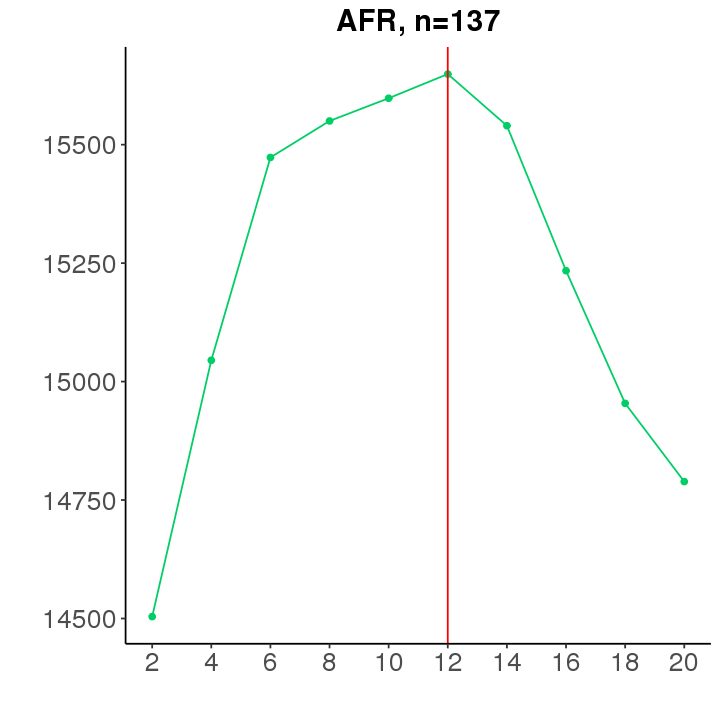

In [44]:
df <- data.frame("HCP" = seq(2, 20, 2),
                 "Count" = NA)
for (i in seq(2, 20, 2)) {
    df[i/2, "Count"] <- read.table(paste0("results/afr_nominal_", i, 
                                           "HCP/significant_feature_count.txt"))[,1]
}

p4 <- ggplot(df) + 
    geom_point(aes(x=HCP, y=Count), color = "springgreen3") +
    geom_line(aes(x=HCP, y=Count), color = "springgreen3") +
    scale_x_continuous(breaks = seq(0,22,by = 2)) +
    geom_vline(xintercept = 12, color = "red") +
    labs(title = "AFR, n=137",
         x = "",
         y = "") +
    theme_classic() +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18),
          plot.title = element_text(size=18, face="bold", hjust = 0.5))
p4

In [4]:
# ggsave("figures/afr_nominal.png", p1, width = 6, height = 6)

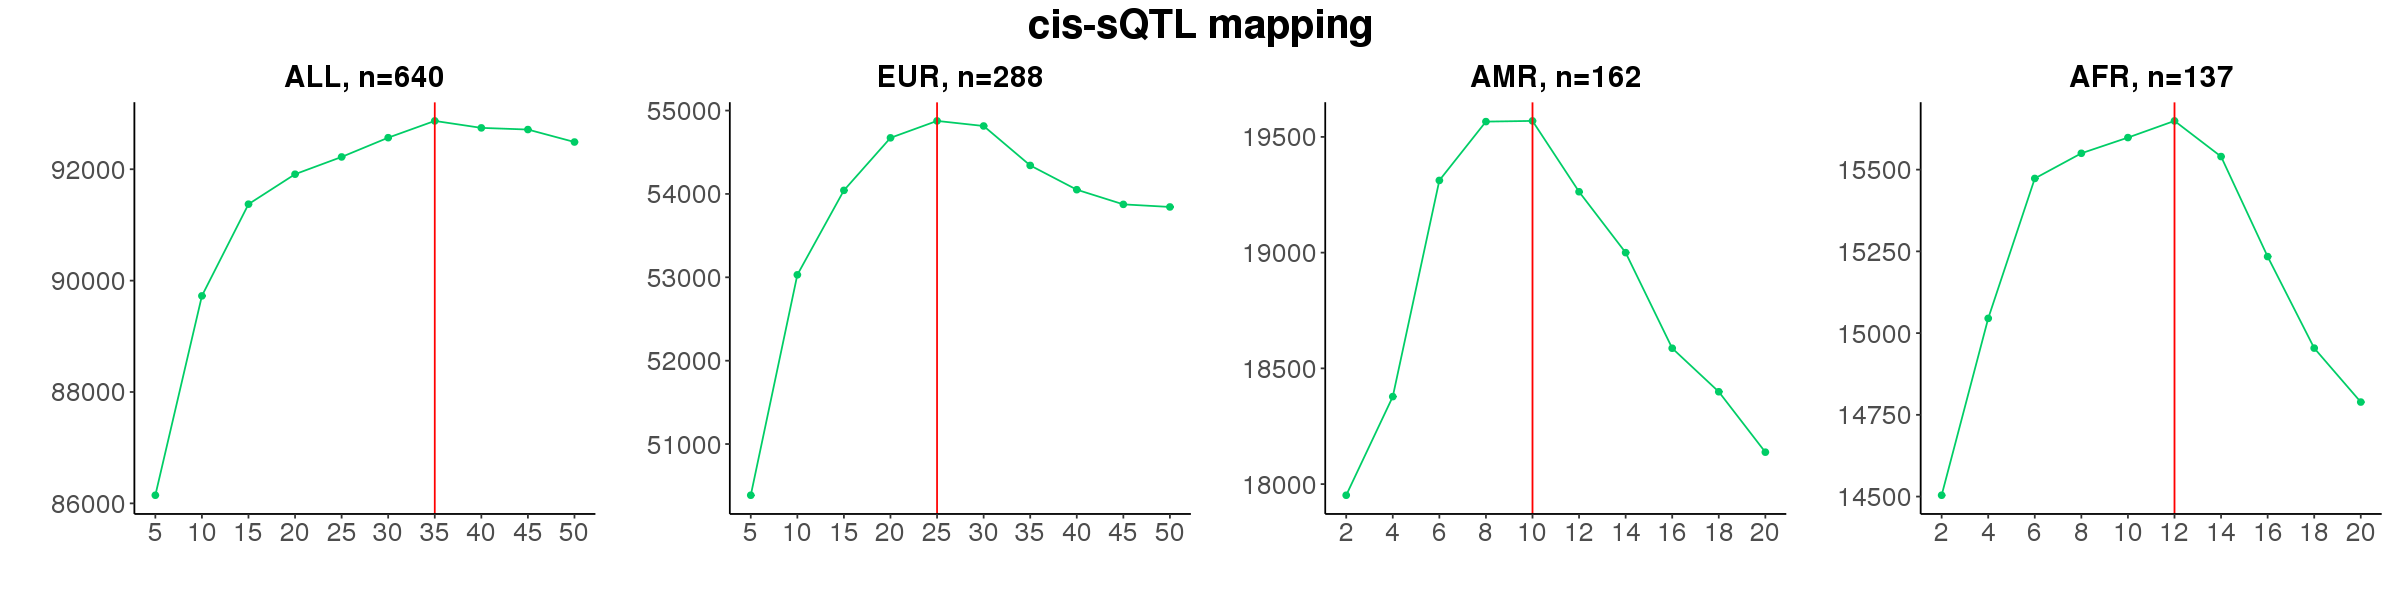

In [45]:
options(repr.plot.width=20, repr.plot.height=5)

p <- p1 + p2 + p3 + p4 +  
  plot_annotation(title = "cis-sQTL mapping",
                 theme = theme(plot.title = element_text(size = 24, face="bold", hjust = 0.5))) +
  plot_layout(ncol = 4)

p

In [47]:
ggsave("figures/nominal.png", p, height = 5, width = 20)

### 2: Check batch effect
Used `--exclude-samples $related` in FastQTL.

In [11]:
rel <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/related.txt", header = F, stringsAsFactors = F)[,1]

In [12]:
walker <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_walker.txt")
obrien <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_obrien.txt")
werling <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_werling.txt")
hdbr <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_hdbr.txt")
libd <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_libd.txt")

#### Combined

In [13]:
datExpr <- fread("cluster/leafcutter_perind.counts.nochr.gz.qqnorm_all_fixSubj_combat.tsv", data.table=F)
rownames(datExpr) <- datExpr$V1
datExpr <- datExpr[,-1]

Warning message in fread("cluster/leafcutter_perind.counts.nochr.gz.qqnorm_all_fixSubj_combat.tsv", :
“Detected 654 column names but the data has 655 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


In [5]:
head(datExpr)

Br2410     1513       RNAID1940  RNAID1946 
1:14829:14930:clu_7637_NA -0.7624343 -0.4270108  1.6281660 -0.3610890
1:14829:14970:clu_7637_NA  0.8002152  0.8051742 -0.7684091  0.8834424
1:14829:15021:clu_7637_NA -0.8709895 -0.5238565  0.2172191 -0.4611636
1:14829:15796:clu_7637_NA -0.8283478 -0.4560950  0.2010250 -0.3924181
1:15038:15796:clu_7637_NA -1.4947229 -0.5166798 -1.5522815 -0.4363100
1:15942:16607:clu_7638_NA  2.4746864 -0.5342547 -0.4351503  0.1753570
                          Br1800      11237      18015      11149     
1:14829:14930:clu_7637_NA  0.12970916 -0.7068511  0.6120102  0.7145593
1:14829:14970:clu_7637_NA -0.34494925  0.4919904 -1.8686184 -1.7530881
1:14829:15021:clu_7637_NA -0.02537779 -0.3643302  1.1308208 -0.1863440
1:14829:15796:clu_7637_NA -0.02743139 -0.3435302  1.1683318 -0.2329144
1:15038:15796:clu_7637_NA  0.62672548 -0.4509515  1.7672359  0.5920107
1:15942:16607:clu_7638_NA -0.82305050 -0.3783636  1.5144772  1.5025863
                          1821       RNAID1927  ⋯ 11397       11880     
1:14829:14930:clu_7637_NA -0.3963618  0.1793225 ⋯ -0.46691056  0.1281325
1:14829:14970:clu_7637_NA  0.8429926 -1.3582313 ⋯ -0.06677221  0.6614452
1:14829:15021:clu_7637_NA -0.4949154  0.4425828 ⋯  0.05487654 -0.4111235
1:14829:15796:clu_7637_NA -0.4253269  0.4229222 ⋯ -0.03192361 -0.3376277
1:15038:15796:clu_7637_NA -0.4778459  1.5358395 ⋯  0.40185990 -0.3410882
1:15942:16607:clu_7638_NA  1.5222648  1.4150157 ⋯  0.53904312 -0.8173156
                          RNAID1951  15240      RNAID1907  1733      
1:14829:14930:clu_7637_NA -0.6323465  1.1516062  0.5373307 -0.5564796
1:14829:14970:clu_7637_NA  0.6134831 -0.9416921 -0.9971887  0.6685070
1:14829:15021:clu_7637_NA -0.7240991  0.1446305  1.0215702 -0.6478942
1:14829:15796:clu_7637_NA -0.6120497 -0.6299210  0.9815394 -0.5672837
1:15038:15796:clu_7637_NA -0.7135180  0.1596653  1.4284529 -0.6570166
1:15942:16607:clu_7638_NA  1.1134906 -0.3239236 -0.7224049  1.3239560
                          11793      11451      RNAID1944  1746      
1:14829:14930:clu_7637_NA  1.0873845  0.5339986 -0.4799547  0.3919791
1:14829:14970:clu_7637_NA  0.6680873 -1.5665103  0.7542310 -0.9647780
1:14829:15021:clu_7637_NA  0.1923487 -1.1055001 -0.5755310  0.7907820
1:14829:15796:clu_7637_NA  0.1145237 -0.9251284 -0.4975410  0.7571724
1:15038:15796:clu_7637_NA -0.6128119  0.4997270 -0.5689909  1.1294720
1:15942:16607:clu_7638_NA  0.7139717 -0.4593229 -0.6143907 -0.2557509

In [4]:
dim(datExpr)

[1] 273167    654

In [14]:
datExpr <- datExpr %>% select(-all_of(rel))
dim(datExpr)

[1] 273167    640

In [15]:
datExpr_noCombat <- fread("cluster/leafcutter_perind.counts.nochr.gz.qqnorm_all_fixSubj.tsv", data.table=F)
rownames(datExpr_noCombat) <- datExpr_noCombat$V1
datExpr_noCombat <- datExpr_noCombat[,-1]
datExpr_noCombat <- datExpr_noCombat %>% select(-all_of(rel))
dim(datExpr_noCombat)

Warning message in fread("cluster/leafcutter_perind.counts.nochr.gz.qqnorm_all_fixSubj.tsv", :
“Detected 654 column names but the data has 655 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] 273167    640

In [8]:
# leafcutter PC
pcs <- fread("cluster/leafcutter_perind.counts.nochr.gz.PCs", data.table = F)

In [9]:
rownames(pcs) <- pcs$id
pcs <- pcs[,-1]
head(pcs)

Br2410.STARAligned.sortedByCoord.WASPfiltered.out.bam
1  0.017877653                                         
2 -0.027452747                                         
3 -0.065225429                                         
4 -0.004633336                                         
5 -0.009158523                                         
6 -0.074177559                                         
  1513.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 -0.03776007                                        
2 -0.01357190                                        
3  0.02325125                                        
4  0.02774224                                        
5  0.02910215                                        
6  0.04091055                                        
  RNAID1940.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 -0.0399438994                                           
2  0.0002581652                                           
3  0.0097687261                                           
4  0.0240381892                                           
5 -0.0219780554                                           
6 -0.0292489468                                           
  RNAID1946.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 -0.034840027                                            
2 -0.019766457                                            
3 -0.012431315                                            
4  0.039650198                                            
5  0.028450880                                            
6  0.001017282                                            
  Br1800.STARAligned.sortedByCoord.WASPfiltered.out.bam
1  0.039216661                                         
2  0.027710613                                         
3 -0.073467006                                         
4  0.051032396                                         
5  0.002987474                                         
6 -0.046841223                                         
  11237.STARAligned.sortedByCoord.WASPfiltered.out.bam
1  0.042777407                                        
2 -0.050325371                                        
3 -0.002228612                                        
4 -0.070285103                                        
5  0.008799072                                        
6  0.023123895                                        
  18015.STARAligned.sortedByCoord.WASPfiltered.out.bam
1  0.00680397                                         
2  0.05389210                                         
3  0.06243331                                         
4 -0.06059388                                         
5 -0.01515512                                         
6  0.02886275                                         
  11149.STARAligned.sortedByCoord.WASPfiltered.out.bam
1  0.040025498                                        
2 -0.072974457                                        
3 -0.002567316                                        
4 -0.060115612                                        
5  0.025253912                                        
6  0.005371299                                        
  1821.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 -0.040061559                                       
2  0.004356379                                       
3 -0.028787573                                       
4  0.013812787                                       
5 -0.014393287                                       
6  0.021059925                                       
  RNAID1927.STARAligned.sortedByCoord.WASPfiltered.out.bam ⋯
1 -0.03555976                                              ⋯
2 -0.02349720                                              ⋯
3  0.01190221                                              ⋯
4  0.04095058                                              ⋯
5  0.01796297                                              ⋯
6  0.02115725                                              ⋯
  11397.STARAligned.sortedByCoord.WASPfiltered.out.bam

In [10]:
dim(pcs)

[1]  50 654

In [10]:
subj <- colnames(pcs)
for(i in 1:length(subj)){
    subj[i] <- strsplit(subj[i],"[.]")[[1]][1]
}
index <- which(colnames(pcs)=="1707.1.STARAligned.sortedByCoord.out.bam")
subj[index] <- "1707.1"
colnames(pcs) <- subj

In [12]:
head(pcs)

Br2410       1513        RNAID1940     RNAID1946    Br1800       11237       
1  0.017877653 -0.03776007 -0.0399438994 -0.034840027  0.039216661  0.042777407
2 -0.027452747 -0.01357190  0.0002581652 -0.019766457  0.027710613 -0.050325371
3 -0.065225429  0.02325125  0.0097687261 -0.012431315 -0.073467006 -0.002228612
4 -0.004633336  0.02774224  0.0240381892  0.039650198  0.051032396 -0.070285103
5 -0.009158523  0.02910215 -0.0219780554  0.028450880  0.002987474  0.008799072
6 -0.074177559  0.04091055 -0.0292489468  0.001017282 -0.046841223  0.023123895
  18015       11149        1821         RNAID1927   ⋯ 11397       11880       
1  0.00680397  0.040025498 -0.040061559 -0.03555976 ⋯  0.04530387  0.059778879
2  0.05389210 -0.072974457  0.004356379 -0.02349720 ⋯ -0.06266808 -0.032072332
3  0.06243331 -0.002567316 -0.028787573  0.01190221 ⋯  0.02122932 -0.024992858
4 -0.06059388 -0.060115612  0.013812787  0.04095058 ⋯ -0.04142289 -0.028879263
5 -0.01515512  0.025253912 -0.014393287  0.01796297 ⋯  0.05543516 -0.055322036
6  0.02886275  0.005371299  0.021059925  0.02115725 ⋯  0.03097390 -0.002297913
  RNAID1951   15240        RNAID1907   1733         11793        11451       
1 -0.03954167  0.024260750 -0.04293632 -0.042537193  0.063484036  0.025710804
2 -0.01300548  0.051624442 -0.01422004 -0.005643015 -0.030736006 -0.034915758
3  0.01291135  0.068553202  0.02339379  0.006006447  0.007709241 -0.049077223
4  0.02230249 -0.055171281  0.03737948  0.017359515 -0.024020781 -0.033359065
5 -0.07368691 -0.007631145 -0.03650489 -0.033830322 -0.017014639 -0.001806438
6 -0.03509165  0.016848183 -0.03355458  0.040141142  0.033118419 -0.042348883
  RNAID1944    1746        
1 -0.033731566 -0.035502193
2 -0.027837885 -0.006428364
3  0.001686122  0.003055421
4  0.036373508  0.025964255
5  0.025002470 -0.084750434
6  0.011492217  0.020540929

In [11]:
# pcs <- pcs %>% select(-all_of(rel))
# dim(pcs)
sum(colnames(pcs) %in% rel)
pcs <- pcs[,!names(pcs) %in% rel]
dim(pcs)

[1] 14

[1]  50 640

In [16]:
cov <- read.table("data/35hcp_cov.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]
dim(cov)
head(cov)

[1]  42 654

Br2410      1513        RNAID1940   RNAID1946    Br1800      11237      
PC1 0.0134498   0.00883737  0.0105646   -0.0100042   -0.0264156  0.00964951 
PC2 -0.0261084  -0.00241496 0.0112017   0.0129359    -0.00285026 -0.0204621 
PC3 -0.00626668 -0.021557   -0.00268095 -4.52633e-05 -0.00101463 -0.00514834
PC4 0.0144448   -0.0266302  0.0116105   0.00637793   0.00137324  0.0214545  
PC5 -0.0153651  -0.00174134 -0.00695816 -0.00397614  -0.00378136 0.0668738  
sex M           M           M           F            M           M          
    18015        11149       1821        RNAID1927   ⋯ 11397      11880     
PC1 -0.0305498   0.009554    0.0125086   0.00967876  ⋯ 0.00699529 0.00927248
PC2 -0.00136264  -0.0212812  -0.0213104  0.0282592   ⋯ -0.0165036 -0.0199631
PC3 -0.000380779 -0.00498539 -0.00520913 -0.00130432 ⋯ 0.00345509 -0.0035407
PC4 0.00128887   0.0227153   0.0104166   0.0125259   ⋯ 0.0174746  0.0220455 
PC5 -0.0017333   0.0678296   -0.0156755  -0.00241945 ⋯ 0.0709577  0.0691673 
sex F            F           F           F           ⋯ F          M         
    RNAID1951  15240       RNAID1907   1733        11793       11451      
PC1 0.0100571  0.0126193   -0.022778   0.0109438   0.00721341  0.00797005 
PC2 0.00285186 -0.0222361  -0.00425556 -0.0140367  -0.00334149 -0.0197482 
PC3 -0.0286316 -0.00414057 -0.00136336 -0.0110339  0.0224404   -0.00454864
PC4 -0.0386816 0.0128115   0.000375508 -0.00457751 0.00286154  0.0225033  
PC5 0.00281472 -0.0166991  -0.00515377 -0.0107143  0.0806309   0.06695    
sex F          F           M           F           M           M          
    RNAID1944   1746       
PC1 0.0108942   -0.00792391
PC2 -0.0146632  -0.0111467 
PC3 -0.0107195  -0.00225043
PC4 -0.00350128 0.00555587 
PC5 -0.00934632 -0.00967133
sex F           M

In [17]:
cov <- cov[,!names(cov) %in% rel]
dim(cov)

[1]  42 640

In [18]:
cov[cov=="F"] <- 0
cov[cov=="M"] <- 1

In [19]:
cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

In [20]:
pcs <- t(pcs)
pcs <- cbind(1, pcs)
storage.mode(pcs) <- "numeric"

Y <- as.matrix(datExpr_noCombat)
X <- as.matrix(pcs)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed_pcs <- Y - t(X[,-1]  %*% beta[-1,])

ERROR: Error in t(pcs): object 'pcs' not found


In [21]:
groups <- c()

for (i in 1:ncol(datExpr_regressed)) {
  sample <- colnames(datExpr_regressed)[i]
  if (sample %in% walker[,1]) {
    groups[i] <- "Walker"
  }
  if (sample %in% obrien[,1]) {
    groups[i] <- "Obrien"
  }
  if (sample %in% werling[,1]) {
    groups[i] <- "Werling"
  }
  if (sample %in% hdbr[,1]) {
    groups[i] <- "HDBR"
  }
  if (sample %in% libd[,1]) {
    groups[i] <- "LIBD"
  }
}

groups_fac <- factor(groups)

In [22]:
# center the data; use SVD to calculate PCs
# regressed by covariates
s <- svd(datExpr_regressed - rowMeans(datExpr_regressed))
PC1 <- s$d[1]*s$v[,1]
PC2 <- s$d[2]*s$v[,2]
data <- data.frame(PC1, PC2, "Data" = groups_fac)

# combat only
s_1 <- svd(datExpr - rowMeans(datExpr))
PC1_1 <- s_1$d[1]*s_1$v[,1]
PC2_1 <- s_1$d[2]*s_1$v[,2]
data1 <- data.frame(PC1_1, PC2_1, "Data" = groups_fac)

# unregressed
s_2 <- svd(datExpr_noCombat - rowMeans(datExpr_noCombat))
PC1_2 <- s_2$d[1]*s_2$v[,1]
PC2_2 <- s_2$d[2]*s_2$v[,2]
data2 <- data.frame(PC1_2, PC2_2, "Data" = groups_fac)

In [19]:
# regressed by leafcutter PCs
s_3 <- svd(datExpr_regressed_pcs - rowMeans(datExpr_regressed_pcs))
PC1_3 <- s_3$d[1]*s_3$v[,1]
PC2_3 <- s_3$d[2]*s_3$v[,2]
data3 <- data.frame(PC1_3, PC2_3, "Data" = groups_fac)

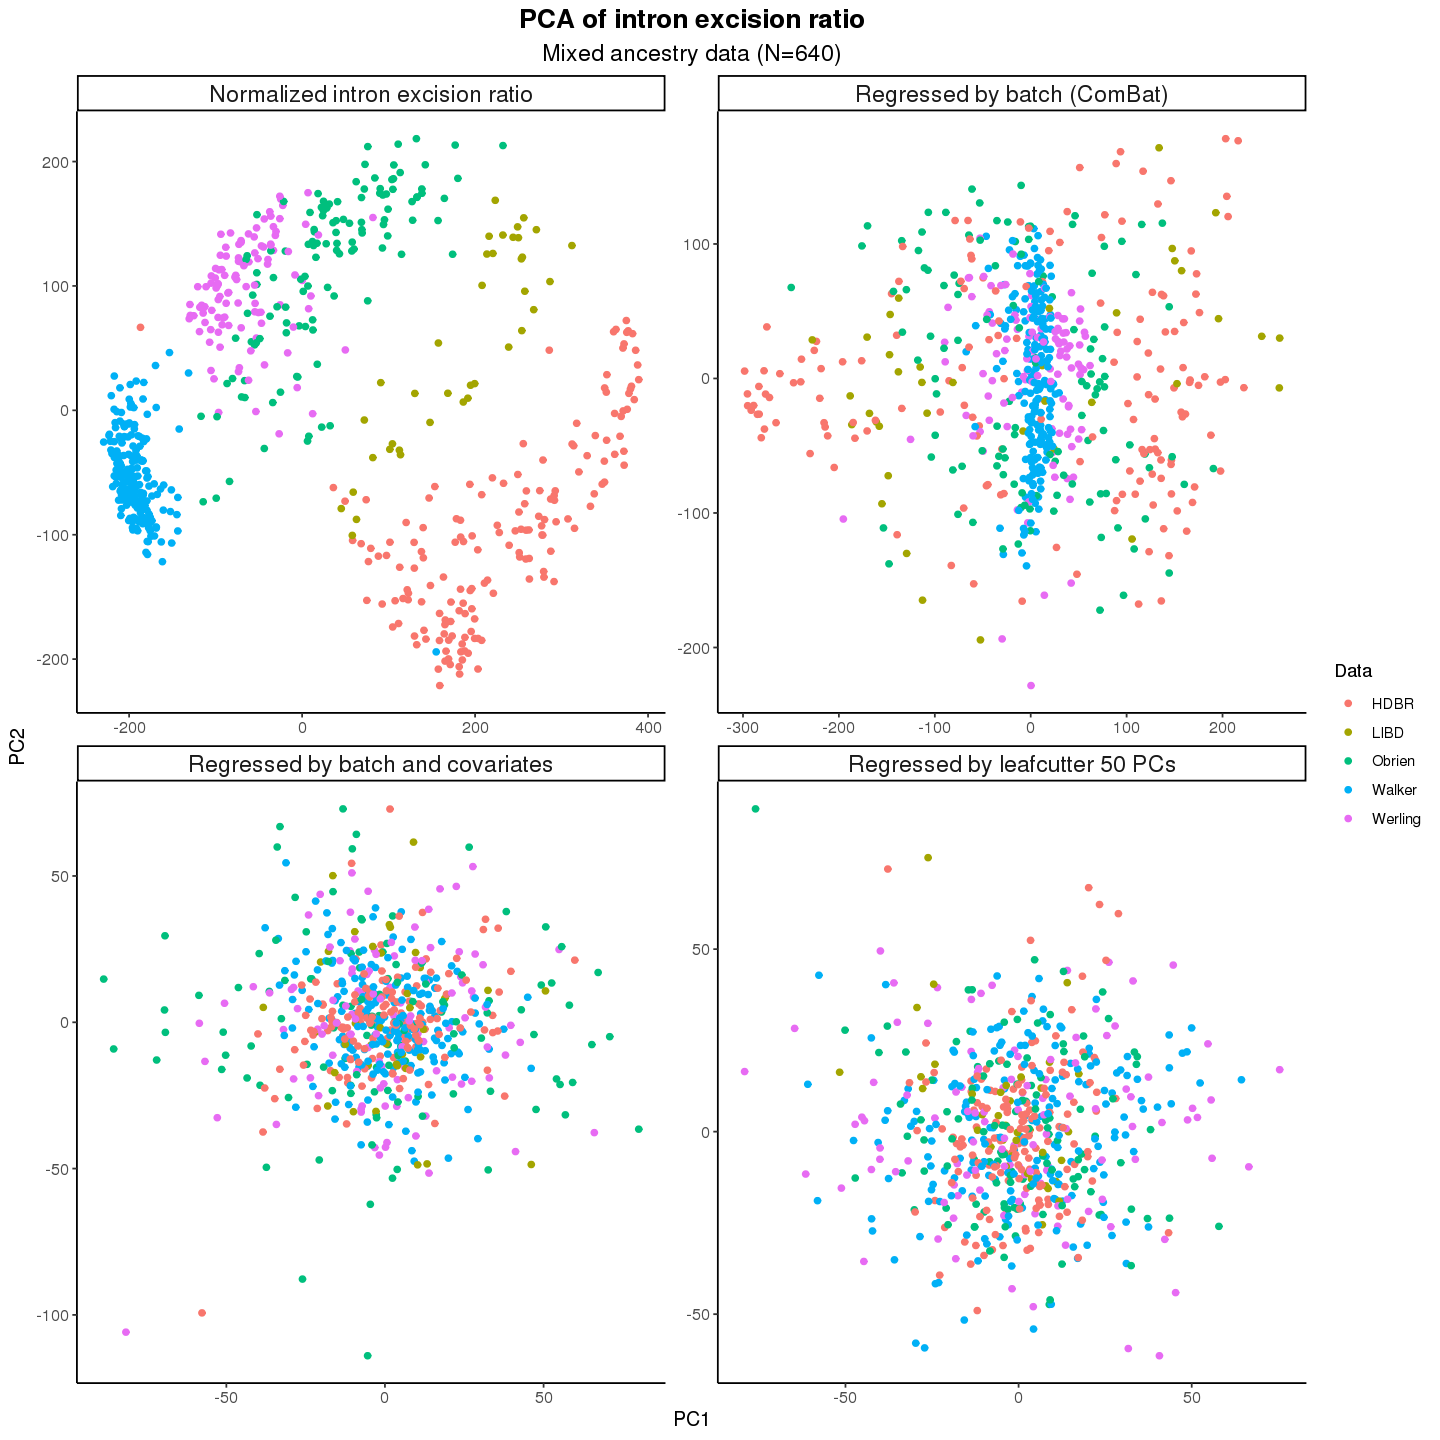

In [20]:
options(repr.plot.width=12, repr.plot.height=12)

colnames(data1) <- colnames(data2) <- colnames(data3) <- c("PC1", "PC2", "Data")
data4 <- rbind(data, data1, data2, data3)

data4$group <- c(rep("Regressed by batch and covariates", dim(data)[1]), 
                 rep("Regressed by batch (ComBat)", dim(data1)[1]),
                 rep("Normalized intron excision ratio", dim(data2)[1]),
                 rep("Regressed by leafcutter 50 PCs", dim(data3)[1]))
p2 <- ggplot(data4, aes(x=PC1, y=PC2, color=Data)) +
  geom_point() +
  facet_wrap(~group, scales = "free") +
  labs(x = "PC1", y = "PC2", 
       title = "PCA of intron excision ratio",
       subtitle = "Mixed ancestry data (N=640)") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5),
        strip.text.x = element_text(size=14))
p2

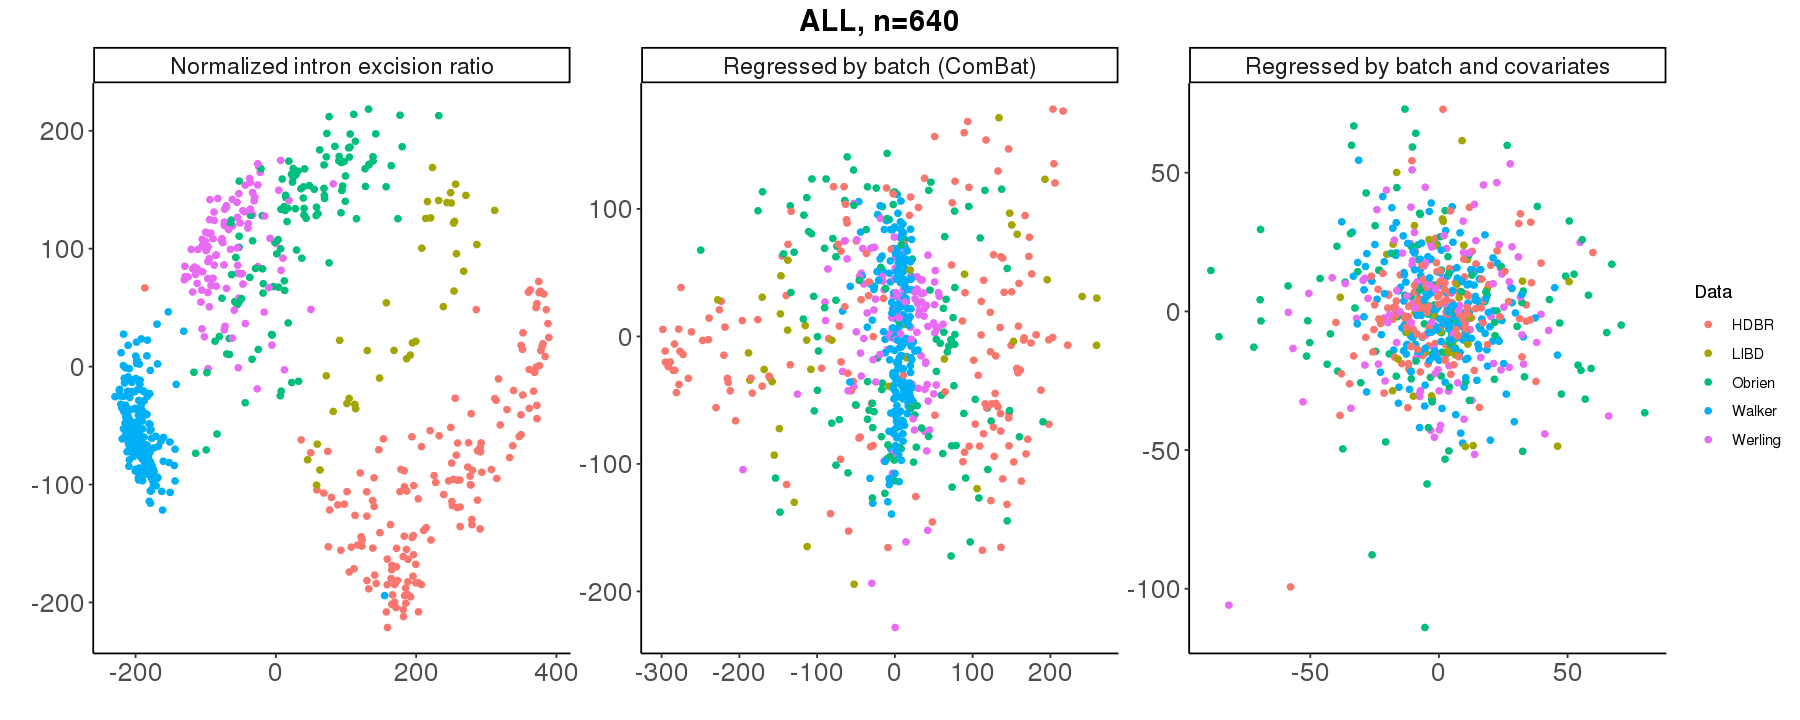

In [23]:
options(repr.plot.width=15, repr.plot.height=6)

colnames(data1) <- colnames(data2) <- c("PC1", "PC2", "Data")
data5 <- rbind(data, data1, data2)

data5$group <- c(rep("Regressed by batch and covariates", dim(data)[1]), 
                 rep("Regressed by batch (ComBat)", dim(data1)[1]),
                 rep("Normalized intron excision ratio", dim(data2)[1]))
p1 <- ggplot(data5, aes(x=PC1, y=PC2, color=Data)) +
  geom_point() +
  facet_wrap(~group, scales = "free") +
  labs(x = "", y = "", 
       title = "ALL, n=640") +
  theme_classic() +
  theme(axis.text = element_text(size=16),
        plot.title = element_text(size=18, face="bold", hjust = 0.5),
        strip.text.x = element_text(size=14))
p1

In [24]:
# ggsave("figures/mixed_regress.png", p3, width = 15, height = 6)

In [23]:
dim(data5)

[1] 1920    4

In [27]:
head(cov)

PC1         PC2         PC3          PC4         PC5         sex
Br2410    1  0.01344980 -0.02610840 -6.26668e-03  0.01444480 -0.01536510 1  
1513      1  0.00883737 -0.00241496 -2.15570e-02 -0.02663020 -0.00174134 1  
RNAID1940 1  0.01056460  0.01120170 -2.68095e-03  0.01161050 -0.00695816 1  
RNAID1946 1 -0.01000420  0.01293590 -4.52633e-05  0.00637793 -0.00397614 0  
Br1800    1 -0.02641560 -0.00285026 -1.01463e-03  0.00137324 -0.00378136 1  
11237     1  0.00964951 -0.02046210 -5.14834e-03  0.02145450  0.06687380 1  
          HCP1       HCP2       HCP3         ⋯ HCP27      HCP28      
Br2410    -1.0899027  0.2343118 -0.002978732 ⋯ -1.9708288 -0.12982464
1513       0.5092700 -0.3966774  0.164835132 ⋯  0.3749039  0.60515987
RNAID1940  1.3208361 -1.2604583 -0.019609630 ⋯ -0.5510524 -0.77983438
RNAID1946 -0.8367998  0.7210962  0.328804668 ⋯  0.2075349  0.49706966
Br1800    -0.3387075 -0.3067902 -0.494756921 ⋯  0.3113263 -0.03765041
11237     -0.6404065 -0.2678533 -0.718940176 ⋯  0.1198394 -0.89599246
          HCP29        HCP30      HCP31       HCP32       HCP33     
Br2410     1.804111941 -0.6850380  1.22676485 -0.25235652  1.6044135
1513       0.004690139 -0.1790185  0.40401712  0.10528730  0.4682255
RNAID1940 -0.203474136 -0.5491220  0.48420429 -0.42045993 -0.4434456
RNAID1946  0.418585514  0.1115832 -0.74361043 -0.63317319  0.1061155
Br1800    -0.286477580 -0.3186581  0.01077955 -0.99764060  0.4786859
11237     -0.142098130  0.6128147  0.74346317  0.02027177  0.2056952
          HCP34       HCP35      age       
Br2410     1.27930623 -0.1674352 -0.5178080
1513      -0.05811266 -0.9977343 -0.4602740
RNAID1940  0.81208853 -0.2590981 -0.3835616
RNAID1946  0.22301328  0.4524805 -0.4602740
Br1800    -0.53603109  0.1514625 -0.4219180
11237     -0.14787730 -0.8663064 -0.6136986

### Figure out what's going on with Walker data. Try regressing without HCPs

In [26]:
cov_no_hidden <- cov[,!substring(colnames(cov), 1, 3) == "HCP"]
head(cov_no_hidden)
dim(cov_no_hidden)

PC1         PC2         PC3          PC4         PC5         sex
Br2410    1  0.01344980 -0.02610840 -6.26668e-03  0.01444480 -0.01536510 1  
1513      1  0.00883737 -0.00241496 -2.15570e-02 -0.02663020 -0.00174134 1  
RNAID1940 1  0.01056460  0.01120170 -2.68095e-03  0.01161050 -0.00695816 1  
RNAID1946 1 -0.01000420  0.01293590 -4.52633e-05  0.00637793 -0.00397614 0  
Br1800    1 -0.02641560 -0.00285026 -1.01463e-03  0.00137324 -0.00378136 1  
11237     1  0.00964951 -0.02046210 -5.14834e-03  0.02145450  0.06687380 1  
          age       
Br2410    -0.5178080
1513      -0.4602740
RNAID1940 -0.3835616
RNAID1946 -0.4602740
Br1800    -0.4219180
11237     -0.6136986

[1] 640   8

In [28]:
Y <- as.matrix(datExpr)
X <- as.matrix(cov_no_hidden)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed_no_hidden <- Y - t(X[,-1]  %*% beta[-1,])

s <- svd(datExpr_regressed_no_hidden - rowMeans(datExpr_regressed_no_hidden))
PC1 <- s$d[1]*s$v[,1]
PC2 <- s$d[2]*s$v[,2]
data <- data.frame(PC1, PC2, "Data" = groups_fac)

In [29]:
head(data)
dim(data)

PC1         PC2        Data  
1 259.6087805  40.160483 LIBD  
2   2.5912779 -34.849309 Walker
3 -24.2526893   2.712115 Walker
4   7.6058195 -67.600885 Walker
5   0.3199109  -2.843020 LIBD  
6 114.9469272  75.729158 HDBR

[1] 640   3

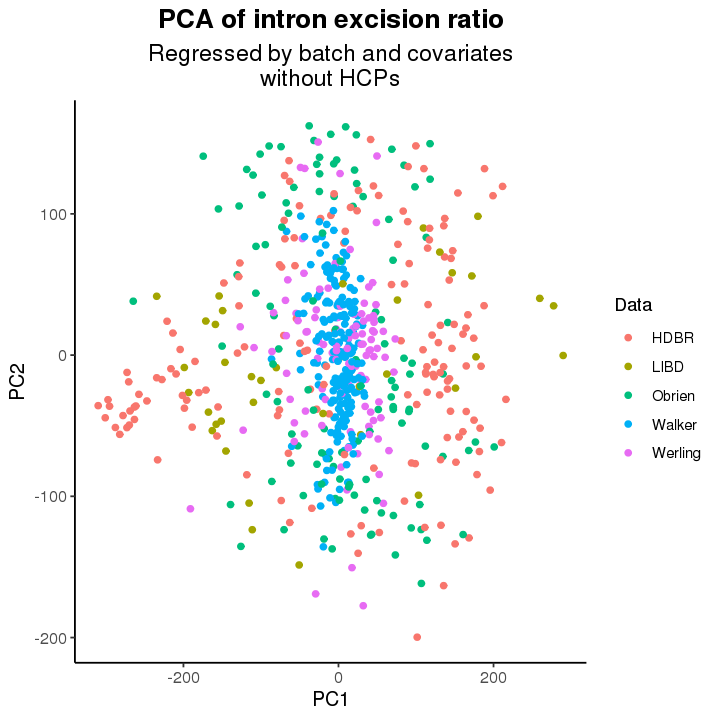

In [30]:
options(repr.plot.width=6, repr.plot.height=6)

p <- ggplot(data, aes(x=PC1, y=PC2, color=Data)) +
  geom_point() +
  labs(x = "PC1", y = "PC2", 
       title = "PCA of intron excision ratio",
       subtitle = "Regressed by batch and covariates\nwithout HCPs") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, hjust = 0.5),
        strip.text.x = element_text(size=14))
p

#### EUR

In [24]:
datExpr <- fread("data/eur/lc_combat.tsv", data.table=F)
rownames(datExpr) <- datExpr$V1
datExpr <- datExpr[,-1]
dim(datExpr)
datExpr <- datExpr[,!names(datExpr)%in%rel]
dim(datExpr)

Warning message in fread("data/eur/lc_combat.tsv", data.table = F):
“Detected 292 column names but the data has 293 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] 273167    292

[1] 273167    288

In [25]:
datExpr_noCombat <- fread("data/eur/lc.tsv", data.table=F)
rownames(datExpr_noCombat) <- datExpr_noCombat$V1
datExpr_noCombat <- datExpr_noCombat[,-1]
datExpr_noCombat <- datExpr_noCombat[,!names(datExpr_noCombat)%in%rel]
dim(datExpr_noCombat)

Warning message in fread("data/eur/lc.tsv", data.table = F):
“Detected 292 column names but the data has 293 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] 273167    288

In [26]:
cov <- read.table("data/eur/25HCP_cov.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]
dim(cov)

cov <- cov[,!names(cov)%in%rel]
dim(cov)

cov[cov=="F"] <- 0
cov[cov=="M"] <- 1

cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

[1]  32 292

[1]  32 288

In [27]:
Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

In [28]:
groups <- c()

for (i in 1:ncol(datExpr_regressed)) {
  sample <- colnames(datExpr_regressed)[i]
  if (sample %in% walker[,1]) {
    groups[i] <- "Walker"
  }
  if (sample %in% obrien[,1]) {
    groups[i] <- "Obrien"
  }
  if (sample %in% werling[,1]) {
    groups[i] <- "Werling"
  }
  if (sample %in% hdbr[,1]) {
    groups[i] <- "HDBR"
  }
  if (sample %in% libd[,1]) {
    groups[i] <- "LIBD"
  }
}

groups_fac <- factor(groups)

In [29]:
# center the data; use SVD to calculate PCs
# regressed by covariates
s <- svd(datExpr_regressed - rowMeans(datExpr_regressed))
PC1 <- s$d[1]*s$v[,1]
PC2 <- s$d[2]*s$v[,2]
data <- data.frame(PC1, PC2, "Data" = groups_fac)

# combat only
s_1 <- svd(datExpr - rowMeans(datExpr))
PC1_1 <- s_1$d[1]*s_1$v[,1]
PC2_1 <- s_1$d[2]*s_1$v[,2]
data1 <- data.frame(PC1_1, PC2_1, "Data" = groups_fac)

# unregressed
s_2 <- svd(datExpr_noCombat - rowMeans(datExpr_noCombat))
PC1_2 <- s_2$d[1]*s_2$v[,1]
PC2_2 <- s_2$d[2]*s_2$v[,2]
data2 <- data.frame(PC1_2, PC2_2, "Data" = groups_fac)

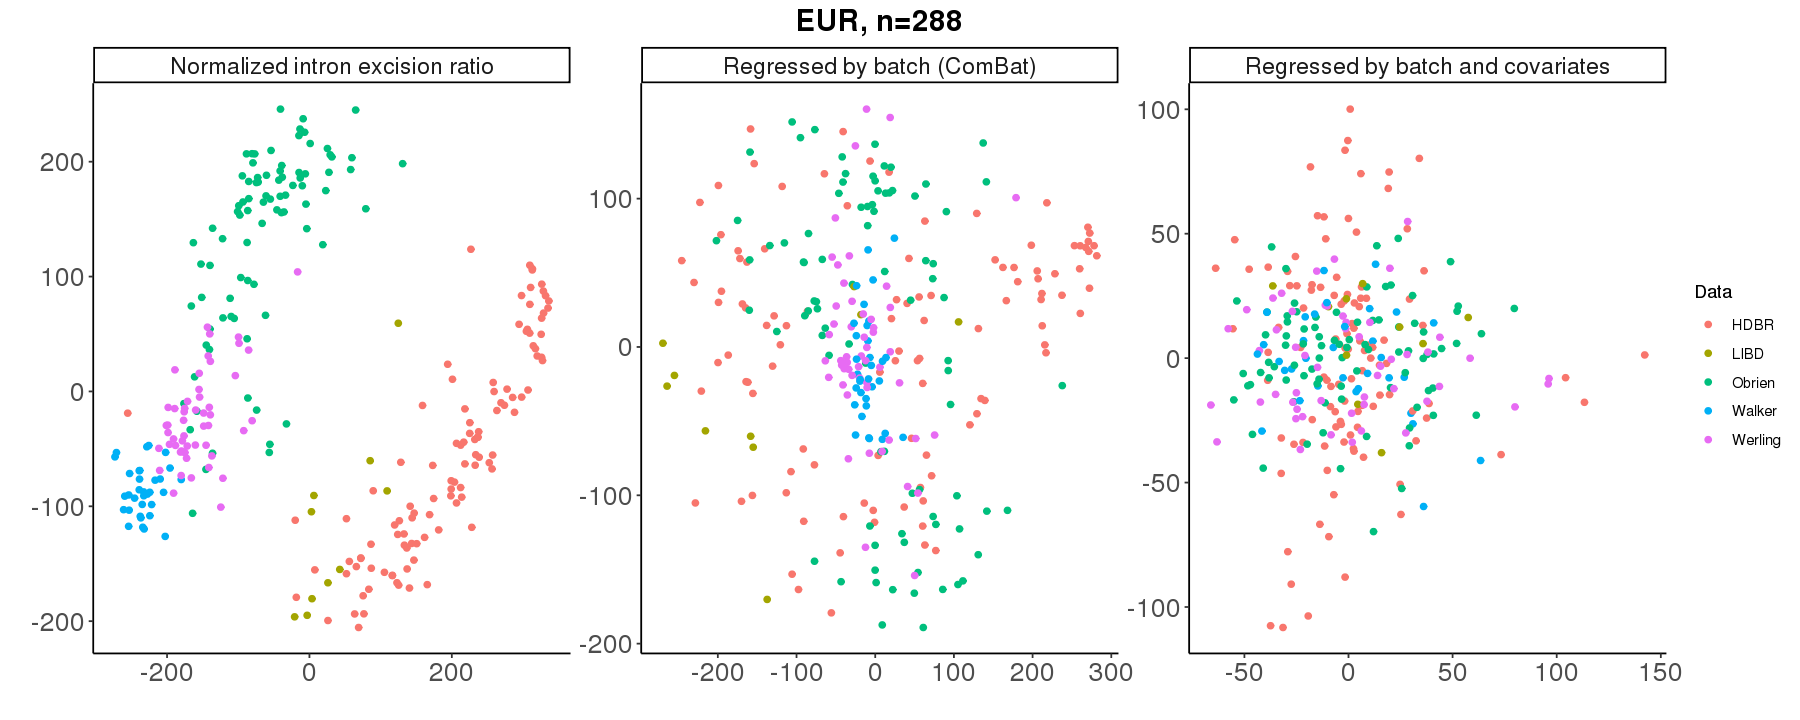

In [30]:
options(repr.plot.width=15, repr.plot.height=6)

colnames(data1) <- colnames(data2) <- c("PC1", "PC2", "Data")
data3 <- rbind(data, data1, data2)

data3$group <- c(rep("Regressed by batch and covariates", dim(data)[1]), 
                 rep("Regressed by batch (ComBat)", dim(data1)[1]),
                 rep("Normalized intron excision ratio", dim(data2)[1]))
p2 <- ggplot(data3, aes(x=PC1, y=PC2, color=Data)) +
  geom_point() +
  facet_wrap(~group, scales = "free") +
  labs(x = "", y = "", 
       title = "EUR, n=288") +
  theme_classic() +
  theme(axis.text = element_text(size=16),
        plot.title = element_text(size=18, face="bold", hjust = 0.5),
        strip.text.x = element_text(size=14))
p2

In [27]:
# ggsave("figures/eur_regress.png", p3, width = 15, height = 6)

#### AMR

Warning message in fread("data/amr/lc_combat.tsv", data.table = F):
“Detected 164 column names but the data has 165 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] 273167    164

[1] 273167    162

Warning message in fread("data/amr/lc.tsv", data.table = F):
“Detected 164 column names but the data has 165 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] 273167    162

[1]  17 164

[1]  17 162

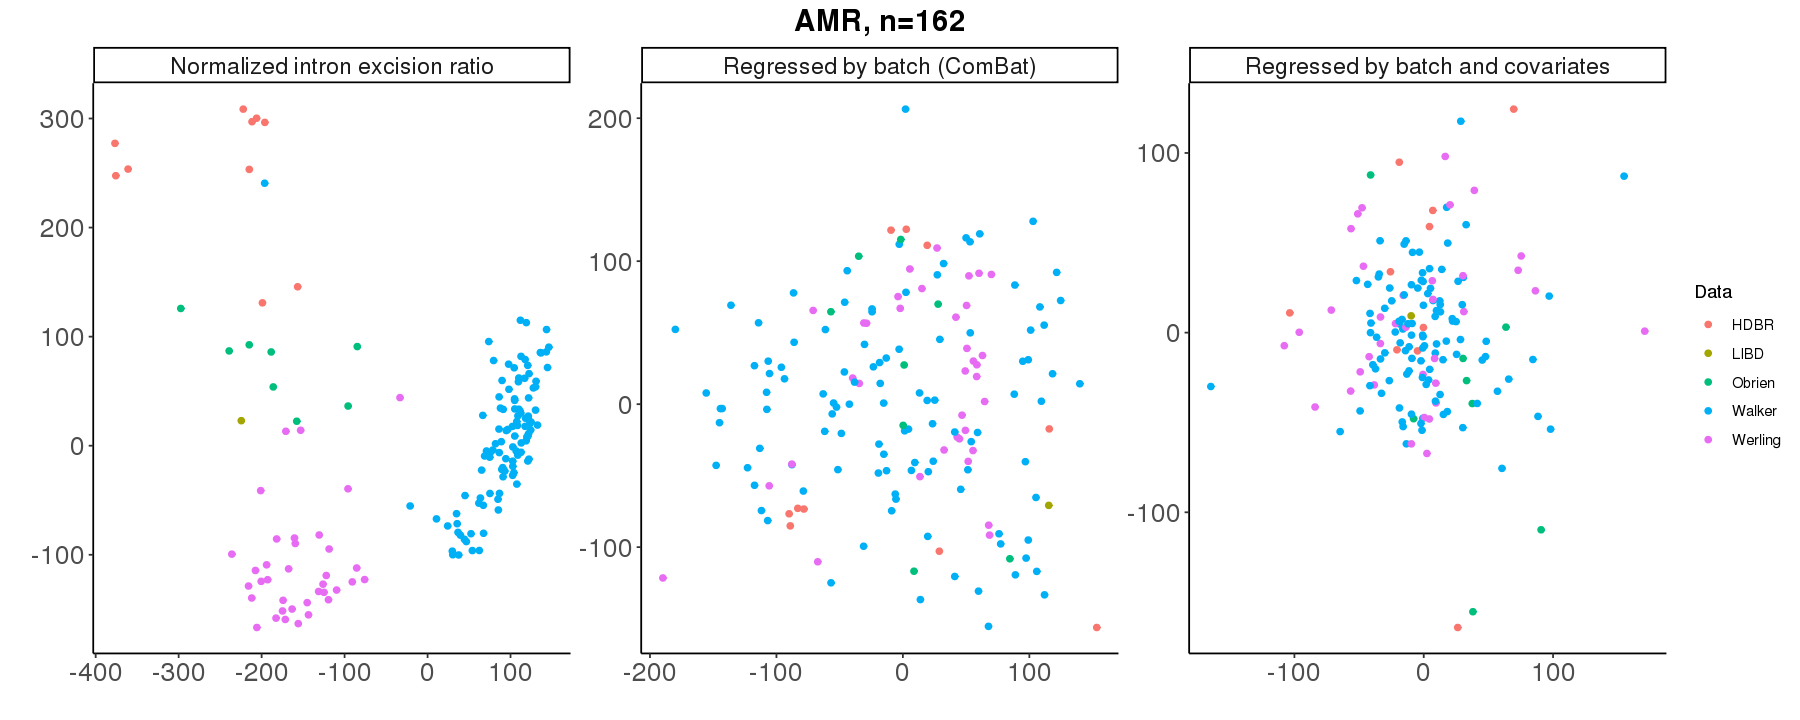

In [31]:
options(repr.plot.width=15, repr.plot.height=6)

datExpr <- fread("data/amr/lc_combat.tsv", data.table=F)
rownames(datExpr) <- datExpr$V1
datExpr <- datExpr[,-1]
dim(datExpr)
datExpr <- datExpr[,!names(datExpr)%in%rel]
dim(datExpr)

datExpr_noCombat <- fread("data/amr/lc.tsv", data.table=F)
rownames(datExpr_noCombat) <- datExpr_noCombat$V1
datExpr_noCombat <- datExpr_noCombat[,-1]
datExpr_noCombat <- datExpr_noCombat[,!names(datExpr_noCombat)%in%rel]
dim(datExpr_noCombat)

cov <- read.table("data/amr/10HCP_cov.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]
dim(cov)

cov <- cov[,!names(cov)%in%rel]
dim(cov)

cov[cov=="F"] <- 0
cov[cov=="M"] <- 1

cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

groups <- c()

for (i in 1:ncol(datExpr_regressed)) {
  sample <- colnames(datExpr_regressed)[i]
  if (sample %in% walker[,1]) {
    groups[i] <- "Walker"
  }
  if (sample %in% obrien[,1]) {
    groups[i] <- "Obrien"
  }
  if (sample %in% werling[,1]) {
    groups[i] <- "Werling"
  }
  if (sample %in% hdbr[,1]) {
    groups[i] <- "HDBR"
  }
  if (sample %in% libd[,1]) {
    groups[i] <- "LIBD"
  }
}

groups_fac <- factor(groups)

# center the data; use SVD to calculate PCs
# regressed by covariates
s <- svd(datExpr_regressed - rowMeans(datExpr_regressed))
PC1 <- s$d[1]*s$v[,1]
PC2 <- s$d[2]*s$v[,2]
data <- data.frame(PC1, PC2, "Data" = groups_fac)

# combat only
s_1 <- svd(datExpr - rowMeans(datExpr))
PC1_1 <- s_1$d[1]*s_1$v[,1]
PC2_1 <- s_1$d[2]*s_1$v[,2]
data1 <- data.frame(PC1_1, PC2_1, "Data" = groups_fac)

# unregressed
s_2 <- svd(datExpr_noCombat - rowMeans(datExpr_noCombat))
PC1_2 <- s_2$d[1]*s_2$v[,1]
PC2_2 <- s_2$d[2]*s_2$v[,2]
data2 <- data.frame(PC1_2, PC2_2, "Data" = groups_fac)

colnames(data1) <- colnames(data2) <- c("PC1", "PC2", "Data")
data3 <- rbind(data, data1, data2)

data3$group <- c(rep("Regressed by batch and covariates", dim(data)[1]), 
                 rep("Regressed by batch (ComBat)", dim(data1)[1]),
                 rep("Normalized intron excision ratio", dim(data2)[1]))
p3 <- ggplot(data3, aes(x=PC1, y=PC2, color=Data)) +
  geom_point() +
  facet_wrap(~group, scales = "free") +
  labs(x = "", y = "", 
       title = "AMR, n=162") +
  theme_classic() +
  theme(axis.text = element_text(size=16),
        plot.title = element_text(size=18, face="bold", hjust = 0.5),
        strip.text.x = element_text(size=14))
p3

In [9]:
# ggsave("figures/amr_regress.png", p3, width = 15, height = 6)

#### AFR

Warning message in fread("data/afr/lc_combat.tsv", data.table = F):
“Detected 145 column names but the data has 146 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] 273167    145

[1] 273167    137

Warning message in fread("data/afr/lc.tsv", data.table = F):
“Detected 145 column names but the data has 146 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] 273167    137

[1]  19 145

[1]  19 137

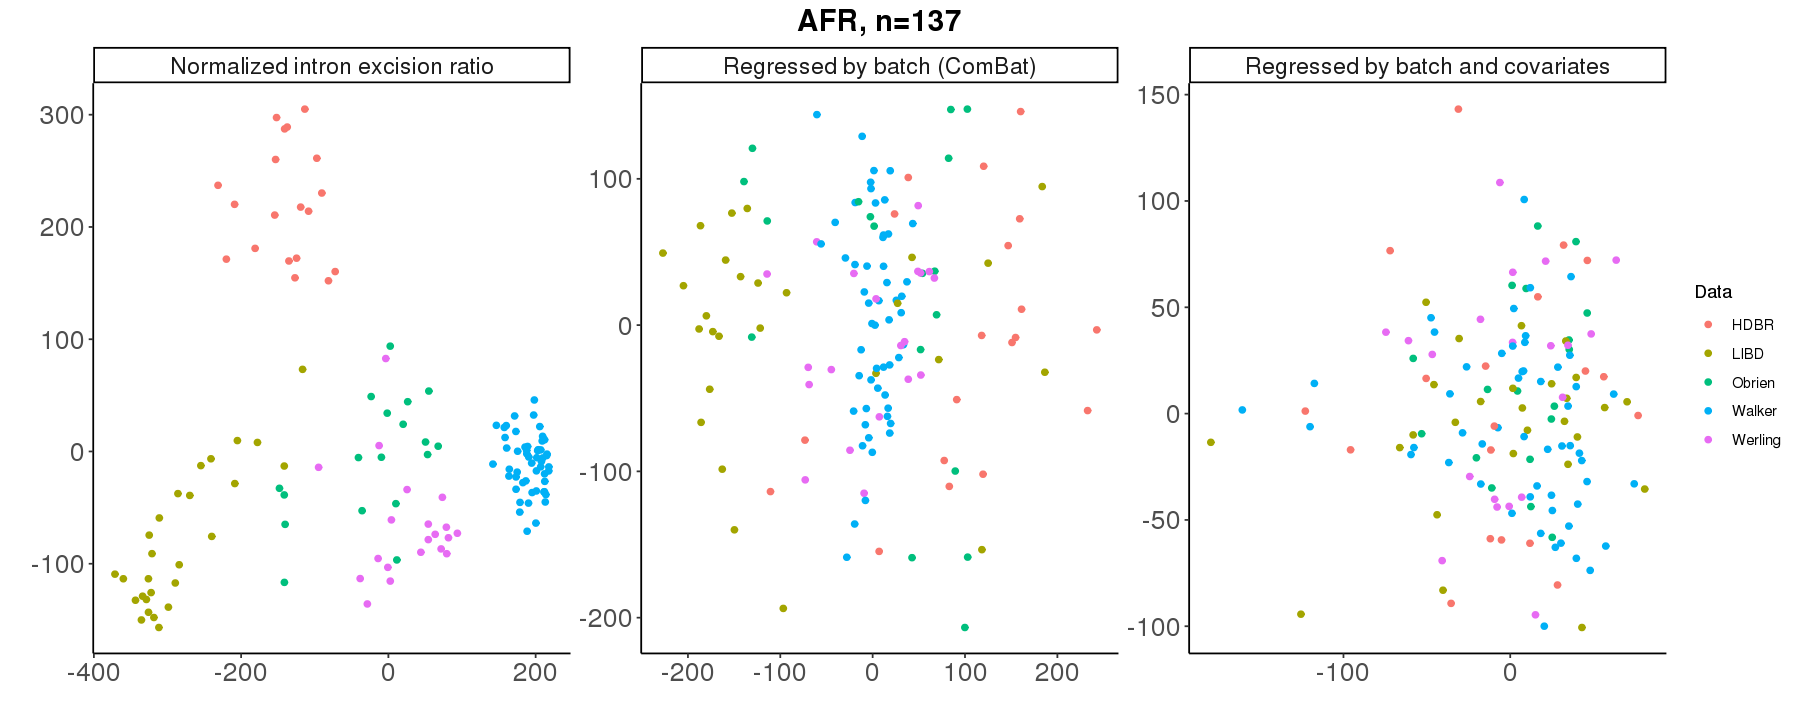

In [32]:
options(repr.plot.width=15, repr.plot.height=6)

datExpr <- fread("data/afr/lc_combat.tsv", data.table=F)
rownames(datExpr) <- datExpr$V1
datExpr <- datExpr[,-1]
dim(datExpr)
datExpr <- datExpr[,!names(datExpr)%in%rel]
dim(datExpr)

datExpr_noCombat <- fread("data/afr/lc.tsv", data.table=F)
rownames(datExpr_noCombat) <- datExpr_noCombat$V1
datExpr_noCombat <- datExpr_noCombat[,-1]
datExpr_noCombat <- datExpr_noCombat[,!names(datExpr_noCombat)%in%rel]
dim(datExpr_noCombat)

cov <- read.table("data/afr/12HCP_cov.txt", header = T, stringsAsFactors = F, check.names = F)
rownames(cov) <- cov$id
cov <- cov[,-1]
dim(cov)

cov <- cov[,!names(cov)%in%rel]
dim(cov)

cov[cov=="F"] <- 0
cov[cov=="M"] <- 1

cov <- t(cov)
cov <- cbind(1, cov)
storage.mode(cov) <- "numeric"

Y <- as.matrix(datExpr)
X <- as.matrix(cov)

beta <- (solve(t(X)%*%X)%*%t(X))%*%t(Y)
datExpr_regressed <- Y - t(X[,-1]  %*% beta[-1,])

groups <- c()

for (i in 1:ncol(datExpr_regressed)) {
  sample <- colnames(datExpr_regressed)[i]
  if (sample %in% walker[,1]) {
    groups[i] <- "Walker"
  }
  if (sample %in% obrien[,1]) {
    groups[i] <- "Obrien"
  }
  if (sample %in% werling[,1]) {
    groups[i] <- "Werling"
  }
  if (sample %in% hdbr[,1]) {
    groups[i] <- "HDBR"
  }
  if (sample %in% libd[,1]) {
    groups[i] <- "LIBD"
  }
}

groups_fac <- factor(groups)

# center the data; use SVD to calculate PCs
# regressed by covariates
s <- svd(datExpr_regressed - rowMeans(datExpr_regressed))
PC1 <- s$d[1]*s$v[,1]
PC2 <- s$d[2]*s$v[,2]
data <- data.frame(PC1, PC2, "Data" = groups_fac)

# combat only
s_1 <- svd(datExpr - rowMeans(datExpr))
PC1_1 <- s_1$d[1]*s_1$v[,1]
PC2_1 <- s_1$d[2]*s_1$v[,2]
data1 <- data.frame(PC1_1, PC2_1, "Data" = groups_fac)

# unregressed
s_2 <- svd(datExpr_noCombat - rowMeans(datExpr_noCombat))
PC1_2 <- s_2$d[1]*s_2$v[,1]
PC2_2 <- s_2$d[2]*s_2$v[,2]
data2 <- data.frame(PC1_2, PC2_2, "Data" = groups_fac)

colnames(data1) <- colnames(data2) <- c("PC1", "PC2", "Data")
data3 <- rbind(data, data1, data2)

data3$group <- c(rep("Regressed by batch and covariates", dim(data)[1]), 
                 rep("Regressed by batch (ComBat)", dim(data1)[1]),
                 rep("Normalized intron excision ratio", dim(data2)[1]))
p4 <- ggplot(data3, aes(x=PC1, y=PC2, color=Data)) +
  geom_point() +
  facet_wrap(~group, scales = "free") +
  labs(x = "", y = "", 
       title = "AFR, n=137") +
  theme_classic() +
  theme(axis.text = element_text(size=16),
        plot.title = element_text(size=18, face="bold", hjust = 0.5),
        strip.text.x = element_text(size=14))
p4

# ggsave("figures/afr_regress.png", p3, width = 15, height = 6)

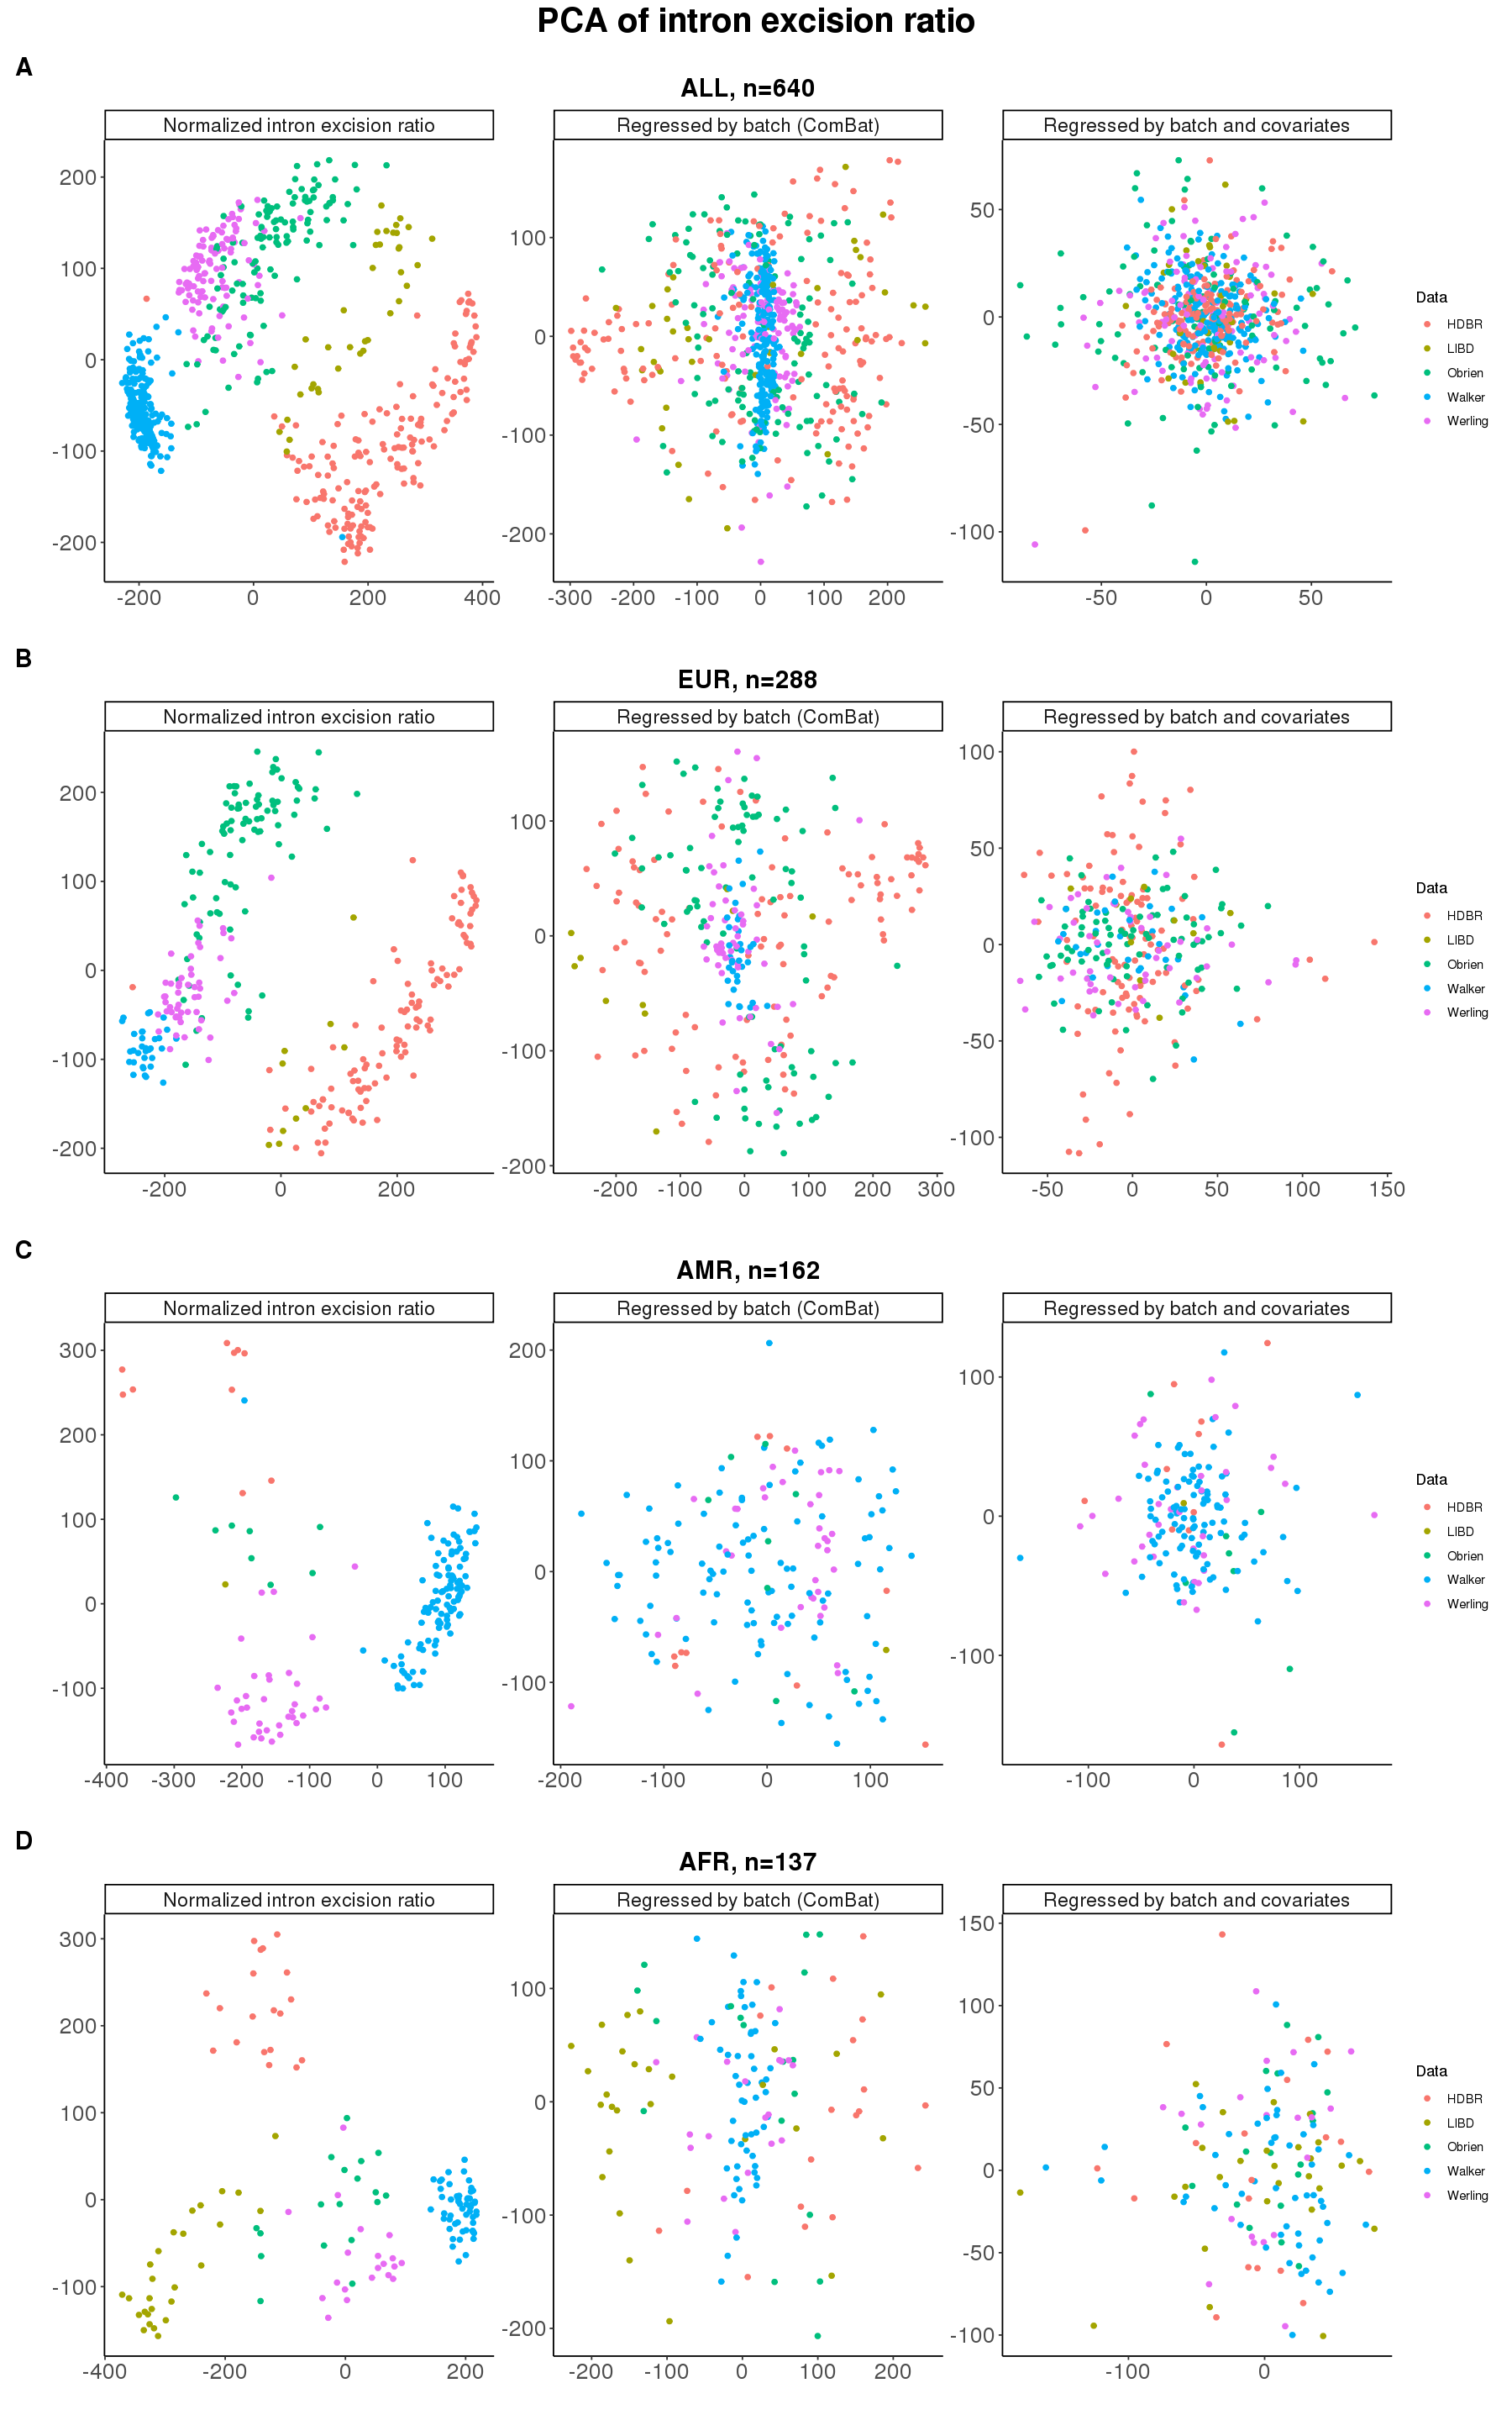

In [33]:
options(repr.plot.width=15, repr.plot.height=24)

p <- p1 / p2 / p3 / p4 +
  plot_annotation(title = "PCA of intron excision ratio",
                 theme = theme(plot.title = element_text(size = 24, face="bold", hjust = 0.5))) +
  plot_annotation(tag_level = 'A') &
                 theme(plot.tag = element_text(size = 18, face = "bold"))

p

ggsave("figures/regress.png", p, width = 15, height = 24)

### 3: beta-approximated permutation pvalue

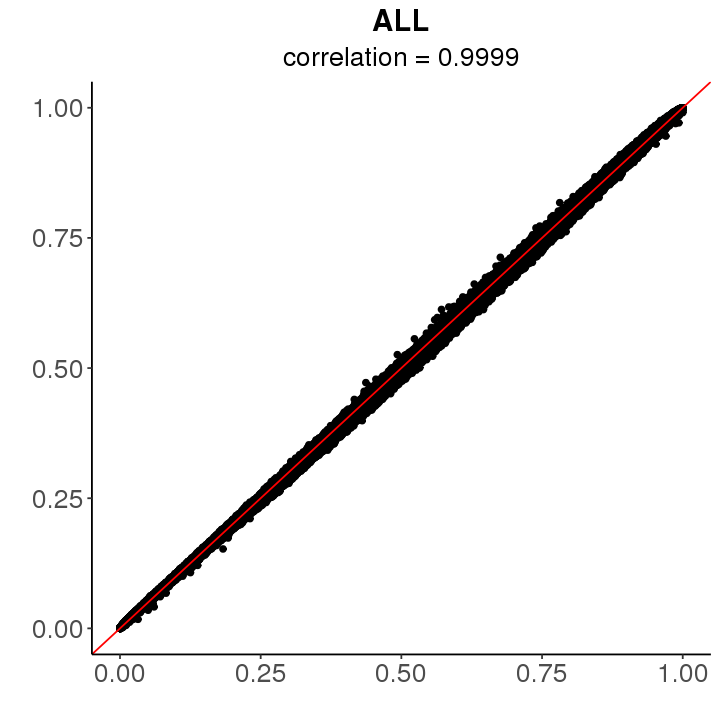

In [34]:
options(repr.plot.width = 6, repr.plot.height = 6)
dat <- fread("results/mixed_perm_35hcp/all.chunks.txt.gz", data.table=F)
colnames(dat) <- c("pid", "nvar", "shape1", "shape2", "dummy", "sid", "dist", "npval", "slope", "ppval", "bpval")
dat <- dat[complete.cases(dat),]
dat <- arrange(dat, npval, desc(bpval)) %>% group_by(pid) %>% dplyr::slice(1) %>% ungroup() %>% as.data.frame()
p1 <- ggplot(dat, aes(x = ppval, y = bpval)) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1, color = "red") +
    labs(x = "",
         y = "",
         title = "ALL",
         subtitle = "correlation = 0.9999") +
    theme_classic() +
    theme(axis.text = element_text(size=16),
        plot.title = element_text(size=18, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=16, hjust = 0.5))
p1
# ggsave("figures/mixed_check.png", p, width = 6, height = 6)

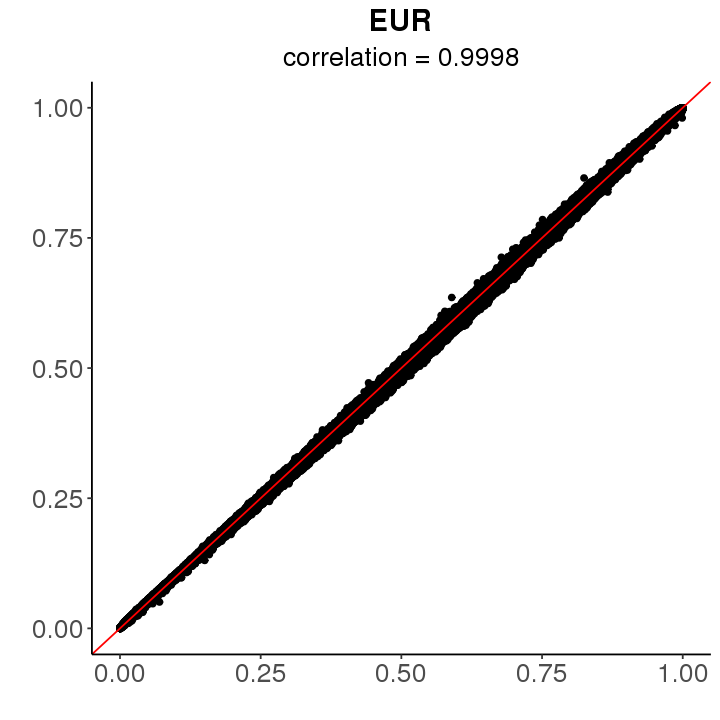

In [35]:
dat <- fread("results/eur_perm_25HCP/all.chunks.txt.gz", data.table=F)
colnames(dat) <- c("pid", "nvar", "shape1", "shape2", "dummy", "sid", "dist", "npval", "slope", "ppval", "bpval")
dat <- dat[complete.cases(dat),]
dat <- arrange(dat, npval, desc(bpval)) %>% group_by(pid) %>% dplyr::slice(1) %>% ungroup() %>% as.data.frame()
p2 <- ggplot(dat, aes(x = ppval, y = bpval)) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1, color = "red") +
    labs(x = "",
         y = "",
         title = "EUR",
         subtitle = "correlation = 0.9998") +
    theme_classic() +
    theme(axis.text = element_text(size=16),
        plot.title = element_text(size=18, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=16, hjust = 0.5))
p2
# ggsave("figures/eur_check.png", p, width = 6, height = 6)

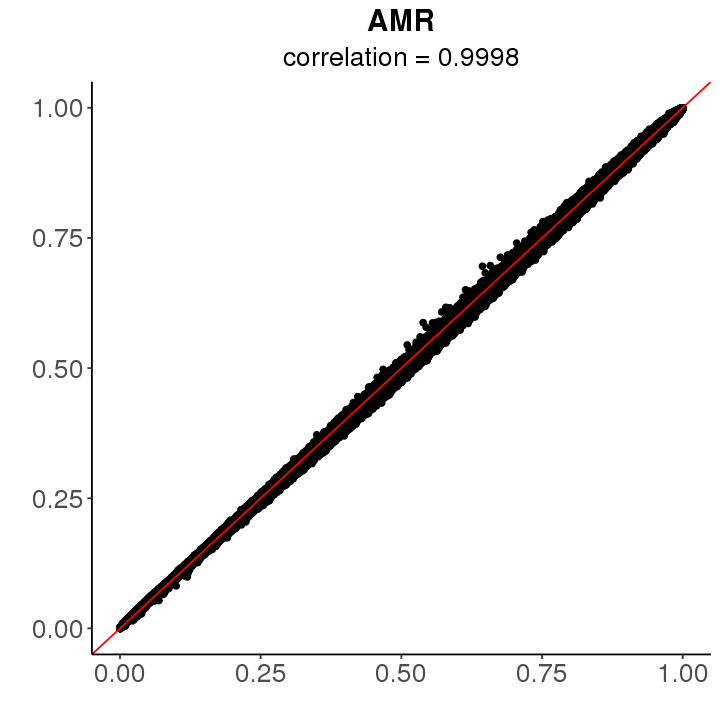

In [36]:
dat <- fread("results/amr_perm_10HCP/all.chunks.txt.gz", data.table=F)
colnames(dat) <- c("pid", "nvar", "shape1", "shape2", "dummy", "sid", "dist", "npval", "slope", "ppval", "bpval")
dat <- dat[complete.cases(dat),]
dat <- arrange(dat, npval, desc(bpval)) %>% group_by(pid) %>% dplyr::slice(1) %>% ungroup() %>% as.data.frame()
p3 <- ggplot(dat, aes(x = ppval, y = bpval)) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1, color = "red") +
    labs(x = "",
         y = "",
         title = "AMR",
         subtitle = "correlation = 0.9998") +
    theme_classic() +
    theme(axis.text = element_text(size=16),
        plot.title = element_text(size=18, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=16, hjust = 0.5))
p3
# ggsave("figures/amr_check.png", p, width = 6, height = 6)

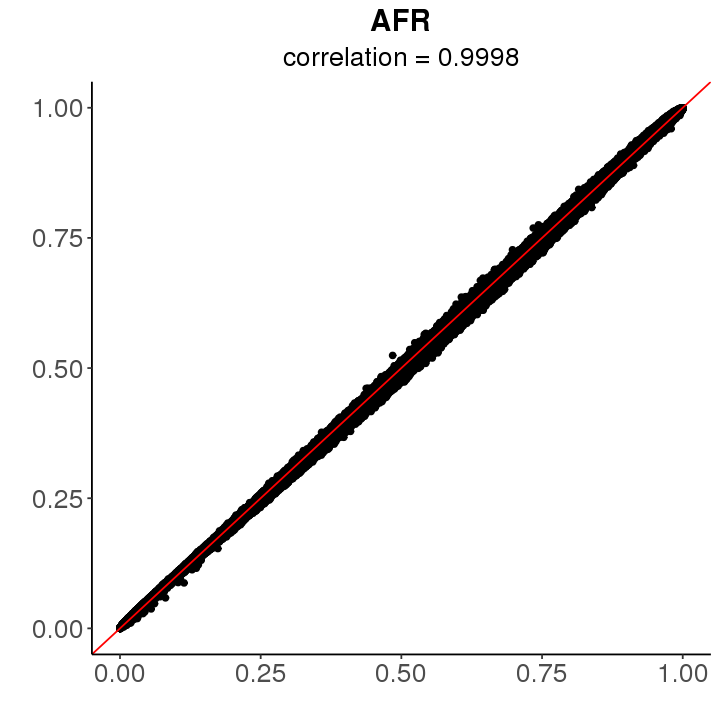

In [37]:
dat <- fread("results/afr_perm_12HCP/all.chunks.txt.gz", data.table=F)
colnames(dat) <- c("pid", "nvar", "shape1", "shape2", "dummy", "sid", "dist", "npval", "slope", "ppval", "bpval")
dat <- dat[complete.cases(dat),]
dat <- arrange(dat, npval, desc(bpval)) %>% group_by(pid) %>% dplyr::slice(1) %>% ungroup() %>% as.data.frame()
p4 <- ggplot(dat, aes(x = ppval, y = bpval)) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1, color = "red") +
    labs(x = "",
         y = "",
         title = "AFR",
         subtitle = "correlation = 0.9998") +
    theme_classic() +
    theme(axis.text = element_text(size=16),
        plot.title = element_text(size=18, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=16, hjust = 0.5))
p4
# ggsave("figures/afr_check.png", p, width = 6, height = 6)

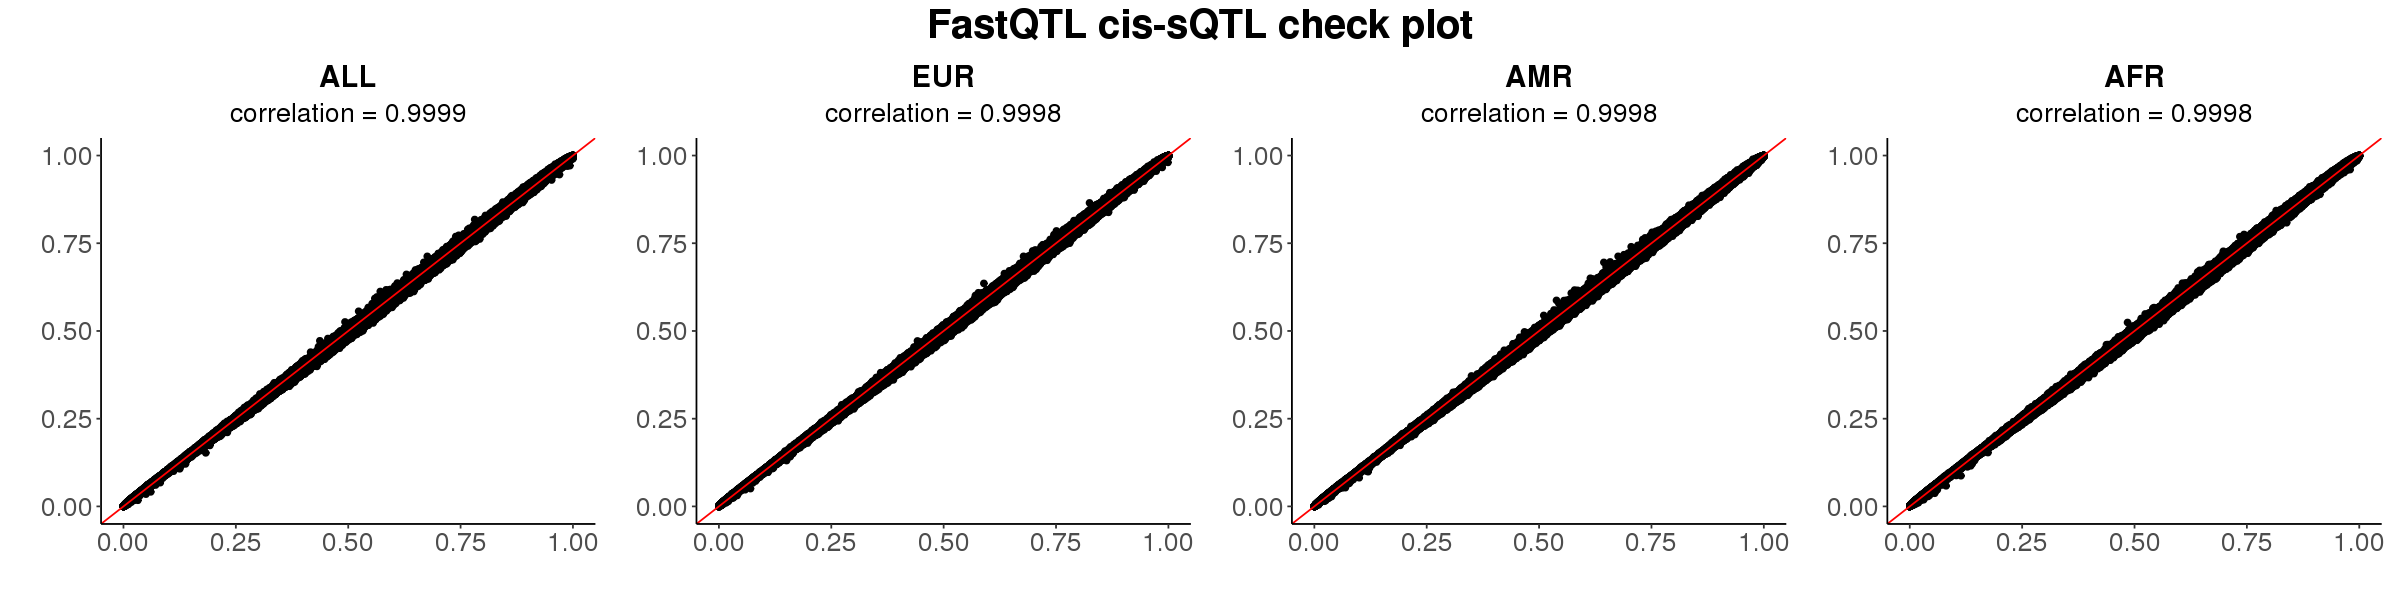

In [38]:
options(repr.plot.width=20, repr.plot.height=5)

p <- p1 + p2 + p3 + p4 +
  plot_annotation(title = "FastQTL cis-sQTL check plot",
                 theme = theme(plot.title = element_text(size = 24, face="bold", hjust = 0.5))) +
  plot_layout(ncol = 4)

p

In [39]:
ggsave("figures/check.png", p, width = 20, height = 5)

### 4: top sQTL distance to intron splice junction

In [4]:
mixed_sig <- read.table("results/mixed_perm_35hcp_1e5/sig_pheno.txt", header = T, stringsAsFactors = F)
all_assoc <- fread("results/mixed_perm_35hcp_1e5/all_assoc.txt.gz", data.table = F)

eur_sig <- read.table("results/eur_perm_25HCP_1e5/sig_pheno.txt", header = T, stringsAsFactors = F)
all_assoc_eur <- fread("results/eur_perm_25HCP_1e5/all_assoc.txt.gz", data.table = F)

amr_sig <- read.table("results/amr_perm_10HCP_1e5/sig_pheno.txt", header = T, stringsAsFactors = F)
all_assoc_amr <- fread("results/amr_perm_10HCP_1e5/all_assoc.txt.gz", data.table = F)

afr_sig <- read.table("results/afr_perm_12HCP_1e5/sig_pheno.txt", header = T, stringsAsFactors = F)
all_assoc_afr <- fread("results/afr_perm_12HCP_1e5/all_assoc.txt.gz", data.table = F)

** sig vs non-sig **

In [5]:
all_assoc <- all_assoc %>% mutate(sig = ifelse(qval <= 0.05, "significant", "non-significant"))
all_assoc$sig <- as.factor(all_assoc$sig)
all_assoc <- all_assoc %>% mutate(dist_kb = dist/1000)

all_assoc_eur <- all_assoc_eur %>% mutate(sig = ifelse(qval <= 0.05, "significant", "non-significant"))
all_assoc_eur <- all_assoc_eur %>% mutate(dist_kb = dist/1000)
all_assoc_eur$sig <- as.factor(all_assoc_eur$sig)

all_assoc_amr <- all_assoc_amr %>% mutate(sig = ifelse(qval <= 0.05, "significant", "non-significant"))
all_assoc_amr <- all_assoc_amr %>% mutate(dist_kb = dist/1000)
all_assoc_amr$sig <- as.factor(all_assoc_amr$sig)

all_assoc_afr <- all_assoc_afr %>% mutate(sig = ifelse(qval <= 0.05, "significant", "non-significant"))
all_assoc_afr <- all_assoc_afr %>% mutate(dist_kb = dist/1000)
all_assoc_afr$sig <- as.factor(all_assoc_afr$sig)

In [6]:
all_assoc_eur_amr_afr <- rbind(all_assoc_eur, all_assoc_amr, all_assoc_afr)
all_assoc_eur_amr_afr$ancestry <- c(rep("EUR", nrow(all_assoc_eur)), 
                                    rep("AMR", nrow(all_assoc_amr)), 
                                    rep("AFR", nrow(all_assoc_afr)))
all_assoc_eur_amr_afr$ancestry <- factor(all_assoc_eur_amr_afr$ancestry, 
                                             levels = c("EUR", "AMR", "AFR"))

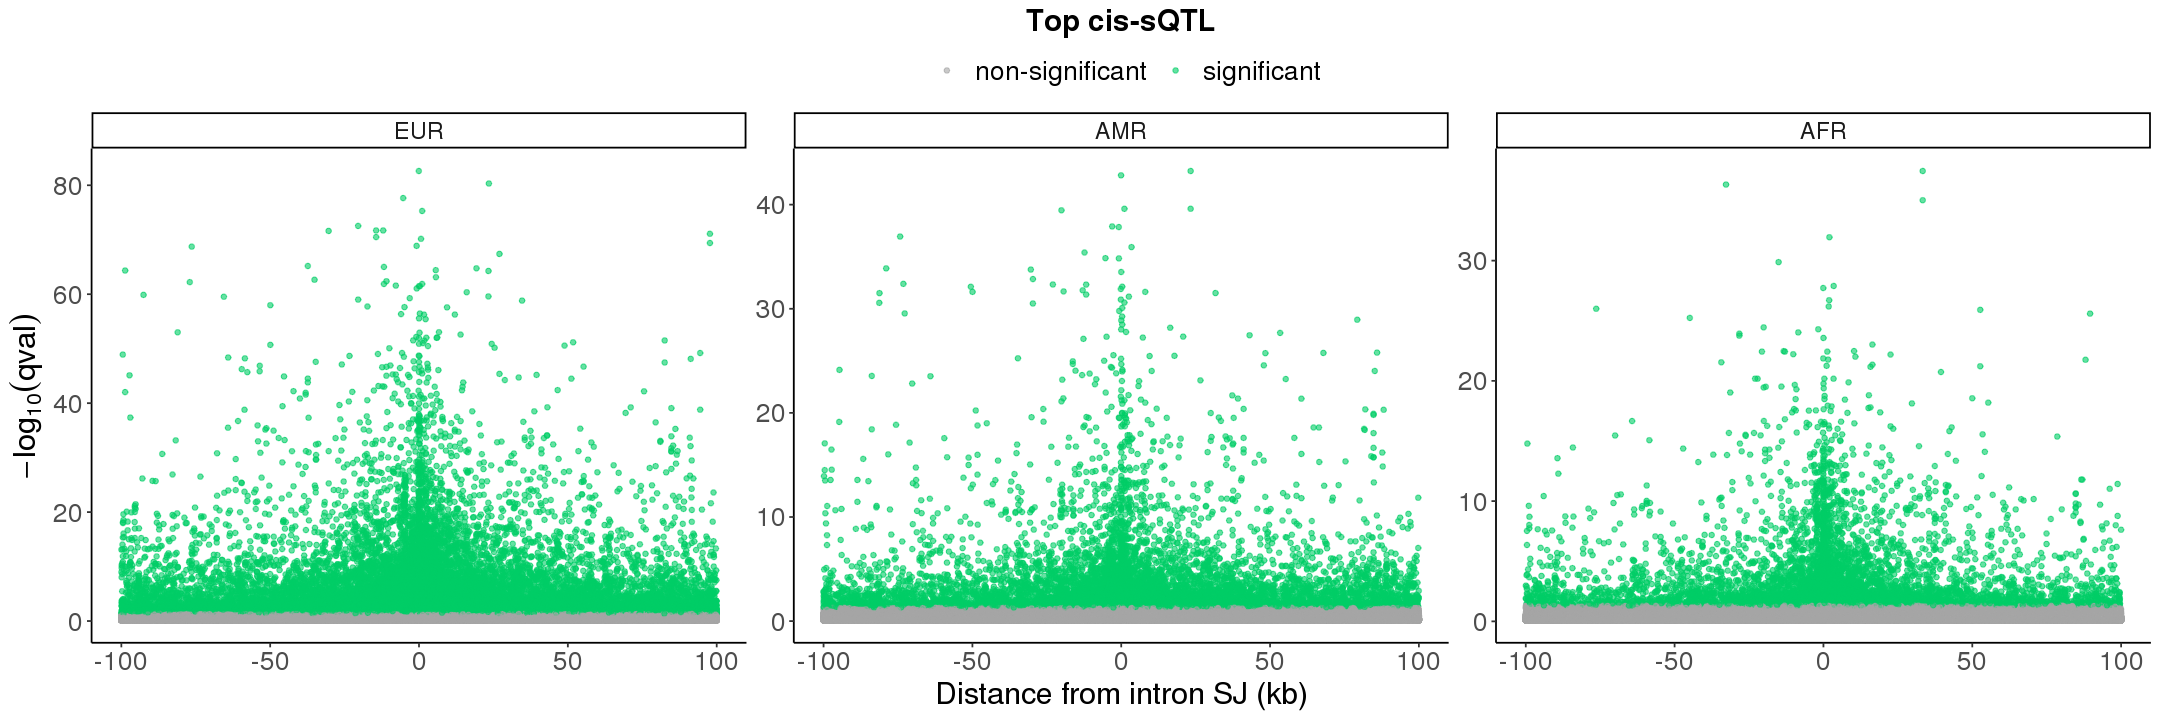

In [7]:
options(repr.plot.width=18, repr.plot.height=6)
p <- ggplot(all_assoc_eur_amr_afr, aes(x = dist_kb)) +
    geom_point(aes(y = -log10(qval), color = sig), alpha = .6, size = 1.2) +
    facet_wrap (~ancestry, scales = "free", ncol=4) +
    labs(x = "Distance from intron SJ (kb)",
         y = expression(-log[10](qval)),
         title = "Top cis-sQTL",
         color = "") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        legend.text = element_text(size = 16),
        legend.title = element_text(size = 16),
         legend.position = "top",
         strip.text.x = element_text(size = 14)) +
    scale_color_manual(values=c("grey65", "springgreen3")) 
p

In [8]:
ggsave("figures/dist.png", p, height = 6, width = 24)

**Plot eQTL, isoQTL, sQTL distance to TSS/SJ together. TODO: updated with 1e6 sQTL**

In [11]:
eqtl_all_assoc <- fread("../eqtl_new/results/mixed_perm_90hcp/all_assoc.txt.gz", data.table = F)
isoqtl_all_assoc <- fread("../isoqtl_new/results/mixed_perm_70hcp/all_assoc.txt.gz", data.table = F)

In [15]:
eqtl_all_assoc <- eqtl_all_assoc %>% mutate(dist_kb = dist/1000)
isoqtl_all_assoc <- isoqtl_all_assoc %>% mutate(dist_kb = dist/1000)

all_assoc_sig <- all_assoc %>% filter(qval <= 0.05)
all_assoc_sig <- all_assoc_sig %>% select(-sig)
eqtl_all_assoc_sig <- eqtl_all_assoc %>% filter(qval <= 0.05)
isoqtl_all_assoc_sig <- isoqtl_all_assoc %>% filter(qval <= 0.05)

In [27]:
all_assoc_sig_e_iso_s <- rbind(eqtl_all_assoc_sig, isoqtl_all_assoc_sig, all_assoc_sig)
all_assoc_sig_e_iso_s$group <- c(rep("Top cis-eQTL", nrow(eqtl_all_assoc_sig)), 
                                    rep("Top cis-isoQTL", nrow(isoqtl_all_assoc_sig)), 
                                    rep("Top cis-sQTL", nrow(all_assoc_sig)))
all_assoc_sig_e_iso_s$group <- factor(all_assoc_sig_e_iso_s$group, 
                                             levels = c("Top cis-eQTL", "Top cis-isoQTL", "Top cis-sQTL"))

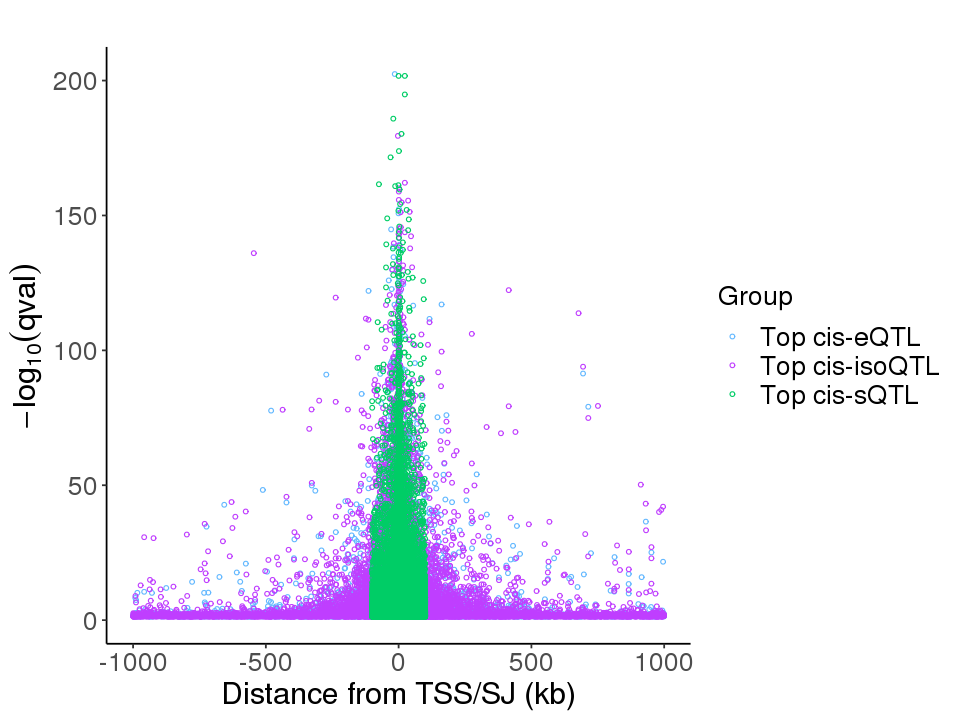

In [29]:
options(repr.plot.width = 8, repr.plot.height = 6)
p <- ggplot(all_assoc_sig_e_iso_s, aes(x = dist_kb)) +
    geom_point(aes(y = -log10(qval), color = group), alpha = 1, size = 1, shape = 1) +
    labs(x = "Distance from TSS/SJ (kb)",
         y = expression(-log[10](qval)),
         title = "",
         color = "Group") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face="bold", hjust = 0.5),
        legend.text = element_text(size = 16),
        legend.title = element_text(size = 16),
         legend.position = "right") +
    scale_color_manual(values=c("steelblue1", "darkorchid1", "springgreen3"))
p

In [31]:
ggsave("figures/e_iso_s_dist.png", p, width = 8, height = 6)

### 5: Map introns to genes; identify sGene

### 5-1: The GTEx way. See Snakefile rule `map_clusters_to_genes`
- Idea: for each intron, match it to exons by 3' or 5' position; then map intron clusters to all the genes that introns in this cluster can map to; one cluster can map to multiple genes
- In this way 71,429 out of 105,700 clusters mapped to some genes; 5,132 clusters mapped to more than 1 gene

In [40]:
exons_table <- fread("leafviz_annot/gencode_v33lift37_all_exons.txt.gz", data.table = F)
dim(exons_table)
head(exons_table)

[1] 1379814       5

chr   start     end       strand gene_name
1 chr17  40475053  40475643 -      STAT3    
2 chr17  40476729  40476864 -      STAT3    
3 chr17  40476981  40477079 -      STAT3    
4 chr2  105049895 105050981 +      LINC01102
5 chr2  105122324 105122761 +      LINC01102
6 chr2  105123690 105123864 +      LINC01102

In [41]:
intron_counts <- fread("cluster/leafcutter_perind.counts.gz", data.table = F)

In [42]:
dim(intron_counts)
head(intron_counts)

[1] 502571    655

chrom                    
1 chr2:28307:31216:clu_1_NA
2 chr2:28307:31857:clu_1_NA
3 chr2:28307:45490:clu_1_NA
4 chr2:28307:50703:clu_1_NA
5 chr2:28307:81451:clu_1_NA
6 chr2:37649:37743:clu_2_NA
  Br2410.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 0/0                                                  
2 0/0                                                  
3 0/0                                                  
4 0/0                                                  
5 0/0                                                  
6 0/0                                                  
  1513.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 0/0                                                
2 0/0                                                
3 0/0                                                
4 0/0                                                
5 0/0                                                
6 0/0                                                
  RNAID1940.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 0/0                                                     
2 0/0                                                     
3 0/0                                                     
4 0/0                                                     
5 0/0                                                     
6 1/1                                                     
  RNAID1946.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 0/0                                                     
2 0/0                                                     
3 0/0                                                     
4 0/0                                                     
5 0/0                                                     
6 0/0                                                     
  Br1800.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 0/0                                                  
2 0/0                                                  
3 0/0                                                  
4 0/0                                                  
5 0/0                                                  
6 0/0                                                  
  11237.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 0/0                                                 
2 0/0                                                 
3 0/0                                                 
4 0/0                                                 
5 0/0                                                 
6 0/0                                                 
  18015.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 0/0                                                 
2 0/0                                                 
3 0/0                                                 
4 0/0                                                 
5 0/0                                                 
6 0/0                                                 
  11149.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 0/0                                                 
2 0/0                                                 
3 0/0                                                 
4 0/0                                                 
5 0/0                                                 
6 0/0                                                 
  1821.STARAligned.sortedByCoord.WASPfiltered.out.bam ⋯
1 0/0                                                 ⋯
2 0/0                                                 ⋯
3 0/0                                                 ⋯
4 0/0                                                 ⋯
5 0/0                                                 ⋯
6 0/0                                                 ⋯
  11397.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 0/0                                                 
2 0/0                                                 
3 0/0                                                 
4 0/0                                              

In [43]:
introns <- intron_counts$chrom
intron_meta <- do.call(rbind, strsplit(introns,":"))
colnames(intron_meta) <- c("chr","start","end","clu")
intron_meta <- as.data.frame(intron_meta, stringsAsFactors=FALSE)
intron_meta$start <- as.numeric(intron_meta$start)
intron_meta$end <- as.numeric(intron_meta$end)

head(intron_meta)

chr  start end   clu     
1 chr2 28307 31216 clu_1_NA
2 chr2 28307 31857 clu_1_NA
3 chr2 28307 45490 clu_1_NA
4 chr2 28307 50703 clu_1_NA
5 chr2 28307 81451 clu_1_NA
6 chr2 37649 37743 clu_2_NA

In [47]:
chr <- "chr22"

In [48]:
intron_chr <- intron_meta[ intron_meta$chr==chr, ]
dim(intron_chr)
exons_chr <- exons_table[exons_table$chr==chr, ]
dim(exons_chr)

[1] 11777     4

[1] 29775     5

In [49]:
exons_chr$temp <- exons_chr$start
intron_chr$temp <- intron_chr$end
three_prime_matches <- inner_join( intron_chr, exons_chr, by="temp")

exons_chr$temp <- exons_chr$end
intron_chr$temp <- intron_chr$start
five_prime_matches <- inner_join( intron_chr, exons_chr, by="temp")

In [50]:
head(three_prime_matches)
dim(three_prime_matches)

chr.x start.x  end.x    clu          temp     chr.y start.y  end.y    strand
1 chr22 16189378 16190681 clu_25302_NA 16190681 chr22 16190681 16190791 -     
2 chr22 16189378 16190681 clu_25302_NA 16190681 chr22 16190681 16190791 -     
3 chr22 16189378 16190681 clu_25302_NA 16190681 chr22 16190681 16190791 -     
4 chr22 16189411 16190681 clu_25302_NA 16190681 chr22 16190681 16190791 -     
5 chr22 16189411 16190681 clu_25302_NA 16190681 chr22 16190681 16190791 -     
6 chr22 16189411 16190681 clu_25302_NA 16190681 chr22 16190681 16190791 -     
  gene_name 
1 AP000525.9
2 AP000525.9
3 AP000525.9
4 AP000525.9
5 AP000525.9
6 AP000525.9

[1] 28379    10

In [51]:
all_matches <- rbind(three_prime_matches, five_prime_matches)[ , c("clu", "gene_name")]

In [52]:
dim(all_matches)

[1] 57335     2

In [53]:
all_matches <- all_matches[!duplicated(all_matches),]
dim(all_matches)

[1] 1832    2

In [54]:
length(unique(all_matches$clu))

[1] 1625

In [2]:
res <- fread("leafviz_annot/leafcutter_clusters_to_genes.txt", data.table = F)

In [3]:
head(res)

clu               genes  
1 chr1:clu_10000_NA BSDC1  
2 chr1:clu_10001_NA FAM167B
3 chr1:clu_10003_NA MTMR9LP
4 chr1:clu_10004_NA LCK    
5 chr1:clu_10005_NA LCK    
6 chr1:clu_10006_NA LCK

In [4]:
dim(res)
length(unique(res$clu))

[1] 71429     2

[1] 71429

In [5]:
sum(grepl(",", res$genes))

[1] 5132

In [6]:
head(res[grepl(",", res$genes),])

clu               genes                              
18  chr1:clu_10032_NA AL033529.1,ZBTB8B                  
19  chr1:clu_10034_NA ZBTB8A,AL033529.1                  
60  chr1:clu_10110_NA PHC2,A3GALT2                       
106 chr1:clu_10166_NA SMIM12,AL121988.1                  
111 chr1:clu_10173_NA TMEM35B,AC114490.3,AC114490.2,ZMYM6
112 chr1:clu_10174_NA ZMYM6,AC114490.2

### 5-2: Leafviz way
See Snakefile rule `annotate_intron` and `summarise_annot`.

In [54]:
load("leafviz_annot/leafviz.RData")

In [56]:
length(classification.list)
length(constitutive.list)
length(coord.list)
length(ensemblID.list)
length(unlist(ensemblID.list))
length(gene.list)
length(unlist(gene.list))
length(transcripts.list)
length(unlist(transcripts.list))
length(verdict.list)
length(unlist(verdict.list))

[1] 105700

[1] 105700

[1] 105700

[1] 105700

[1] 502571

[1] 105700

[1] 502571

[1] 105700

[1] 502571

[1] 105700

[1] 502571

In [57]:
load("leafviz_annot/all.introns.RData")

In [10]:
head(all.introns)

chr  start end   clusterID verdict        gene ensemblID transcripts
1 chr2 28307 31216 clu_1_NA  unknown_strand .    .         NA         
2 chr2 28307 31857 clu_1_NA  unknown_strand .    .         NA         
3 chr2 28307 45490 clu_1_NA  unknown_strand .    .         NA         
4 chr2 28307 50703 clu_1_NA  unknown_strand .    .         NA         
5 chr2 28307 81451 clu_1_NA  unknown_strand .    .         NA         
6 chr2 37649 37743 clu_2_NA  unknown_strand .    .         NA         
  constitutive.score
1 1                 
2 1                 
3 1                 
4 1                 
5 1                 
6 1

In [58]:
dim(all.introns)
length(unique(all.introns$gene))
length(unique(all.introns$ensemblID))

[1] 502571      9

[1] 22743

[1] 22751

**Any genes with more than 1 ensemblID?**

Yes. Very few. See below for an example. `C2orf27A` has two ensemblID in gencode annotation. `annotate_intron.R` will match the intron cluster to the ensemblID it matches. 

In [13]:
df <- data.frame("gene" = unique(all.introns$gene),
                 "gene_id" = NA)

In [54]:
# for (i in 1:nrow(df)) {
#     df[i,2] <- c(unique(all.introns %>% filter(gene == df[i,1]) %>% select(ensemblID))$ensemblID)
# }

In [21]:
all.introns %>% filter(ensemblID %in% c("ENSG00000287151.1_1", "ENSG00000197927.13_7"))

chr  start     end       clusterID   verdict              gene    
1  chr2 132440130 132442282 clu_4259_NA annotated            C2orf27A
2  chr2 132440172 132442282 clu_4259_NA annotated            C2orf27A
3  chr2 132440561 132442282 clu_4259_NA cryptic_fiveprime    C2orf27A
4  chr2 132441427 132442282 clu_4259_NA cryptic_fiveprime    C2orf27A
5  chr2 132442346 132443637 clu_4260_NA cryptic_fiveprime    C2orf27A
6  chr2 132442392 132443637 clu_4260_NA annotated            C2orf27A
7  chr2 132442392 132443670 clu_4260_NA annotated            C2orf27A
8  chr2 132442392 132443903 clu_4260_NA novel annotated pair C2orf27A
9  chr2 132443784 132443903 clu_4260_NA annotated            C2orf27A
10 chr2 132445876 132454442 clu_4261_NA annotated            C2orf27A
11 chr2 132445876 132479990 clu_4261_NA annotated            C2orf27A
12 chr2 132445876 132491406 clu_4261_NA novel annotated pair C2orf27A
13 chr2 132445876 132508206 clu_4261_NA novel annotated pair C2orf27A
14 chr2 132454648 132479990 clu_4261_NA cryptic_fiveprime    C2orf27A
15 chr2 132480221 132480455 clu_4261_NA cryptic_threeprime   C2orf27A
16 chr2 132480221 132481102 clu_4261_NA cryptic_threeprime   C2orf27A
17 chr2 132480221 132481242 clu_4261_NA cryptic_threeprime   C2orf27A
18 chr2 132480221 132491406 clu_4261_NA annotated            C2orf27A
19 chr2 132480221 132508206 clu_4261_NA annotated            C2orf27A
20 chr2 132491525 132508206 clu_4261_NA annotated            C2orf27A
21 chr2 132508403 132508526 clu_4262_NA cryptic_threeprime   C2orf27A
22 chr2 132508403 132509082 clu_4262_NA annotated            C2orf27A
23 chr2 132509158 132510950 clu_4263_NA cryptic_threeprime   C2orf27A
24 chr2 132509158 132515749 clu_4263_NA cryptic_threeprime   C2orf27A
25 chr2 132509158 132515931 clu_4263_NA cryptic_threeprime   C2orf27A
26 chr2 132509158 132524192 clu_4263_NA annotated            C2orf27A
27 chr2 132509158 132531130 clu_4263_NA cryptic_threeprime   C2orf27A
28 chr2 132516066 132524192 clu_4263_NA cryptic_fiveprime    C2orf27A
29 chr2 132516110 132516520 clu_4263_NA cryptic_threeprime   C2orf27A
30 chr2 132516110 132524192 clu_4263_NA annotated            C2orf27A
31 chr2 132516820 132524192 clu_4263_NA cryptic_fiveprime    C2orf27A
   ensemblID           
1  ENSG00000287151.1_1 
2  ENSG00000287151.1_1 
3  ENSG00000287151.1_1 
4  ENSG00000287151.1_1 
5  ENSG00000287151.1_1 
6  ENSG00000287151.1_1 
7  ENSG00000287151.1_1 
8  ENSG00000287151.1_1 
9  ENSG00000287151.1_1 
10 ENSG00000287151.1_1 
11 ENSG00000287151.1_1 
12 ENSG00000287151.1_1 
13 ENSG00000287151.1_1 
14 ENSG00000287151.1_1 
15 ENSG00000287151.1_1 
16 ENSG00000287151.1_1 
17 ENSG00000287151.1_1 
18 ENSG00000287151.1_1 
19 ENSG00000287151.1_1 
20 ENSG00000287151.1_1 
21 ENSG00000197927.13_7
22 ENSG00000197927.13_7
23 ENSG00000287151.1_1 
24 ENSG00000287151.1_1 
25 ENSG00000287151.1_1 
26 ENSG00000287151.1_1 
27 ENSG00000287151.1_1 
28 ENSG00000287151.1_1 
29 ENSG00000287151.1_1 
30 ENSG00000287151.1_1 
31 ENSG00000287151.1_1 
   transcripts                                                                                        
1  ENST00000657415.1_1+ENST00000666411.1_1                                                            
2  ENST00000653458.1_1                                                                                
3  .                                                                                                  
4  .                                                                                                  
5  .                                                                                                  
6  ENST00000652878.1_1+ENST00000657415.1_1+ENST00000666411.1_1                                        
7  ENST00000653458.1_1                                                                                
8  ENST00000652878.1_1+ENST00000653458.1_1+ENST00000657415.1_1+ENST00000666411.1_1                    
9  ENST00000652878.1_1+ENST00000653458.1_1+ENST00000655714.1_1+ENST0

** How many genes tested for sQTL? **

In [59]:
pheno <- fread("cluster/leafcutter_perind.counts.nochr.gz.qqnorm_all_fixSubj_combat.bed.gz", data.table = F)

In [60]:
dim(pheno)

[1] 273167    658

In [61]:
pheno <- pheno %>% select(ID)

In [62]:
all.introns <- all.introns %>% unite("ID", chr:start:end:clusterID, na.rm = FALSE, remove = TRUE, sep = ":")
head(all.introns)

Warning message in x:y:
“numerical expression has 2 elements: only the first used”
Warning message in x:y:
“numerical expression has 3 elements: only the first used”


ID                        verdict        gene ensemblID transcripts
1 chr2:28307:31216:clu_1_NA unknown_strand .    .         NA         
2 chr2:28307:31857:clu_1_NA unknown_strand .    .         NA         
3 chr2:28307:45490:clu_1_NA unknown_strand .    .         NA         
4 chr2:28307:50703:clu_1_NA unknown_strand .    .         NA         
5 chr2:28307:81451:clu_1_NA unknown_strand .    .         NA         
6 chr2:37649:37743:clu_2_NA unknown_strand .    .         NA         
  constitutive.score
1 1                 
2 1                 
3 1                 
4 1                 
5 1                 
6 1

In [63]:
all.introns$ID <- gsub("chr", "", all.introns$ID)
head(all.introns)

ID                     verdict        gene ensemblID transcripts
1 2:28307:31216:clu_1_NA unknown_strand .    .         NA         
2 2:28307:31857:clu_1_NA unknown_strand .    .         NA         
3 2:28307:45490:clu_1_NA unknown_strand .    .         NA         
4 2:28307:50703:clu_1_NA unknown_strand .    .         NA         
5 2:28307:81451:clu_1_NA unknown_strand .    .         NA         
6 2:37649:37743:clu_2_NA unknown_strand .    .         NA         
  constitutive.score
1 1                 
2 1                 
3 1                 
4 1                 
5 1                 
6 1

In [64]:
pheno <- pheno %>% left_join(all.introns, by = "ID")
head(pheno)

ID                        verdict            gene   ensemblID          
1 1:14829:14930:clu_7637_NA cryptic_unanchored WASH7P ENSG00000227232.5_3
2 1:14829:14970:clu_7637_NA cryptic_unanchored WASH7P ENSG00000227232.5_3
3 1:14829:15021:clu_7637_NA cryptic_unanchored WASH7P ENSG00000227232.5_3
4 1:14829:15796:clu_7637_NA cryptic_threeprime WASH7P ENSG00000227232.5_3
5 1:15038:15796:clu_7637_NA annotated          WASH7P ENSG00000227232.5_3
6 1:15942:16607:clu_7638_NA cryptic_threeprime WASH7P ENSG00000227232.5_3
  transcripts         constitutive.score
1 NA                  0.5               
2 NA                  0.5               
3 NA                  0.5               
4 .                   0.0               
5 ENST00000488147.1_2 0.5               
6 .                   0.0

In [65]:
dim(pheno)
length(unique(pheno$ID))
length(unique(pheno$gene))
length(unique(pheno$ensemblID))

[1] 273167      6

[1] 273167

[1] 14362

[1] 14368

In [45]:
save(pheno, file = "leafviz_annot/all.introns.tested.RData")

** sGene, combined **

In [4]:
load("leafviz_annot/all.introns.tested.RData")

In [73]:
dim(mixed_sig)

[1] 37706    13

In [74]:
mixed_sig <- mixed_sig %>% left_join(pheno, by=c("pid"="ID"))
length(unique(mixed_sig$gene))
length(unique(mixed_sig$ensemblID))

[1] 7890

[1] 7893

In [75]:
mixed_sig <- mixed_sig %>% separate(ensemblID, c("ensg", "version"), remove = FALSE, sep = "[.]")
length(unique(mixed_sig$ensg))

[1] 7893

In [76]:
annot <- fread("../salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table=F)

In [77]:
mixed_sig <- mixed_sig %>% left_join(annot, by="ensg")

In [79]:
names(mixed_sig)
dim(mixed_sig)

[1] "pid"                    "nvar"                   "shape1"                
 [4] "shape2"                 "dummy"                  "sid"                   
 [7] "dist"                   "npval"                  "slope"                 
[10] "ppval"                  "bpval"                  "qval"                  
[13] "pval_nominal_threshold" "verdict"                "gene"                  
[16] "ensemblID"              "ensg"                   "version.x"             
[19] "transcripts"            "constitutive.score"     "V1"                    
[22] "V2"                     "V3"                     "V4"                    
[25] "V5"                     "V6"                     "V7"                    
[28] "V8"                     "V9"                     "version.y"             
[31] "V11"                    "V12"

[1] 37706    32

In [80]:
mixed_sig <- mixed_sig[,c(1:20, 31, 32)]

In [53]:
# # check if gene name from leafviz are the same as from gencode annot
# # but there are '.' in gene
# sum(!is.na(res2$gene) == !is.na(res2$'V12'))
# res2[!is.na(res2$gene) != !is.na(res2$'V12'),] %>% select(gene, ensemblID, V12)

In [81]:
mixed_sig <- mixed_sig[,-22]
names(mixed_sig)[21] <- "gene_type"
names(mixed_sig)[18] <- "version"
head(mixed_sig)

pid                                nvar shape1  shape2  dummy   sid       
1 1:100155428:100159575:clu_12419_NA 534  1.00497 89.3320 523.537 rs12130813
2 1:100159478:100159575:clu_12419_NA 540  1.01507 88.4715 521.427 rs12130813
3 1:100315657:100316531:clu_12429_NA 504  1.03721 63.7972 510.762 rs12726814
4 1:100315971:100316531:clu_12429_NA 505  1.04057 62.4951 503.719 rs12726814
5 1:100315971:100316591:clu_12429_NA 505  1.03559 65.5767 516.771 rs2307130 
6 1:100382287:100387090:clu_12437_NA 512  1.02151 57.3936 517.542 rs72965763
  dist   npval       slope     ppval      ⋯ qval        pval_nominal_threshold
1   3989 8.23427e-15  0.542826 0.00009999 ⋯ 6.43894e-10 0.000130477           
2    -61 7.58833e-16 -0.565636 0.00009999 ⋯ 7.40105e-11 0.000138338           
3 -36151 2.33720e-05 -0.239807 0.00399960 ⋯ 2.45490e-02 0.000212835           
4 -36465 1.19975e-05  0.249545 0.00199980 ⋯ 1.59563e-02 0.000220642           
5    617 2.49420e-05 -0.200559 0.00349965 ⋯ 2.44978e-02 0.000205522           
6  70625 3.67205e-05 -0.610493 0.00449955 ⋯ 3.06735e-02 0.000219865           
  verdict              gene  ensemblID            ensg            version
1 annotated            PALMD ENSG00000099260.11_4 ENSG00000099260 11_4   
2 cryptic_fiveprime    PALMD ENSG00000099260.11_4 ENSG00000099260 11_4   
3 cryptic_fiveprime    AGL   ENSG00000162688.17_4 ENSG00000162688 17_4   
4 annotated            AGL   ENSG00000162688.17_4 ENSG00000162688 17_4   
5 novel annotated pair AGL   ENSG00000162688.17_4 ENSG00000162688 17_4   
6 annotated            AGL   ENSG00000162688.17_4 ENSG00000162688 17_4   
  transcripts                                                                                                                                
1 ENST00000263174.9_3+ENST00000496843.1_1+ENST00000615664.1_1                                                                                
2 .                                                                                                                                          
3 .                                                                                                                                          
4 ENST00000361915.8_3                                                                                                                        
5 .                                                                                                                                          
6 ENST00000294724.8_2+ENST00000361302.7_2+ENST00000361915.8_3+ENST00000370161.6_2+ENST00000370163.7_2+ENST00000370165.7_2+ENST00000637337.1_1
  constitutive.score gene_type     
1 1.00               protein_coding
2 0.00               protein_coding
3 0.00               protein_coding
4 0.33               protein_coding
5 0.00               protein_coding
6 1.00               protein_coding

In [55]:
write.table(mixed_sig, "results/mixed_perm_35hcp/sig_pheno_gene_info.txt", col.names = T, row.names = F, quote = F, sep = "\t")

** EUR **

In [82]:
eur_sig <- eur_sig %>% left_join(pheno, by=c("pid"="ID"))

length(unique(eur_sig$gene))
length(unique(eur_sig$ensemblID))
eur_sig <- eur_sig %>% separate(ensemblID, c("ensg", "version"), remove = FALSE, sep = "[.]")

[1] 5576

[1] 5577

In [50]:
write.table(eur_sig, "results/eur_perm_25HCP/sig_pheno_gene.txt", col.names = T, row.names = F, quote = F, sep = "\t")

**AMR**

In [83]:
amr_sig <- amr_sig %>% left_join(pheno, by=c("pid"="ID"))

length(unique(amr_sig$gene))
length(unique(amr_sig$ensemblID))
amr_sig <- amr_sig %>% separate(ensemblID, c("ensg", "version"), remove = FALSE, sep = "[.]")

[1] 2542

[1] 2542

In [ ]:
write.table(amr_sig, "results/amr_perm_10HCP/sig_pheno_gene.txt", col.names = T, row.names = F, quote = F, sep = "\t")

**AFR**

In [84]:
afr_sig <- afr_sig %>% left_join(pheno, by=c("pid"="ID"))

length(unique(afr_sig$gene))
length(unique(afr_sig$ensemblID))
afr_sig <- afr_sig %>% separate(ensemblID, c("ensg", "version"), remove = FALSE, sep = "[.]")

[1] 2306

[1] 2306

In [ ]:
write.table(afr_sig, "results/afr_perm_12HCP/sig_pheno_gene.txt", col.names = T, row.names = F, quote = F, sep = "\t")

**write `all_assoc` with genes and info**

In [85]:
all_assoc <- all_assoc %>% left_join(pheno, by=c("pid" = "ID"))
length(unique((all_assoc %>% filter(qval < 0.05) %>% select(gene))$gene))

[1] 7890

In [8]:
all_assoc <- all_assoc %>% separate(ensemblID, c("ensg", "version"), remove = FALSE, sep = "[.]")

In [9]:
all_assoc <- all_assoc %>% left_join(annot, by="ensg")

In [11]:
all_assoc <- all_assoc[,c(1:20, 31, 32)]

In [15]:
all_assoc <- all_assoc[,-22]
names(all_assoc)[21] <- "gene_type"
names(all_assoc)[18] <- "version"

In [16]:
write.table(all_assoc, "results/mixed_perm_35hcp/all_assoc_perm_gene_info.txt", 
           col.names = T, row.names = F, quote = F, sep = "\t")

In [17]:
# EUR
all_assoc_eur <- all_assoc_eur %>% left_join(pheno, by=c("pid" = "ID"))
all_assoc_eur <- all_assoc_eur %>% separate(ensemblID, c("ensg", "version"), remove = FALSE, sep = "[.]")
all_assoc_eur <- all_assoc_eur %>% left_join(annot, by="ensg")
all_assoc_eur <- all_assoc_eur[,c(1:20, 31, 32)]
all_assoc_eur <- all_assoc_eur[,-22]
names(all_assoc_eur)[21] <- "gene_type"
names(all_assoc_eur)[18] <- "version"
# AMR
all_assoc_amr <- all_assoc_amr %>% left_join(pheno, by=c("pid" = "ID"))
all_assoc_amr <- all_assoc_amr %>% separate(ensemblID, c("ensg", "version"), remove = FALSE, sep = "[.]")
all_assoc_amr <- all_assoc_amr %>% left_join(annot, by="ensg")
all_assoc_amr <- all_assoc_amr[,c(1:20, 31, 32)]
all_assoc_amr <- all_assoc_amr[,-22]
names(all_assoc_amr)[21] <- "gene_type"
names(all_assoc_amr)[18] <- "version"
# AFR
all_assoc_afr <- all_assoc_afr %>% left_join(pheno, by=c("pid" = "ID"))
all_assoc_afr <- all_assoc_afr %>% separate(ensemblID, c("ensg", "version"), remove = FALSE, sep = "[.]")
all_assoc_afr <- all_assoc_afr %>% left_join(annot, by="ensg")
all_assoc_afr <- all_assoc_afr[,c(1:20, 31, 32)]
all_assoc_afr <- all_assoc_afr[,-22]
names(all_assoc_afr)[21] <- "gene_type"
names(all_assoc_afr)[18] <- "version"

In [22]:
write.table(all_assoc_eur, "results/eur_perm_25HCP/all_assoc_perm_gene_info.txt", 
           col.names = T, row.names = F, quote = F, sep = "\t")
write.table(all_assoc_amr, "results/amr_perm_10HCP/all_assoc_perm_gene_info.txt", 
           col.names = T, row.names = F, quote = F, sep = "\t")
write.table(all_assoc_afr, "results/afr_perm_12HCP/all_assoc_perm_gene_info.txt", 
           col.names = T, row.names = F, quote = F, sep = "\t")

** Intron annotation category **

In [87]:
df1 <- as.data.frame(table(all.introns$verdict))
df1 <- df1 %>% mutate(prop = Freq/502571)

df2 <- as.data.frame(table(pheno$verdict))
df2 <- df2 %>% mutate(prop = Freq/273167)

# df3 <- as.data.frame(table(mixed_sig$verdict))
# df3 <- df3 %>% mutate(prop = Freq/37706)


# df <- rbind(df1, df2, df3)
# df$group <- c(rep("502,571 detected", 6), 
#               rep("273,167 tested", 6),
#               rep("37,706 sIntron", 6))

df <- rbind(df1, df2)
df$group <- c(rep("502,571 introns detected", 6), 
              rep("273,167 introns tested", 6))

df$group <- factor(df$group, levels=c("502,571 introns detected", "273,167 introns tested"))
df

Var1                 Freq   prop       group                   
1  annotated            173261 0.34474930 502,571 introns detected
2  cryptic_fiveprime     65538 0.13040546 502,571 introns detected
3  cryptic_threeprime    68049 0.13540176 502,571 introns detected
4  cryptic_unanchored    32592 0.06485054 502,571 introns detected
5  novel annotated pair  37285 0.07418852 502,571 introns detected
6  unknown_strand       125846 0.25040442 502,571 introns detected
7  annotated            130424 0.47745152 273,167 introns tested  
8  cryptic_fiveprime     42034 0.15387657 273,167 introns tested  
9  cryptic_threeprime    45889 0.16798881 273,167 introns tested  
10 cryptic_unanchored    16605 0.06078699 273,167 introns tested  
11 novel annotated pair  28096 0.10285283 273,167 introns tested  
12 unknown_strand        10119 0.03704327 273,167 introns tested

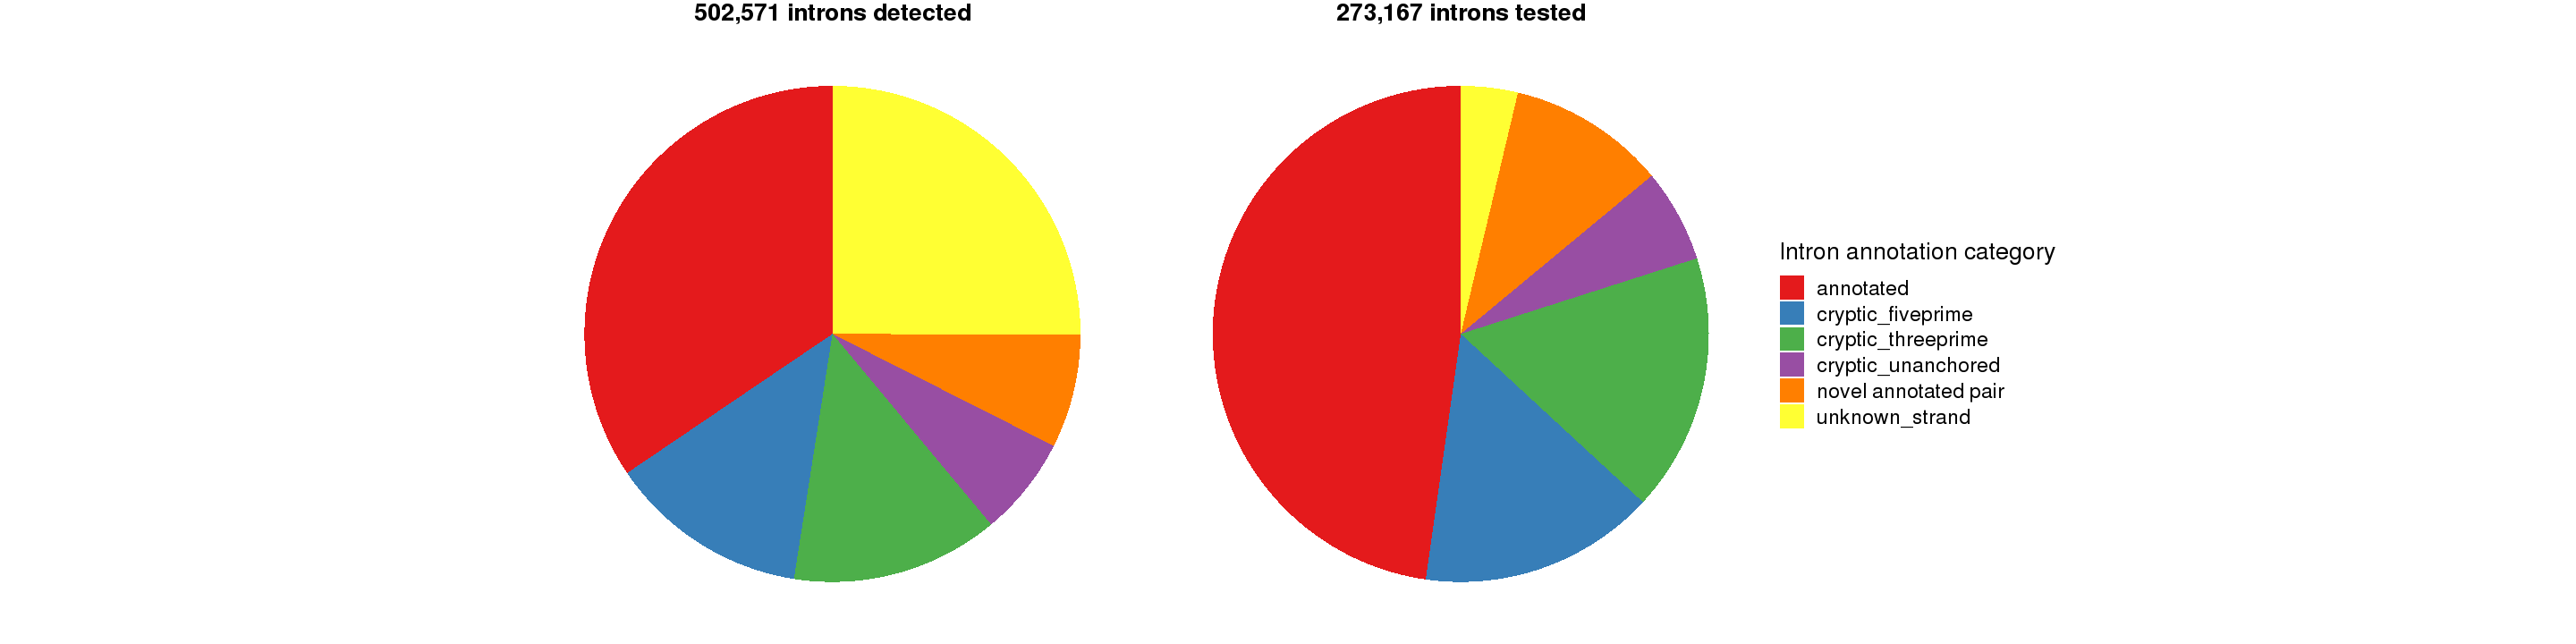

In [91]:
p <- ggplot(df, aes(x="", y=prop, fill=Var1)) +
  geom_bar(width = 1, stat = "identity") +
  facet_wrap(~group) +
  coord_polar("y", start = 0) +
  theme_void() +
  theme(legend.text = element_text(size=14),
        legend.title = element_text(size=16),
        plot.title = element_text(size=18, face="bold", hjust = 0.5),
        strip.text.x = element_text(size=16, face="bold")) +
  scale_fill_brewer(palette = "Set1") +
  labs(fill="Intron annotation category") 
#   ggtitle("Leafcutter intron annotation")

p 

In [92]:
ggsave("figures/introns_annot.png", p, height=6, width=12)

### 6: compare between ancestries

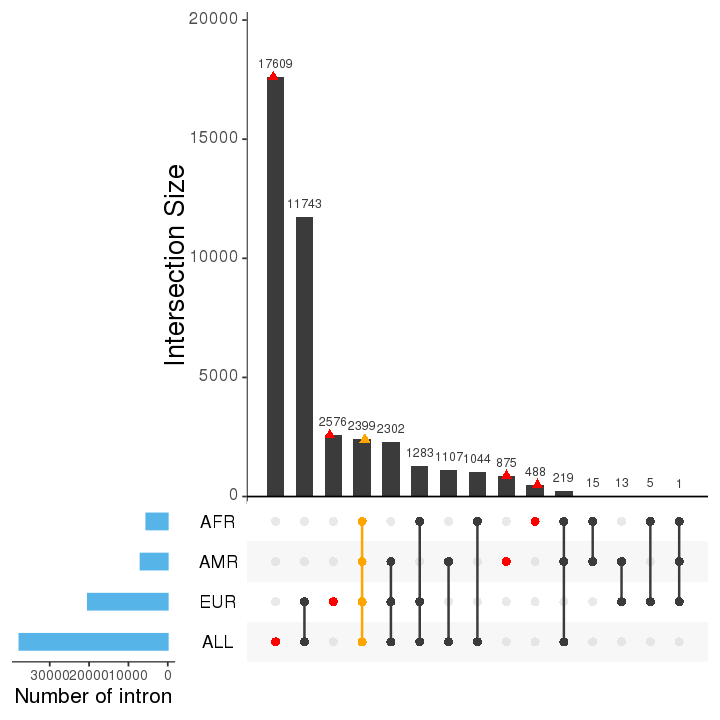

In [112]:
options(repr.plot.width = 6, repr.plot.height = 6)
mixed_intron <- unique(mixed_sig$pid)
eur_intron <- unique(eur_sig$pid)
amr_intron <- unique(amr_sig$pid)
afr_intron <- unique(afr_sig$pid)

intron <- list(ALL = mixed_intron,
            EUR = eur_intron,
            AMR = amr_intron,
            AFR = afr_intron)

upset(fromList(intron), order.by = "freq",
      sets.bar.color = "#56B4E9",
      empty.intersections = "on",
      sets.x.label = "Number of intron",
      queries = list(list(query = intersects, params = list("AFR","AMR","EUR","ALL"),
                          color = "orange", active = F),
                     list(query = intersects, params = list("AFR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("AMR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("EUR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("ALL"),
                          color = "red", active = F)),
      text.scale = c(2, 1.5, 1.5, 1.2, 1.5, 1.2))

In [113]:
pdf(file="figures/upsetr_intron.pdf", onefile=F)
upset(fromList(intron), order.by = "freq",
      sets.bar.color = "#56B4E9",
      empty.intersections = "on",
      sets.x.label = "Number of intron",
      queries = list(list(query = intersects, params = list("AFR","AMR","EUR","ALL"),
                          color = "orange", active = F),
                     list(query = intersects, params = list("AFR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("AMR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("EUR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("ALL"),
                          color = "red", active = F)),
      text.scale = c(2, 1.5, 1.5, 1.2, 1.5, 1.2))
dev.off()

png 
  2

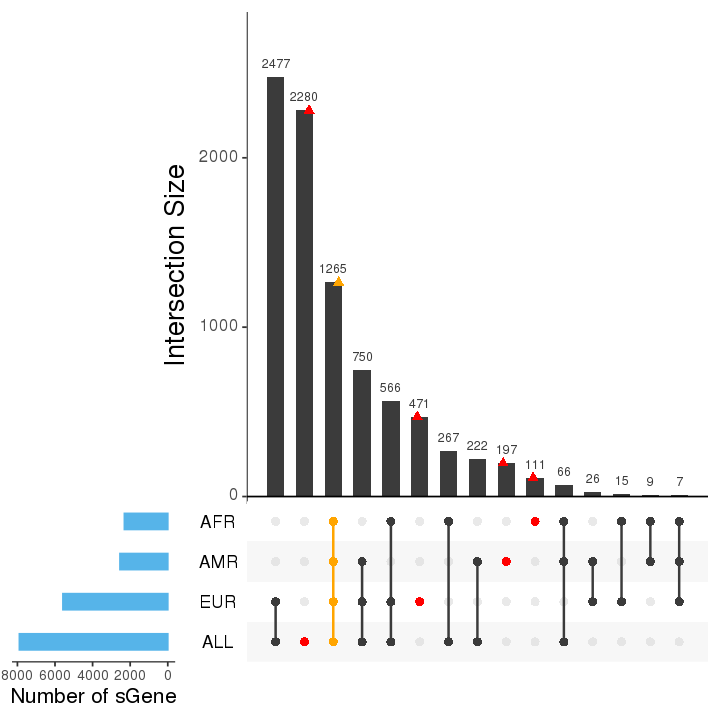

In [114]:
mixed_gene <- unique(mixed_sig$ensg)
eur_gene <- unique(eur_sig$ensg)
amr_gene <- unique(amr_sig$ensg)
afr_gene <- unique(afr_sig$ensg)

gene <- list(ALL = mixed_gene,
            EUR = eur_gene,
            AMR = amr_gene,
            AFR = afr_gene)

upset(fromList(gene), order.by = "freq",
      sets.bar.color = "#56B4E9",
      empty.intersections = "on",
      sets.x.label = "Number of sGene",
      queries = list(list(query = intersects, params = list("AFR","AMR","EUR","ALL"),
                          color = "orange", active = F),
                     list(query = intersects, params = list("AFR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("AMR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("EUR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("ALL"),
                          color = "red", active = F)),
      text.scale = c(2, 1.5, 1.5, 1.2, 1.5, 1.2))

In [115]:
pdf(file="figures/upsetr_sgene.pdf", onefile=F)
upset(fromList(gene), order.by = "freq",
      sets.bar.color = "#56B4E9",
      empty.intersections = "on",
      sets.x.label = "Number of sGene",
      queries = list(list(query = intersects, params = list("AFR","AMR","EUR","ALL"),
                          color = "orange", active = F),
                     list(query = intersects, params = list("AFR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("AMR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("EUR"),
                          color = "red", active = F),
                     list(query = intersects, params = list("ALL"),
                          color = "red", active = F)),
      text.scale = c(2, 1.5, 1.5, 1.2, 1.5, 1.2))
dev.off()

png 
  2

### 7: compare e/iso/sGene

** Common genes **

In [98]:
egene <- fread("../eqtl_new/results/mixed_perm_90hcp/sig_pheno_info.txt", data.table = F)
iso <- fread("../isoqtl_new/results/mixed_perm_70hcp/sig_pheno_gene_info.txt", data.table = F)

[1] 10094

[1] 11468

[1] 7893

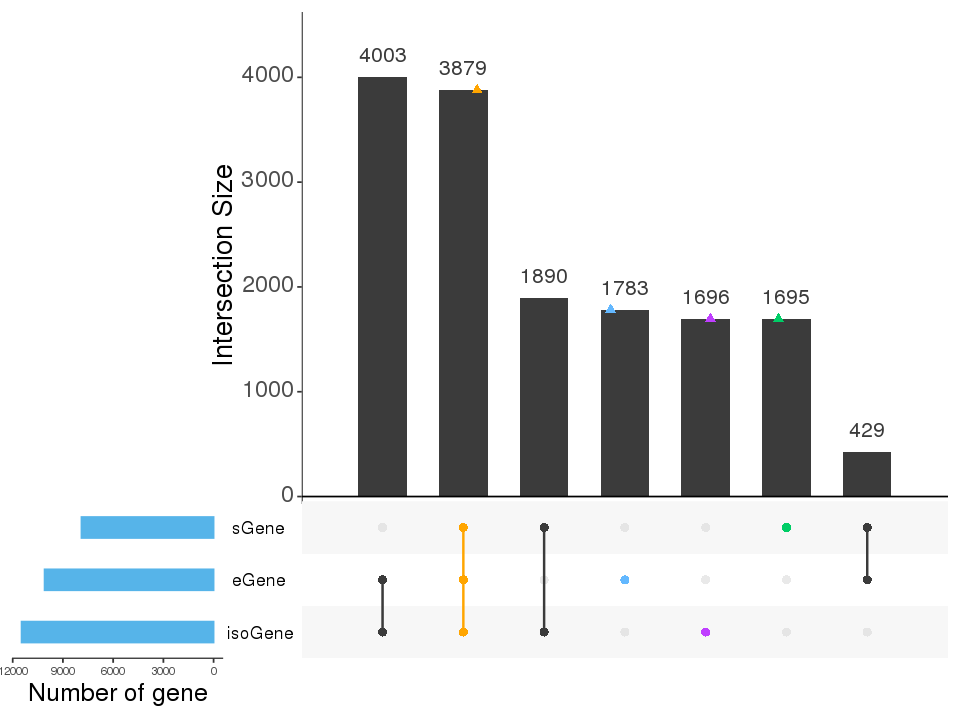

In [130]:
egenes <- unique(egene$pid)
length(egenes)
isogenes <- unique(iso$Gene)
length(isogenes)
# sgenes <- unique(mixed_sig$ensg)
# length(sgenes)
length(mixed_gene)

compare <- list(eGene = egenes, isoGene = isogenes, sGene = mixed_gene)

upset(fromList(compare), order.by = "freq",
      sets.bar.color = "#56B4E9",
      empty.intersections = "on",
      sets.x.label = "Number of gene",
      queries = list(list(query = intersects, params = list("eGene","isoGene","sGene"),
                          color = "orange", active = F),
                     list(query = intersects, params = list("eGene"),
                          color = "steelblue1", active = F),
                     list(query = intersects, params = list("isoGene"),
                          color = "darkorchid1", active = F),
                     list(query = intersects, params = list("sGene"),
                          color = "springgreen3", active = F)),
      text.scale = c(2, 2, 1.8, 1, 1.5, 2))

In [131]:
pdf(file="figures/e_iso_sgene.pdf", onefile=F, width = 6, height = 6)
upset(fromList(compare), order.by = "freq",
      sets.bar.color = "#56B4E9",
      empty.intersections = "on",
      sets.x.label = "Number of gene",
      queries = list(list(query = intersects, params = list("eGene","isoGene","sGene"),
                          color = "orange", active = F),
                     list(query = intersects, params = list("eGene"),
                          color = "steelblue1", active = F),
                     list(query = intersects, params = list("isoGene"),
                          color = "darkorchid1", active = F),
                     list(query = intersects, params = list("sGene"),
                          color = "springgreen3", active = F)),
      text.scale = c(2, 2, 1.8, 1, 1.5, 2))
dev.off()

png 
  2

** Gene types**

In [116]:
dim(egene)
length(unique(egene$pid))
df <- as.data.frame(sort(table(egene$gene_type)))
df <- df[order(df$Freq, decreasing = TRUE),]
df <- df[c(1:4),]
df
df$Var1 <- as.character(df$Var1)
df[5,] <- c("Other", (10094-sum(as.numeric(sum(df$Freq[1:4])))))
df

[1] 10094    16

[1] 10094

Var1                               Freq
25 protein_coding                     6278
24 lncRNA                             2448
23 processed_pseudogene                378
22 transcribed_unprocessed_pseudogene  244

Var1                               Freq
25 protein_coding                     6278
24 lncRNA                             2448
23 processed_pseudogene               378 
22 transcribed_unprocessed_pseudogene 244 
5  Other                              746

In [117]:
iso_gene <- iso[!duplicated(iso$Gene),]
dim(iso_gene)
length(unique(iso_gene$Gene))
df1 <- as.data.frame(sort(table(iso_gene$gene_type)))
df1 <- df1[order(df1$Freq, decreasing = TRUE),]
df1 <- df1[c(1:4),]
df1
df1$Var1 <- as.character(df1$Var1)
df1[5,] <- c("Other", (11468-sum(as.numeric(sum(df1$Freq[1:4])))))
df1

[1] 11468    16

[1] 11468

Var1                               Freq
25 protein_coding                     8074
24 lncRNA                             2207
23 processed_pseudogene                323
22 transcribed_unprocessed_pseudogene  238

Var1                               Freq
25 protein_coding                     8074
24 lncRNA                             2207
23 processed_pseudogene               323 
22 transcribed_unprocessed_pseudogene 238 
5  Other                              626

In [119]:
s_gene <- mixed_sig[!duplicated(mixed_sig$ensg),]
dim(s_gene)
df2 <- as.data.frame(sort(table(s_gene$gene_type)))
df2 <- df2[order(df2$Freq, decreasing = TRUE),]
df2 <- df2[c(1:4),]
df2
df2$Var1 <- as.character(df2$Var1)
df2[5,] <- c("Other", (7893-sum(as.numeric(sum(df2$Freq[1:4])))))
df2

[1] 7893   21

Var1                               Freq
12 protein_coding                     6828
11 lncRNA                              814
10 transcribed_unprocessed_pseudogene  170
9  unprocessed_pseudogene               31

Var1                               Freq
12 protein_coding                     6828
11 lncRNA                             814 
10 transcribed_unprocessed_pseudogene 170 
9  unprocessed_pseudogene             31  
5  Other                              50

In [120]:
df_all <- rbind(df, df1, df2)
df_all$group <- c(rep("eGene", 5), rep("isoGene", 5), rep("sGene", 5))
df_all$Var1 <- factor(df_all$Var1, levels = c("protein_coding", "lncRNA", "processed_pseudogene", "transcribed_unprocessed_pseudogene",
                                             "unprocessed_pseudogene", "Other"))
df_all$group <- factor(df_all$group, levels = c("eGene", "isoGene", "sGene"))

In [121]:
df_all

Var1                               Freq group  
25  protein_coding                     6278 eGene  
24  lncRNA                             2448 eGene  
23  processed_pseudogene               378  eGene  
22  transcribed_unprocessed_pseudogene 244  eGene  
5   Other                              746  eGene  
251 protein_coding                     8074 isoGene
241 lncRNA                             2207 isoGene
231 processed_pseudogene               323  isoGene
221 transcribed_unprocessed_pseudogene 238  isoGene
51  Other                              626  isoGene
12  protein_coding                     6828 sGene  
11  lncRNA                             814  sGene  
10  transcribed_unprocessed_pseudogene 170  sGene  
9   unprocessed_pseudogene             31   sGene  
52  Other                              50   sGene

In [122]:
df_all$Freq <- as.numeric(df_all$Freq)

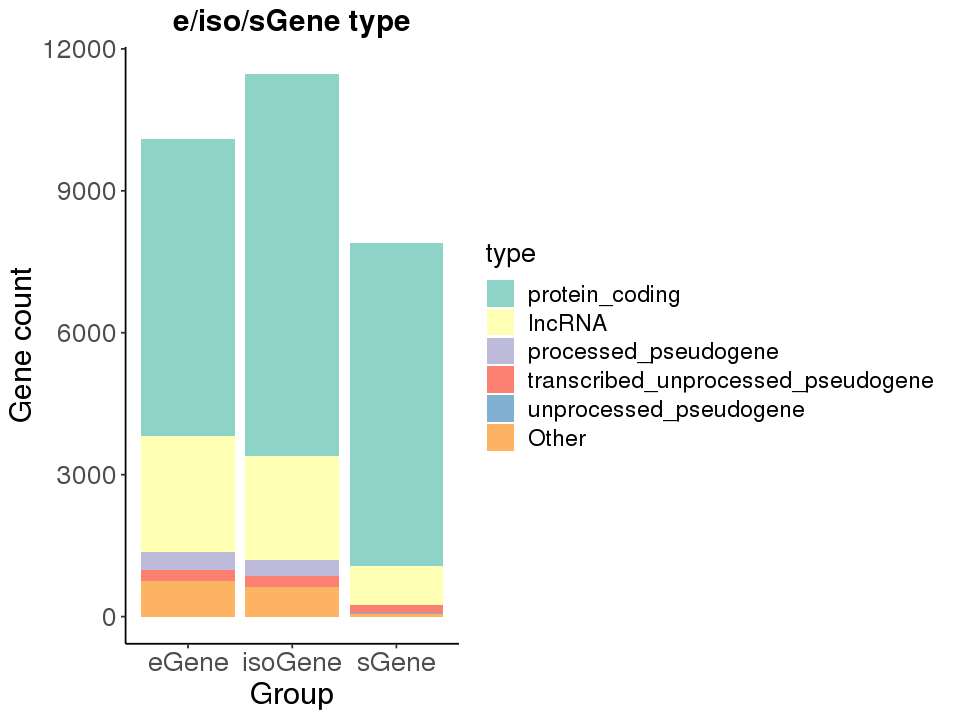

In [124]:
options(repr.plot.width = 8, repr.plot.height = 6)
p <- ggplot(df_all, aes(x=group, y=Freq, fill=Var1)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "e/iso/sGene type", x = "Group", y = "Gene count", fill = "type") +
  theme_classic() +
  theme(axis.text = element_text(size=16), 
        axis.title = element_text(size=18), 
        plot.title = element_text(size=18, face="bold", hjust = 0.5),
        legend.text = element_text(size=14),
        legend.title = element_text(size=16)) +
  scale_fill_brewer(palette = "Set3") 
p

In [126]:
ggsave("figures/e_iso_sgene_type.png", p, height = 6, width = 8)

### 8. Check leafcutter normalization 

In [11]:
ratio <- fread("cluster/leafcutter_perind.counts.nochr.gz.qqnorm_all_fixSubj.tsv", data.table = F)
ratio_combat <- fread("cluster/leafcutter_perind.counts.nochr.gz.qqnorm_all_fixSubj_combat.tsv", data.table = F)

Warning message in fread("cluster/leafcutter_perind.counts.nochr.gz.qqnorm_all_fixSubj.tsv", :
“Detected 654 column names but the data has 655 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”
Warning message in fread("cluster/leafcutter_perind.counts.nochr.gz.qqnorm_all_fixSubj_combat.tsv", :
“Detected 654 column names but the data has 655 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


In [12]:
head(ratio)

V1                        Br2410     1513       RNAID1940  RNAID1946  
1 1:14829:14930:clu_7637_NA -0.7160462 -0.2181190  2.6508876 -0.12609282
2 1:14829:14970:clu_7637_NA  0.8995826 -0.1515027 -2.0266051 -0.05823738
3 1:14829:15021:clu_7637_NA -0.9276774 -0.2247300  0.8660892 -0.13244976
4 1:14829:15796:clu_7637_NA -0.8859682 -0.1515027  0.8109587 -0.05823738
5 1:15038:15796:clu_7637_NA -1.0826228 -0.1515027 -1.3532703 -0.05823738
6 1:15942:16607:clu_7638_NA  1.2943004 -0.1515027 -0.0764293  0.38604155
  Br1800      11237      18015      11149       1821       ⋯ 11397      
1 -0.21011959 -0.7454081  0.6568449  0.08193389 -0.1753333 ⋯ -0.60574897
2  0.02180432  1.1739725 -2.0628181 -0.33768890 -0.1064378 ⋯  0.79774515
3 -0.50496365 -0.7122214  1.2265840 -0.63880290 -0.1821305 ⋯ -0.53930043
4 -0.44577972 -0.6640347  1.1744844 -0.60792214 -0.1064378 ⋯ -0.50596461
5  0.97516228 -0.7455535  1.8666979  0.12454832 -0.1064378 ⋯ -0.03408691
6 -2.34303686 -0.8070129  1.7645833  1.58735152  1.4063497 ⋯  0.36080448
  11880      RNAID1951  15240       RNAID1907  1733       11793     
1 -0.2593999 -0.5047656  1.11545625  1.1280923 -0.3988562  0.2989394
2  1.2880702 -0.3799243 -0.94322629 -2.2992218 -0.3143571  1.2925424
3 -0.7315235 -0.5194752  0.37285713  2.0500462 -0.4073061 -0.4825937
4 -0.6610405 -0.3799243 -0.29056338  1.9541517 -0.3143571 -0.4316756
5 -0.6538989 -0.3799243  0.27935367  2.1057332 -0.3143571 -0.8805871
6 -1.3657790  1.0966955  0.09723695 -0.2940301  1.2561271  0.5834806
  11451       RNAID1944  1746       
1 -0.02316274 -0.2920282  0.92518280
2 -0.21206186 -0.2122073 -2.26060084
3 -1.01795094 -0.3007919  1.71033974
4 -0.95906475 -0.2122073  1.62552894
5  0.04755969 -0.2122073  1.75877982
6 -0.91007036 -0.2122073  0.05946912

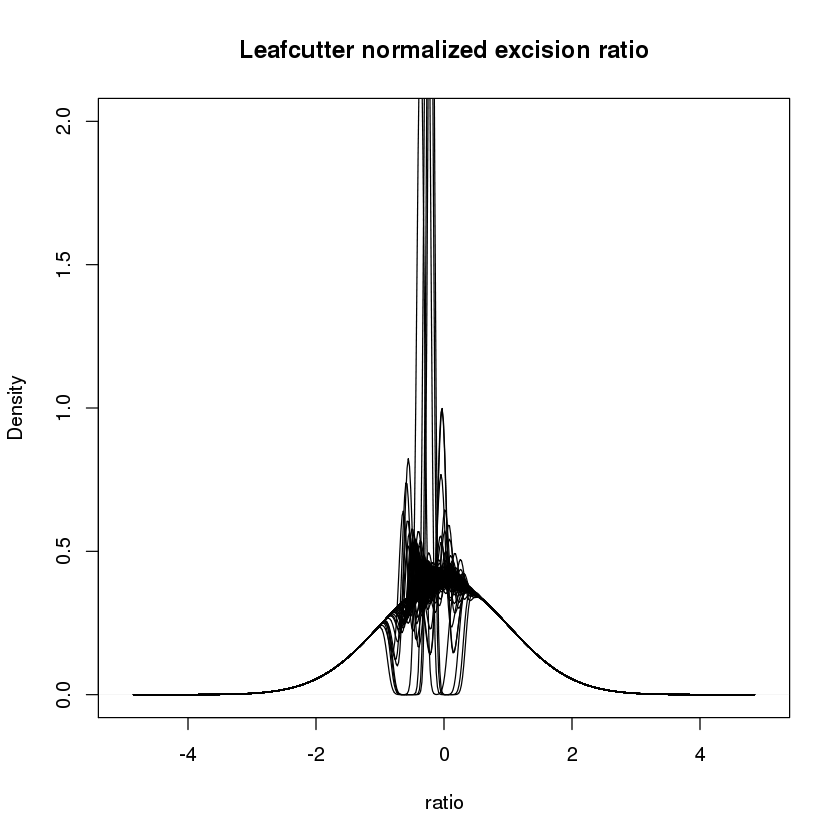

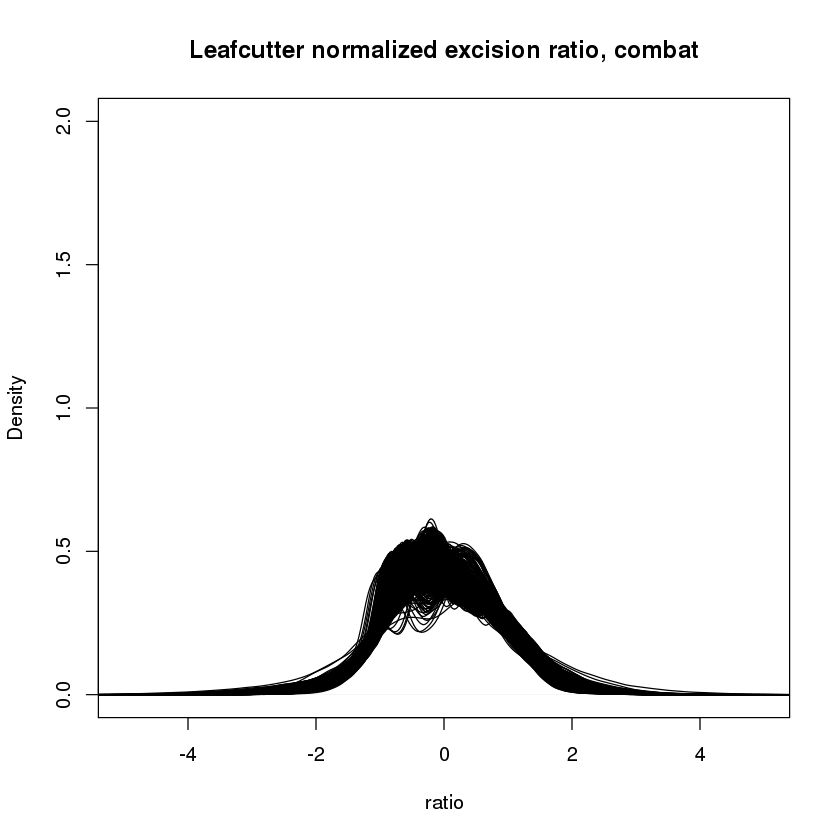

In [29]:
i <- 2
plot(density(ratio[,i]), main = 'Leafcutter normalized excision ratio', 
     xlab="ratio", xlim=c(-5,5), ylim = c(0,2))
for(i in 3:ncol(ratio)){
  lines(density(ratio[,i]))
}

i <- 2
plot(density(ratio_combat[,i]), main = 'Leafcutter normalized excision ratio, combat', 
     xlab="ratio", xlim=c(-5,5), ylim = c(0,2))
for(i in 3:ncol(ratio_combat)){
  lines(density(ratio_combat[,i]))
}

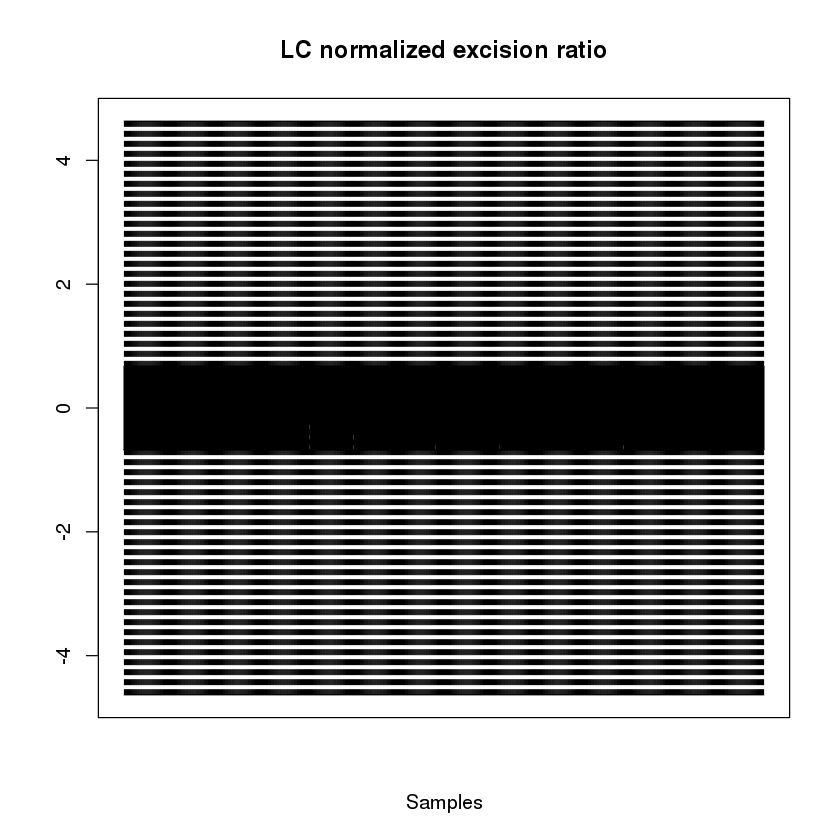

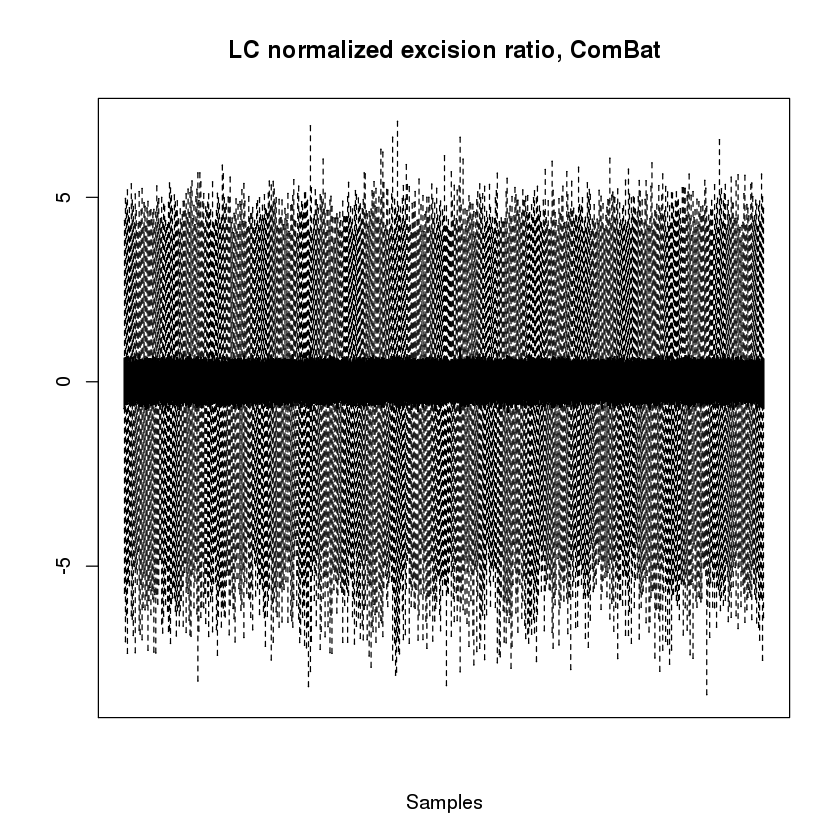

In [32]:
boxplot(ratio[,2:ncol(ratio)], range=0, main = "LC normalized excision ratio", xlab='Samples', xaxt="n")
boxplot(ratio_combat[,2:ncol(ratio_combat)], range=0, main = "LC normalized excision ratio, ComBat", xlab="Samples", xaxt="n")

In [18]:
test <- fread("cluster/leafcutter_perind.counts.nochr.gz.qqnorm_chr22.gz", data.table = F)
head(test)

#Chr start    end      ID                               
1 22   17518234 17525763 22:17518234:17525763:clu_25318_NA
2 22   17518234 17528214 22:17518234:17528214:clu_25318_NA
3 22   17518234 17577952 22:17518234:17577952:clu_25318_NA
4 22   17525890 17527236 22:17525890:17527236:clu_25318_NA
5 22   17525890 17528176 22:17525890:17528176:clu_25318_NA
6 22   17525890 17528214 22:17525890:17528214:clu_25318_NA
  Br2410.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 -1.6565313                                           
2 -0.4665008                                           
3 -0.4399193                                           
4 -0.4674320                                           
5 -0.4407383                                           
6  0.9918016                                           
  1513.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 -1.0068600                                         
2  0.6074917                                         
3  0.6302289                                         
4  0.5231648                                         
5  0.6237284                                         
6  0.3174437                                         
  RNAID1940.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 -0.9158753                                              
2  0.6363292                                              
3  0.6572321                                              
4  0.5572274                                              
5  0.6514237                                              
6  0.3594044                                              
  RNAID1946.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 -2.1466266                                              
2 -0.6013342                                              
3 -0.5546036                                              
4 -0.6186203                                              
5 -0.5572167                                              
6  0.9621943                                              
  Br1800.STARAligned.sortedByCoord.WASPfiltered.out.bam
1  1.3219780                                           
2 -0.6264059                                           
3 -0.5489619                                           
4 -0.5308720                                           
5 -0.5444440                                           
6 -0.2387558                                           
  11237.STARAligned.sortedByCoord.WASPfiltered.out.bam ⋯
1  1.1224752                                           ⋯
2 -0.3597176                                           ⋯
3 -0.8986615                                           ⋯
4 -0.8854927                                           ⋯
5 -0.8952726                                           ⋯
6 -0.5590932                                           ⋯
  11397.STARAligned.sortedByCoord.WASPfiltered.out.bam
1 0.2783234                                           
2 0.1679114                                           
3 0.1962181                                           
4 0.1418980                                           
5 0.1937023                                           
6 0.4530175                                           
  11880.STARAligned.sortedByCoord.WASPfiltered.out.bam
1  0.9933785                                          
2 -0.8551787                                          
3 -0.7843948                                          
4 -0.7534522                                          
5 -0.7792751                                          
6  0.3351933                                          
  RNAID1951.STARAligned.sortedByCoord.WASPfiltered.out.bam
1  0.7317034                                              
2  1.0957918                                              
3  1.1071698                                              
4  0.9907817                                              
5  1.0991600                                              
6 -1.2788071                                              
  15240.STARAligned

In [19]:
test <- test[,5:ncol(test)]

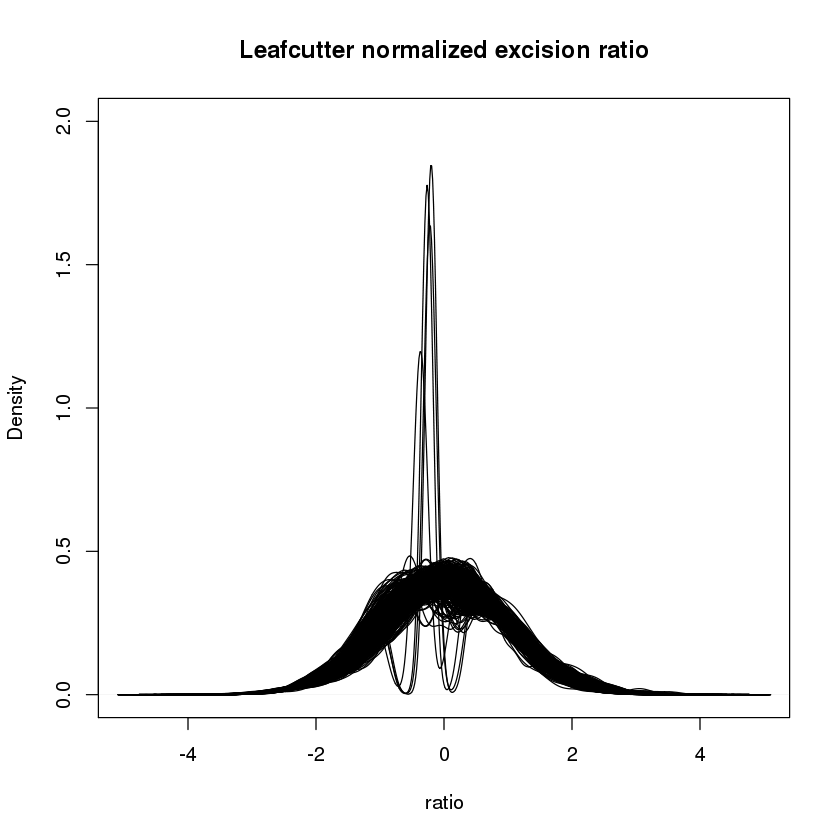

In [25]:
i <- 1
plot(density(test[,i]), main = 'Leafcutter normalized excision ratio', 
     xlab="ratio", xlim=c(-5,5), ylim = c(0,2))
for(i in 2:ncol(test)){
  lines(density(test[,i]))
}

### 9. Conditional

** Top variants per rank of all expressed isoforms **

Somehow QTLtools conditional output feature's number of SNP in cis is slightly different than FastQTL

In [3]:
dat <- fread("results/mixed_conditional_35hcp/conditional_top_variants.txt", data.table = F)

In [4]:
table(dat$V2)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
4149 3852 3153 2349 2252 3137 3110 2035 2345 2348 2402 2251 1082 1455 2215 2045 
  17   18   19   20   21   22 
2460  715 3080 1239  766 1424 

In [6]:
chunk100 <- fread("results/mixed_conditional_35hcp/chunk100.txt", data.table = F)

In [13]:
test <- fread("./../isoqtl_new/results/mixed_conditional_70hcp/chunk100.txt", data.table = F)
sum(test$V7 == 0)

[1] 0

In [7]:
sum(chunk100$V7 == 0)

[1] 3744

In [8]:
dim(chunk100)
sum(chunk100$V3 + chunk100$V7 == chunk100$V10)
sum(chunk100$V3 + chunk100$V7 == chunk100$V11)
sum((chunk100$V3 + chunk100$V7 == chunk100$V11) & (chunk100$V10 != chunk100$V11))
sum(!(chunk100$V3+chunk100$V7) %in% c(chunk100$V10, chunk100$V11) &
    !(chunk100$V4+chunk100$V7) %in% c(chunk100$V10, chunk100$V11))
sum(!(chunk100$V3+chunk100$V7) %in% c(chunk100$V10, chunk100$V11) &
    !(chunk100$V4+chunk100$V7) %in% c(chunk100$V10, chunk100$V11) &
    chunk100$V7 == 0)

[1] 40814    20

[1] 16903

[1] 18056

[1] 1153

[1] 3733

[1] 3733

In [10]:
# head(chunk1 %>% filter(V7 == 0))
# head(chunk1[chunk1$V3 + chunk1$V7 == chunk1$V10,])
# # indels:
# head(chunk1[(chunk1$V3 + chunk1$V7 == chunk1$V11) & (chunk1$V10 != chunk1$V11),])
tail(chunk100[!(chunk100$V3+chunk100$V7) %in% c(chunk100$V10, chunk100$V11) &
    !(chunk100$V4+chunk100$V7) %in% c(chunk100$V10, chunk100$V11),])

V1                                V2 V3       V4       V5 V6  V7
40660 19:24232350:24288742:clu_52011_NA 19 24232351 24288742 +  901 0 
40661 19:24232350:24288742:clu_52011_NA 19 24232351 24288742 +  901 0 
40662 19:24232350:24288742:clu_52011_NA 19 24232351 24288742 +  901 0 
40782 19:27732293:27739756:clu_52045_NA 19 27732294 27739756 +  512 0 
40783 19:27732293:27739756:clu_52045_NA 19 27732294 27739756 +  512 0 
40811 19:27733982:27752893:clu_52045_NA 19 27733983 27752893 +  512 0 
      V8          V9 V10      V11      V12 V13         V14       V15 V16
40660 rs56297400  19 24264742 24264742 0   1.89265e-04 -0.399275 0   1  
40661 rs12979078  19 24275224 24275224 0   8.14483e-05  0.300326 0   1  
40662 rs55736631  19 24275821 24275821 0   1.22439e-09 -0.442611 0   1  
40782 rs28783527  19 27732374 27732374 0   7.46838e-05 -0.682840 0   1  
40783 rs12104394  19 27737699 27737699 0   1.05463e-05 -0.968112 0   1  
40811 rs113330524 19 27746154 27746154 0   7.56990e-05 -0.996826 0   1  
      V17         V18       V19 V20
40660 1.89265e-04 -0.399275 0   1  
40661 8.14483e-05  0.300326 0   1  
40662 1.22439e-09 -0.442611 0   1  
40782 7.46838e-05 -0.682840 0   1  
40783 1.05463e-05 -0.968112 0   1  
40811 7.56990e-05 -0.996826 0   1

In [28]:
dat[grepl("clu_7677_NA", dat$V1),]

V1                          V2 V3     V4     V5 V6  V7     V8          V9
7026 1:763155:783034:clu_7677_NA 1  763156 783034 +  391  28102 rs114224245 1 
7027 1:764484:776580:clu_7677_NA 1  764485 776580 +  372      0 rs12124819  1 
7028 1:764484:787307:clu_7677_NA 1  764485 787307 +  413      0 rs6594026   1 
7029 1:764484:787307:clu_7677_NA 1  764485 787307 +  413      0 rs138499329 1 
7030 1:783186:784864:clu_7677_NA 1  783187 784864 +  398 -51469 rs58276399  1 
7031 1:783186:787307:clu_7677_NA 1  783187 787307 +  412      0 rs6686696   1 
7032 1:784982:785558:clu_7677_NA 1  784983 785558 +  399 -91160 rs61769351  1 
7033 1:784982:785561:clu_7677_NA 1  784983 785561 +  399 -15843 chr1:833758 1 
7034 1:784982:787307:clu_7677_NA 1  784983 787307 +  412 -91252 rs12238997  1 
7035 1:785731:787307:clu_7677_NA 1  785732 787307 +  412 -13765 rs59066358  1 
7036 1:785731:787307:clu_7677_NA 1  785732 787307 +  412 -28041 rs74045212  1 
7037 1:787490:788771:clu_7677_NA 1  787491 788771 +  415  -4510 rs6594026   1 
     V10    V11    V12 V13         V14       V15 V16 V17         V18       V19
7026 811136 811136 0   1.50849e-04  0.836959 1   1   1.50849e-04  0.836959 1  
7027 776546 776546 0   2.33775e-15 -0.638251 1   1   2.33775e-15 -0.638251 1  
7028 782981 782981 0   9.84517e-14 -0.433168 1   1   1.07732e-15 -0.465019 1  
7029 772437 772437 1   9.37603e-06  1.081950 1   1   9.37603e-06  1.081950 1  
7030 731718 731718 0   3.20133e-20  0.693881 1   1   3.20133e-20  0.693881 1  
7031 783318 783318 0   1.04700e-11 -0.468139 1   1   1.04700e-11 -0.468139 1  
7032 693823 693823 0   1.37548e-06  0.369834 1   1   1.37548e-06  0.369834 1  
7033 769138 769140 0   2.54905e-06  0.294542 1   1   2.54905e-06  0.294542 1  
7034 693731 693731 0   6.25557e-08  0.423885 1   1   6.25557e-08  0.423885 1  
7035 771967 771967 0   9.06465e-08  0.343098 1   1   4.45336e-07  0.324481 1  
7036 757691 757691 1   8.13181e-05 -0.797352 1   1   8.13181e-05 -0.797352 1  
7037 782981 782981 0   4.92936e-05 -0.239823 1   1   4.92936e-05 -0.239823 1  
     V20
7026 1  
7027 1  
7028 1  
7029 1  
7030 1  
7031 1  
7032 1  
7033 1  
7034 1  
7035 1  
7036 1  
7037 1

** Check TSS **

In [4]:
dim(dat)
sum(dat$V3+dat$V7==dat$V10)
sum(dat$V3+dat$V7==dat$V11)
sum(!(dat$V3+dat$V7) %in% c(dat$V10, dat$V11))
sum(!(dat$V3+dat$V7) %in% c(dat$V10, dat$V11) &
    !(dat$V4+dat$V7) %in% c(dat$V10, dat$V11))
sum(!(dat$V3+dat$V7) %in% c(dat$V10, dat$V11) &
    !(dat$V4+dat$V7) %in% c(dat$V10, dat$V11) &
    dat$V7 == 0)


[1] 49864    20

[1] 20522

[1] 21965

[1] 27886

[1] 6670

[1] 6670

In [10]:
14453602-17358

[1] 14436244

In [9]:
head(dat %>% filter(V7 == 0))

V1                                V2 V3       V4       V5 V6  V7 V8         
1 19:14416487:14436120:clu_51111_NA 19 14416488 14436120 +  666 0  rs7246798  
2 19:14416487:14458127:clu_51111_NA 19 14416488 14458127 +  715 0  rs113231628
3 19:14436236:14458127:clu_51111_NA 19 14436237 14458127 +  669 0  rs113231628
4 19:14436243:14474684:clu_51111_NA 19 14436244 14474684 +  715 0  rs113231628
5 19:14442504:14458127:clu_51111_NA 19 14442505 14458127 +  644 0  rs113231628
6 19:14594391:14602468:clu_51128_NA 19 14594392 14602468 +  700 0  rs11882474 
  V9 V10      V11      V12 V13         V14       V15 V16 V17         V18      
1 19 14428318 14428318 0   1.32335e-06 -0.258674 1   1   1.32335e-06 -0.258674
2 19 14453602 14453602 0   9.59271e-05  0.821681 1   1   9.59271e-05  0.821681
3 19 14453602 14453602 0   7.32153e-05  0.835190 1   1   7.32153e-05  0.835190
4 19 14453602 14453602 0   2.57836e-05  0.885523 1   1   2.57836e-05  0.885523
5 19 14453602 14453602 0   5.54078e-05  0.848909 1   1   5.54078e-05  0.848909
6 19 14601124 14601124 0   6.35927e-05  0.210873 1   1   6.35927e-05  0.210873
  V19 V20
1 1   1  
2 1   1  
3 1   1  
4 1   1  
5 1   1  
6 1   1

In [6]:
table(dat$V19)
table(dat$V20)


    1 
49864 


    0     1 
   13 49851 

** remove variants with backward P-value that is not below the threshold of this feature **

In [41]:
dat <- dat %>% filter(V20 == 1)

** check features with significant conditional QTL are mostly introns with permutation sQTL **

In [42]:
# length(unique(mixed_sig$pid))
length(unique(dat$V1))
# sum(unique(mixed_sig$pid) %in% unique(dat$V1))

[1] 41872

**How many ranks/independent QTL each feature has? (+1 because primary QTL is rank 0)**

In [43]:
table(dat$V12)


    0     1     2     3     4     5     6     7     8     9    10 
41860  6316  1220   307    98    30    11     4     3     1     1 

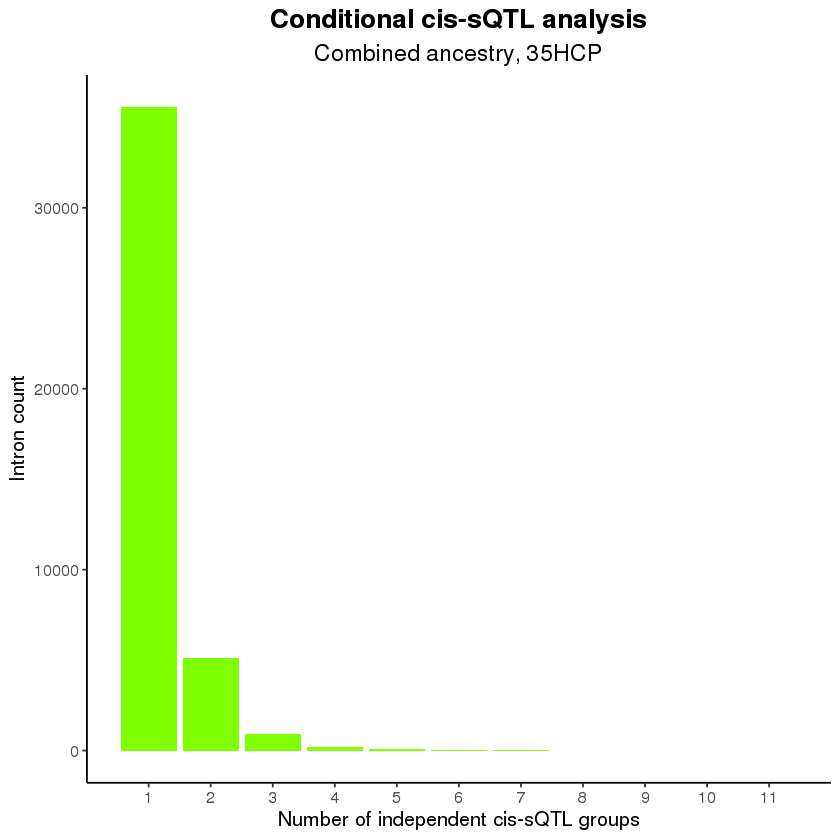

In [45]:
df_cond <- data.frame("intron" <- unique(dat$V1),
                      "num_rank" <- NA)
for (i in 1:nrow(df_cond)) {
  intron <- df_cond[i,1]
  df_cond[i,2] <- max(dat[dat$V1==intron,12]) + 1
}
names(df_cond) <-c("intron","num_rank")

p <- ggplot(df_cond, aes(x=num_rank)) +
  geom_bar(fill="chartreuse") +
  scale_x_continuous(breaks = seq(1,11,by=1)) +
  labs(x="Number of independent cis-sQTL groups", y="Intron count") +
  ggtitle("Conditional cis-sQTL analysis", subtitle = "Combined ancestry, 35HCP") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust=0.5),
        plot.subtitle = element_text(size=14, hjust=0.5))
p

In [46]:
table(df_cond$num_rank)


    1     2     3     4     5     6     7     8     9    11 
35555  5096   913   210    68    19     7     1     2     1 

** TSS comparison **

In [15]:
dat3 <- filter(dat, V12 <= 3)
dat3$tss_kb <- dat3$V7/1000
dat3 %>% group_by(V12) %>% summarise(median(tss_kb), mean(tss_kb), median(V7), mean(V7))

`summarise()` ungrouping output (override with `.groups` argument)



V12 median(tss_kb) mean(tss_kb) median(V7) mean(V7)   
1 0    0.000          -1.5106966     0        -1510.6966
2 1    0.000          -0.5875981     0         -587.5981
3 2   -0.585          -7.2538950  -585        -7253.8950
4 3   -0.495         -16.5461901  -495       -16546.1901

In [16]:
dat3 <- dat3 %>% mutate(Rank = case_when(V12 == 0 ~ "Primary, median=0.000, mean=-1.511",
                                 V12 == 1 ~ "Secondary, median=0.000, mean=-0.588",
                                 V12 == 2 ~ "Tertiary, median=-0.585, mean=-7.254",
                                 V12 == 3 ~ "Quaternary, median=-0.495, mean=-16.546"))
table(dat3$Rank)
dat3$Rank <- factor(dat3$Rank, levels = c("Primary, median=0.000, mean=-1.511", 
                                          "Secondary, median=0.000, mean=-0.588", 
                                          "Tertiary, median=-0.585, mean=-7.254", 
                                          "Quaternary, median=-0.495, mean=-16.546"))


     Primary, median=0.000, mean=-1.511 Quaternary, median=-0.495, mean=-16.546 
                                  91409                                    3262 
   Secondary, median=0.000, mean=-0.588    Tertiary, median=-0.585, mean=-7.254 
                                  35182                                   10617 

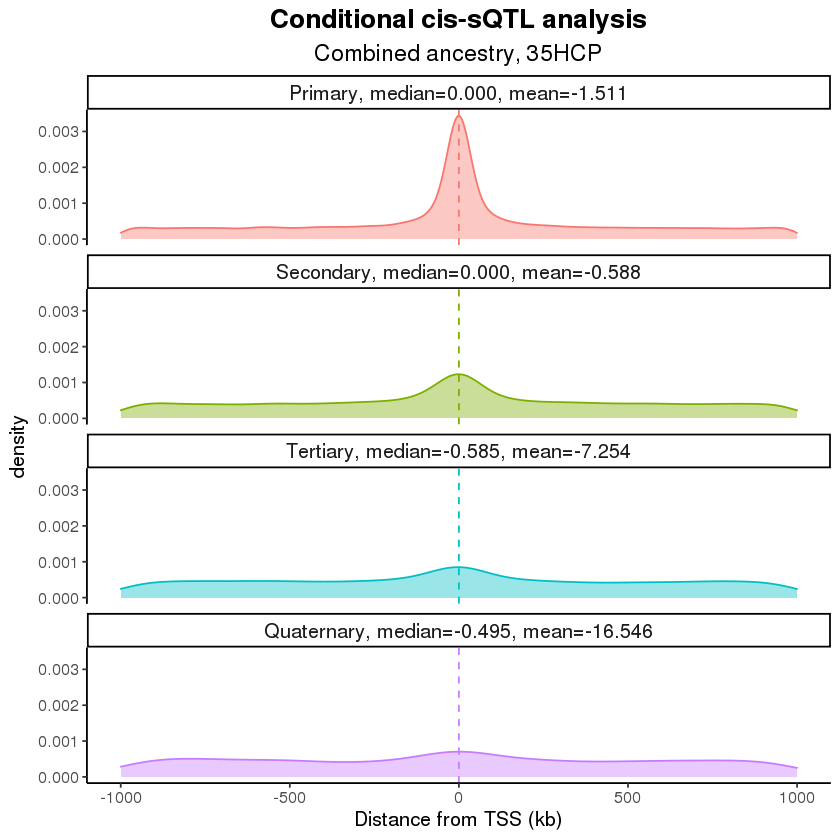

In [17]:
p2 <- ggplot(dat3, aes(x = tss_kb, fill = Rank, color = Rank)) +
  geom_density(alpha = .4) +
  geom_vline(aes(xintercept=median(tss_kb), color = Rank), linetype = 2, size = .5) +
  facet_wrap(~Rank, nrow = 4) +
  labs(x="Distance from TSS (kb)") +
  ggtitle("Conditional cis-sQTL analysis", subtitle = "Combined ancestry, 35HCP") +
  theme_classic() +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=12),
        plot.title = element_text(size=16, face="bold", hjust=0.5),
        plot.subtitle = element_text(size=14, hjust=0.5),
        legend.position="none",
        strip.text.x = element_text(size=12))
p2

### 9: Compare with adult? RW?

### 10: SuSiE

### 11: Compare with GTEx pipeline results (grouping introns into genes)

In [3]:
old <- fread("results/mixed_nominal_5hcp_1e6/chunk1.txt.gz", data.table = F)
dim(old)
colnames(old) <- c("pid","sid","dist","npval","slope")
head(old)

[1] 19362966        5

pid                       sid         dist   npval    slope     
1 1:14829:14930:clu_7637_NA rs61769339  647792 0.270353 -0.0809647
2 1:14829:14930:clu_7637_NA rs200188737 651419 0.949143 -0.0181878
3 1:14829:14930:clu_7637_NA rs12238997  678901 0.201556 -0.0939619
4 1:14829:14930:clu_7637_NA rs61769351  678993 0.169010 -0.0996799
5 1:14829:14930:clu_7637_NA rs142559957 689807 0.879822 -0.0195469
6 1:14829:14930:clu_7637_NA rs142576295 693245 0.835547  0.0547918

In [4]:
gtex <- fread("results/gtex_grp/mixed_nominal_5hcp_1e6_chunk001.txt.gz", data.table = F)
dim(gtex)
colnames(gtex) <- c('gene_id', 'variant_id', 'tss_distance', 'ma_samples', 'ma_count', 'maf',
            'pval_nominal', 'slope', 'slope_se')
head(gtex)

[1] 19445217        9

gene_id                                              variant_id  tss_distance
1 1:14829:14930:clu_7637_NA:ENSG00000227232.5_3:WASH7P rs61769339  633052      
2 1:14829:14930:clu_7637_NA:ENSG00000227232.5_3:WASH7P rs200188737 636679      
3 1:14829:14930:clu_7637_NA:ENSG00000227232.5_3:WASH7P rs12238997  664161      
4 1:14829:14930:clu_7637_NA:ENSG00000227232.5_3:WASH7P rs61769351  664253      
5 1:14829:14930:clu_7637_NA:ENSG00000227232.5_3:WASH7P rs142559957 675067      
6 1:14829:14930:clu_7637_NA:ENSG00000227232.5_3:WASH7P rs142576295 678505      
  ma_samples ma_count maf        pval_nominal slope      slope_se 
1 185        197      0.15390600 0.270353     -0.0809647 0.0733890
2  11         11      0.00859375 0.949143     -0.0181878 0.2850370
3 183        195      0.15234400 0.201556     -0.0939619 0.0734953
4 192        206      0.16093800 0.169010     -0.0996799 0.0723901
5  53         54      0.04218750 0.879822     -0.0195469 0.1292310
6  13         13      0.01015620 0.835547      0.0547918 0.2638290

In [5]:
gtex <- gtex %>% separate(gene_id, into = c("chr","start","end","clu","gene_id","gene_name"), sep = ":") %>%
    unite("intron", chr, start, end, clu, sep = ":")
head(gtex)

intron                    gene_id             gene_name variant_id 
1 1:14829:14930:clu_7637_NA ENSG00000227232.5_3 WASH7P    rs61769339 
2 1:14829:14930:clu_7637_NA ENSG00000227232.5_3 WASH7P    rs200188737
3 1:14829:14930:clu_7637_NA ENSG00000227232.5_3 WASH7P    rs12238997 
4 1:14829:14930:clu_7637_NA ENSG00000227232.5_3 WASH7P    rs61769351 
5 1:14829:14930:clu_7637_NA ENSG00000227232.5_3 WASH7P    rs142559957
6 1:14829:14930:clu_7637_NA ENSG00000227232.5_3 WASH7P    rs142576295
  tss_distance ma_samples ma_count maf        pval_nominal slope      slope_se 
1 633052       185        197      0.15390600 0.270353     -0.0809647 0.0733890
2 636679        11         11      0.00859375 0.949143     -0.0181878 0.2850370
3 664161       183        195      0.15234400 0.201556     -0.0939619 0.0734953
4 664253       192        206      0.16093800 0.169010     -0.0996799 0.0723901
5 675067        53         54      0.04218750 0.879822     -0.0195469 0.1292310
6 678505        13         13      0.01015620 0.835547      0.0547918 0.2638290

In [6]:
old <- old %>% unite("intron_variant", pid, sid, sep = ":", remove = FALSE)
head(old)

intron_variant                        pid                       sid        
1 1:14829:14930:clu_7637_NA:rs61769339  1:14829:14930:clu_7637_NA rs61769339 
2 1:14829:14930:clu_7637_NA:rs200188737 1:14829:14930:clu_7637_NA rs200188737
3 1:14829:14930:clu_7637_NA:rs12238997  1:14829:14930:clu_7637_NA rs12238997 
4 1:14829:14930:clu_7637_NA:rs61769351  1:14829:14930:clu_7637_NA rs61769351 
5 1:14829:14930:clu_7637_NA:rs142559957 1:14829:14930:clu_7637_NA rs142559957
6 1:14829:14930:clu_7637_NA:rs142576295 1:14829:14930:clu_7637_NA rs142576295
  dist   npval    slope     
1 647792 0.270353 -0.0809647
2 651419 0.949143 -0.0181878
3 678901 0.201556 -0.0939619
4 678993 0.169010 -0.0996799
5 689807 0.879822 -0.0195469
6 693245 0.835547  0.0547918

In [7]:
gtex <- gtex %>% unite("intron_variant", intron, variant_id, sep = ":", remove = FALSE)
head(gtex)

intron_variant                        intron                   
1 1:14829:14930:clu_7637_NA:rs61769339  1:14829:14930:clu_7637_NA
2 1:14829:14930:clu_7637_NA:rs200188737 1:14829:14930:clu_7637_NA
3 1:14829:14930:clu_7637_NA:rs12238997  1:14829:14930:clu_7637_NA
4 1:14829:14930:clu_7637_NA:rs61769351  1:14829:14930:clu_7637_NA
5 1:14829:14930:clu_7637_NA:rs142559957 1:14829:14930:clu_7637_NA
6 1:14829:14930:clu_7637_NA:rs142576295 1:14829:14930:clu_7637_NA
  gene_id             gene_name variant_id  tss_distance ma_samples ma_count
1 ENSG00000227232.5_3 WASH7P    rs61769339  633052       185        197     
2 ENSG00000227232.5_3 WASH7P    rs200188737 636679        11         11     
3 ENSG00000227232.5_3 WASH7P    rs12238997  664161       183        195     
4 ENSG00000227232.5_3 WASH7P    rs61769351  664253       192        206     
5 ENSG00000227232.5_3 WASH7P    rs142559957 675067        53         54     
6 ENSG00000227232.5_3 WASH7P    rs142576295 678505        13         13     
  maf        pval_nominal slope      slope_se 
1 0.15390600 0.270353     -0.0809647 0.0733890
2 0.00859375 0.949143     -0.0181878 0.2850370
3 0.15234400 0.201556     -0.0939619 0.0734953
4 0.16093800 0.169010     -0.0996799 0.0723901
5 0.04218750 0.879822     -0.0195469 0.1292310
6 0.01015620 0.835547      0.0547918 0.2638290

**Does grouping affect nominal results? i.e. for same intron-variant pair, does it have different nominal p-val in different groups?**
- Answer: no. Features like intron:gene1, intron:gene2 have the same phenotype in BED file, and have the same nominal association with the same variants. Variants may be different though, as cis-variant set is based on gene TSS.

In [9]:
dim(gtex)
length(unique(gtex$intron_variant))
head(gtex[duplicated(gtex$intron_variant),])

[1] 19445217       12

[1] 17899991

intron_variant                         intron                    
29673 1:92240:112700:clu_7642_NA:rs61769339  1:92240:112700:clu_7642_NA
29674 1:92240:112700:clu_7642_NA:rs200188737 1:92240:112700:clu_7642_NA
29675 1:92240:112700:clu_7642_NA:rs12238997  1:92240:112700:clu_7642_NA
29676 1:92240:112700:clu_7642_NA:rs61769351  1:92240:112700:clu_7642_NA
29677 1:92240:112700:clu_7642_NA:rs142559957 1:92240:112700:clu_7642_NA
29678 1:92240:112700:clu_7642_NA:rs142576295 1:92240:112700:clu_7642_NA
      gene_id             gene_name  variant_id  tss_distance ma_samples
29673 ENSG00000241860.7_7 AL627309.5 rs61769339  488760       185       
29674 ENSG00000241860.7_7 AL627309.5 rs200188737 492387        11       
29675 ENSG00000241860.7_7 AL627309.5 rs12238997  519869       183       
29676 ENSG00000241860.7_7 AL627309.5 rs61769351  519961       192       
29677 ENSG00000241860.7_7 AL627309.5 rs142559957 530775        53       
29678 ENSG00000241860.7_7 AL627309.5 rs142576295 534213        13       
      ma_count maf        pval_nominal slope      slope_se 
29673 197      0.15390600 0.0940796    -0.1308460 0.0780331
29674  11      0.00859375 0.5974060    -0.1603140 0.3033930
29675 195      0.15234400 0.1196690    -0.1218520 0.0781959
29676 206      0.16093800 0.2755190    -0.0841596 0.0771120
29677  54      0.04218750 0.1252060    -0.2108440 0.1373270
29678  13      0.01015620 0.8163810    -0.0652479 0.2808780

In [10]:
gtex %>% filter(intron_variant == "1:92240:112700:clu_7642_NA:rs61769339")

intron_variant                        intron                    
1 1:92240:112700:clu_7642_NA:rs61769339 1:92240:112700:clu_7642_NA
2 1:92240:112700:clu_7642_NA:rs61769339 1:92240:112700:clu_7642_NA
  gene_id             gene_name  variant_id tss_distance ma_samples ma_count
1 ENSG00000238009.6_9 AL627309.1 rs61769339 528899       185        197     
2 ENSG00000241860.7_7 AL627309.5 rs61769339 488760       185        197     
  maf      pval_nominal slope     slope_se 
1 0.153906 0.0940796    -0.130846 0.0780331
2 0.153906 0.0940796    -0.130846 0.0780331

In [11]:
length(unique(old$intron_variant))

[1] 19362966

In [12]:
gtex <- gtex[!duplicated(gtex$intron_variant),]

In [13]:
dim(gtex)

[1] 17899991       12

In [14]:
merged <- gtex %>% inner_join(old, by="intron_variant")
head(merged)
dim(merged)

intron_variant                        intron                   
1 1:14829:14930:clu_7637_NA:rs61769339  1:14829:14930:clu_7637_NA
2 1:14829:14930:clu_7637_NA:rs200188737 1:14829:14930:clu_7637_NA
3 1:14829:14930:clu_7637_NA:rs12238997  1:14829:14930:clu_7637_NA
4 1:14829:14930:clu_7637_NA:rs61769351  1:14829:14930:clu_7637_NA
5 1:14829:14930:clu_7637_NA:rs142559957 1:14829:14930:clu_7637_NA
6 1:14829:14930:clu_7637_NA:rs142576295 1:14829:14930:clu_7637_NA
  gene_id             gene_name variant_id  tss_distance ma_samples ma_count
1 ENSG00000227232.5_3 WASH7P    rs61769339  633052       185        197     
2 ENSG00000227232.5_3 WASH7P    rs200188737 636679        11         11     
3 ENSG00000227232.5_3 WASH7P    rs12238997  664161       183        195     
4 ENSG00000227232.5_3 WASH7P    rs61769351  664253       192        206     
5 ENSG00000227232.5_3 WASH7P    rs142559957 675067        53         54     
6 ENSG00000227232.5_3 WASH7P    rs142576295 678505        13         13     
  maf        pval_nominal slope.x    slope_se  pid                      
1 0.15390600 0.270353     -0.0809647 0.0733890 1:14829:14930:clu_7637_NA
2 0.00859375 0.949143     -0.0181878 0.2850370 1:14829:14930:clu_7637_NA
3 0.15234400 0.201556     -0.0939619 0.0734953 1:14829:14930:clu_7637_NA
4 0.16093800 0.169010     -0.0996799 0.0723901 1:14829:14930:clu_7637_NA
5 0.04218750 0.879822     -0.0195469 0.1292310 1:14829:14930:clu_7637_NA
6 0.01015620 0.835547      0.0547918 0.2638290 1:14829:14930:clu_7637_NA
  sid         dist   npval    slope.y   
1 rs61769339  647792 0.270353 -0.0809647
2 rs200188737 651419 0.949143 -0.0181878
3 rs12238997  678901 0.201556 -0.0939619
4 rs61769351  678993 0.169010 -0.0996799
5 rs142559957 689807 0.879822 -0.0195469
6 rs142576295 693245 0.835547  0.0547918

[1] 17407532       17

In [15]:
# p <- ggplot(merged, aes(x = pval_nominal, y = npval)) +
#     geom_point() +
#     theme_classic() +
#     labs(x = "GTEx npval", y = "FastQTL npval")